In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from collections import Counter
from xgboost import XGBRegressor
from sklearn import svm, metrics
from sklearn.pipeline import Pipeline
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

In [2]:
import tensorflow

In [3]:
# 지점별 위/경도 데이터 만들기
df_meta = pd.read_excel('META_관측지점정보_20210521134301.xlsx',header=1)


In [3]:
df_meta.columns

Index(['지점', '시작일', '종료일', '지점명', '지점주소', '관리관서', '위도', '경도', '노장해발고도(m)',
       '기압계(관측장비지상높이(m))', '기온계(관측장비지상높이(m))', '풍속계(관측장비지상높이(m))',
       '강우계(관측장비지상높이(m))'],
      dtype='object')

In [4]:
df_meta = df_meta.rename(columns={"시작일": "일시"})

df_meta_uq = df_meta.drop_duplicates(['지점'],keep='last')[['지점','위도','경도','노장해발고도(m)']]
dict_meta = df_meta_uq.to_dict('records')

In [6]:
dict_meta

[{'지점': 90, '위도': 38.2509, '경도': 128.5647, '노장해발고도(m)': 17.53},
 {'지점': 93, '위도': 37.9474, '경도': 127.7544, '노장해발고도(m)': 95.78},
 {'지점': 95, '위도': 38.1479, '경도': 127.3042, '노장해발고도(m)': 155.48},
 {'지점': 98, '위도': 37.9019, '경도': 127.0607, '노장해발고도(m)': 115.62},
 {'지점': 99, '위도': 37.8859, '경도': 126.7665, '노장해발고도(m)': 29.42},
 {'지점': 100, '위도': 37.6869, '경도': 128.7587, '노장해발고도(m)': 842.52},
 {'지점': 101, '위도': 37.9026, '경도': 127.7357, '노장해발고도(m)': 75.82},
 {'지점': 102, '위도': 37.9661, '경도': 124.6305, '노장해발고도(m)': 146.0},
 {'지점': 104, '위도': 37.8046, '경도': 128.8554, '노장해발고도(m)': 75.24},
 {'지점': 105, '위도': 37.7515, '경도': 128.891, '노장해발고도(m)': 27.12},
 {'지점': 106, '위도': 37.5071, '경도': 129.1243, '노장해발고도(m)': 40.46},
 {'지점': 108, '위도': 37.5714, '경도': 126.9658, '노장해발고도(m)': 85.5},
 {'지점': 112, '위도': 37.4776, '경도': 126.6244, '노장해발고도(m)': 68.15},
 {'지점': 114, '위도': 37.3375, '경도': 127.9466, '노장해발고도(m)': 150.11},
 {'지점': 115, '위도': 37.4813, '경도': 130.8986, '노장해발고도(m)': 221.14},
 {'지점': 116, '위도': 37.4442,

In [5]:
dict_meta_1 = dict()
for dic in dict_meta:
    dict_meta_1[dic['지점']] = [dic['위도'], dic['경도'], dic['노장해발고도(m)']]

In [ ]:
df_wea = pd.read_excel('combined_all_deltavg.xlsx')

In [ ]:
df_wea['위도'] = df_wea['지점'].apply(lambda x: dict_meta_1[x][0])
df_wea['경도'] = df_wea['지점'].apply(lambda x: dict_meta_1[x][1])
df_wea['고도'] = df_wea['지점'].apply(lambda x: dict_meta_1[x][2])

In [ ]:
df_wea_null = df_wea.dropna(subset=['일 최심신적설(cm)'])
df_wea_null = df_wea_null.loc[df_wea_null['일 최심신적설(cm)']!=0]

In [ ]:
df_wea_null['year'] = pd.to_datetime(df_wea_null['일시']).dt.year

### viz

In [ ]:
df_year_mean = df_wea_null.groupby('year')['일 최심신적설(cm)'].agg('mean').fillna(0)

In [ ]:
df_year_mean.to_excel('1번그래프데이터.xlsx')

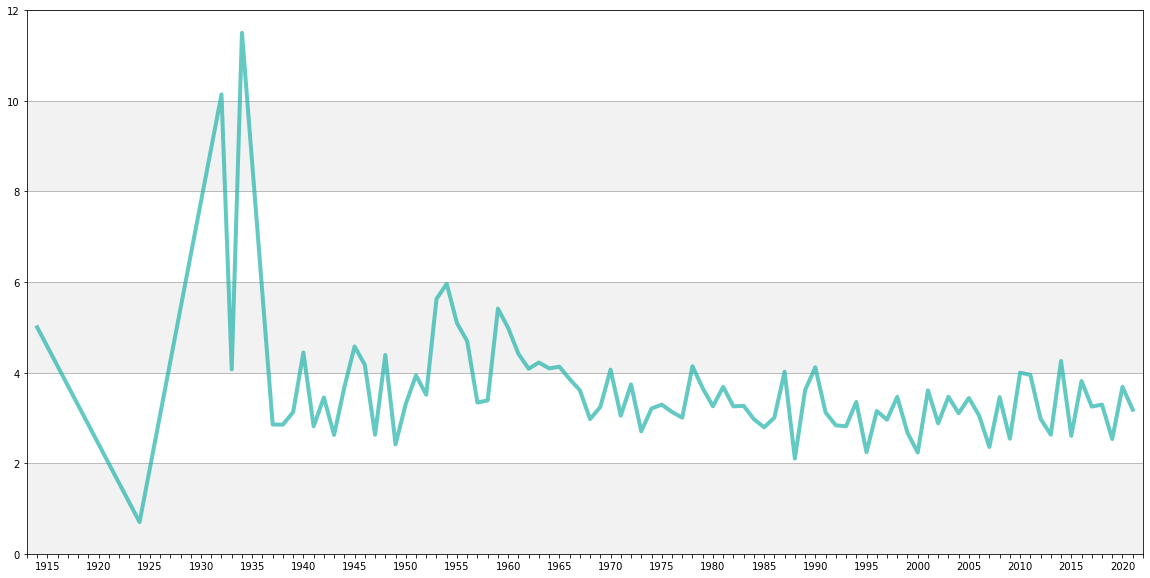

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_year_mean.index, df_year_mean.values, color='lightseagreen', linewidth=4, alpha=0.7)

ax.xaxis.set_major_locator(mticker.MultipleLocator())

def func(x, pos):
    if not x%5:
        return "{:g}".format(x)
    else:
        return ""
ax.xaxis.set_major_formatter(mticker.FuncFormatter(func))
plt.xlim(1913,2022)
plt.ylim(0,12)
plt.grid(True, axis='y')

yticks, _ = plt.yticks()
for y0, y1 in zip(yticks[::2], yticks[1::2]):
    plt.axhspan(y0, y1, color='gray', alpha=0.1, zorder=0)
plt.yticks(yticks)

plt.show()


In [ ]:
df_year_max = df_wea_null.groupby('year')['일 최심신적설(cm)'].agg('max').fillna(0)

In [ ]:
df_year_max.to_excel('2번그래프데이터.xlsx')

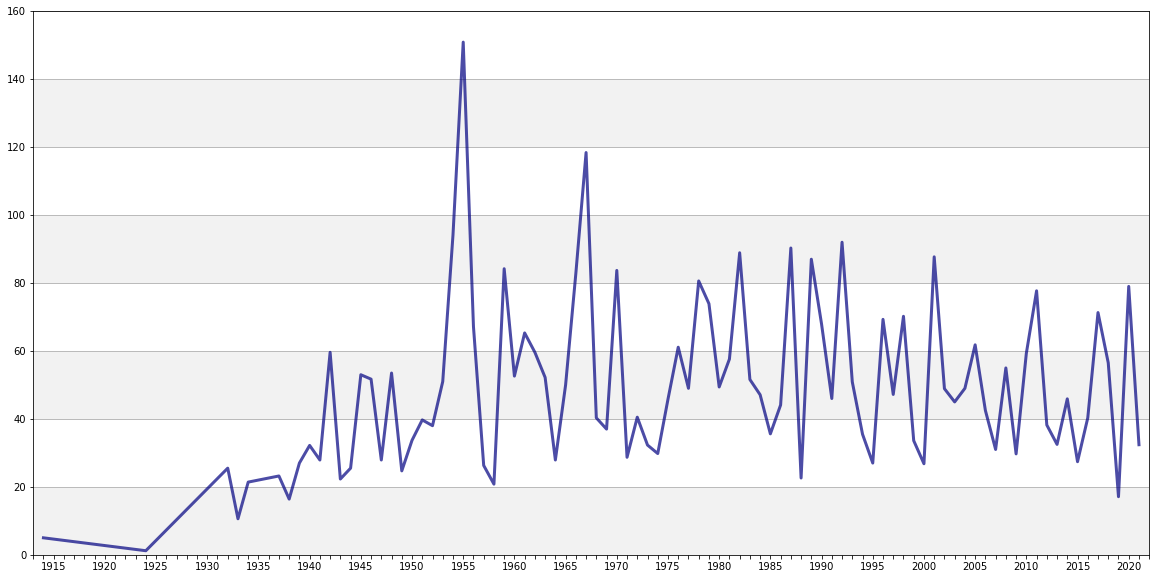

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_year_max.index, df_year_max.values, color='navy', linewidth=3, alpha=0.7)

ax.xaxis.set_major_locator(mticker.MultipleLocator())

def func(x, pos):
    if not x%5:
        return "{:g}".format(x)
    else:
        return ""
ax.xaxis.set_major_formatter(mticker.FuncFormatter(func))
plt.xlim(1913,2022)
plt.ylim(0,160)
plt.grid(True, axis='y')

yticks, _ = plt.yticks()
for y0, y1 in zip(yticks[::2], yticks[1::2]):
    plt.axhspan(y0, y1, color='gray', alpha=0.1, zorder=0)
plt.yticks(yticks)

plt.show()


In [ ]:
df_year_bigsnow = df_wea_null.groupby(['일시'])['일 최심신적설(cm)'].apply(list)

In [ ]:
df_year_bigsnow_1 = df_year_bigsnow.reset_index()
df_year_bigsnow_1['year'] = pd.to_datetime(df_year_bigsnow_1['일시']).dt.year

In [ ]:
def calculate_snow(x):
    result = 0
    for i in x:
        if i >=5:
            result = 1
            break
        else:
            pass
    return result
    
def calculate_bigsnow(x):
    result = 0
    for i in x:
        if i >=20:
            result = 1
            break
        else:
            pass
    return result

In [ ]:
df_year_bigsnow_1

일시                                일 최심신적설(cm)  year  대설여부  적설여부
0    1914-04-04                                      [5.0]  1914     0     1
1    1924-01-09                                      [0.4]  1924     0     0
2    1924-01-24                                      [0.5]  1924     0     0
3    1924-01-25                                      [1.2]  1924     0     0
4    1932-01-01                                     [25.5]  1932     1     1
...         ...                                        ...   ...   ...   ...
5983 2021-02-23                                      [2.1]  2021     0     0
5984 2021-03-01  [32.4, 9.5, 2.3, 0.3, 0.4, 0.2, 0.4, 0.2]  2021     1     1
5985 2021-03-02             [1.7, 6.2, 0.3, 1.9, 6.2, 0.1]  2021     0     1
5986 2021-03-06                                      [2.3]  2021     0     0
5987 2021-03-07                                      [0.1]  2021     0     0

[5988 rows x 5 columns]

In [ ]:
df_year_bigsnow_1['대설여부'] = df_year_bigsnow_1['일 최심신적설(cm)'].apply(lambda x: calculate_bigsnow(x)).values
df_year_bigsnow_1['적설여부'] = df_year_bigsnow_1['일 최심신적설(cm)'].apply(lambda x: calculate_snow(x)).values

df_snow_big = df_year_bigsnow_1.groupby('year')['대설여부'].sum()
df_snow = df_year_bigsnow_1.groupby('year')['적설여부'].sum()

In [ ]:
df_snow.to_excel('3번그래프데이터.xlsx')
df_snow_big.to_excel('4번그래프데이터.xlsx')

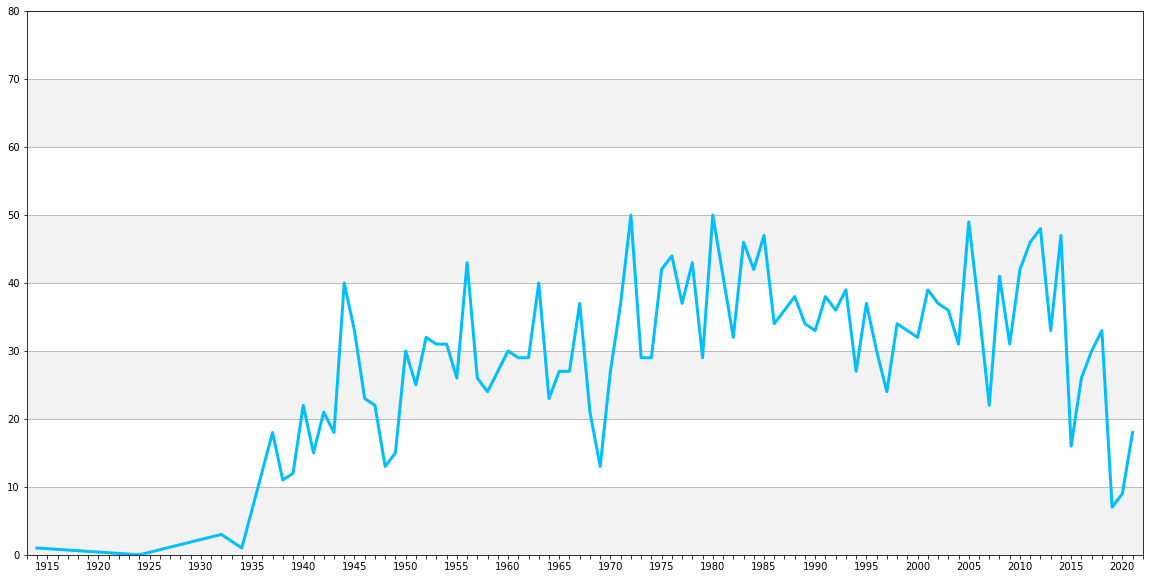

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_snow.index, df_snow.values, color='deepskyblue', linewidth=3, alpha=1)

ax.xaxis.set_major_locator(mticker.MultipleLocator())

def func(x, pos):
    if not x%5:
        return "{:g}".format(x)
    else:
        return ""
ax.xaxis.set_major_formatter(mticker.FuncFormatter(func))
plt.xlim(1913,2022)
plt.ylim(0,80)
plt.grid(True, axis='y')

yticks, _ = plt.yticks()
for y0, y1 in zip(yticks[::2], yticks[1::2]):
    plt.axhspan(y0, y1, color='gray', alpha=0.1, zorder=0)
plt.yticks(yticks)

plt.show()



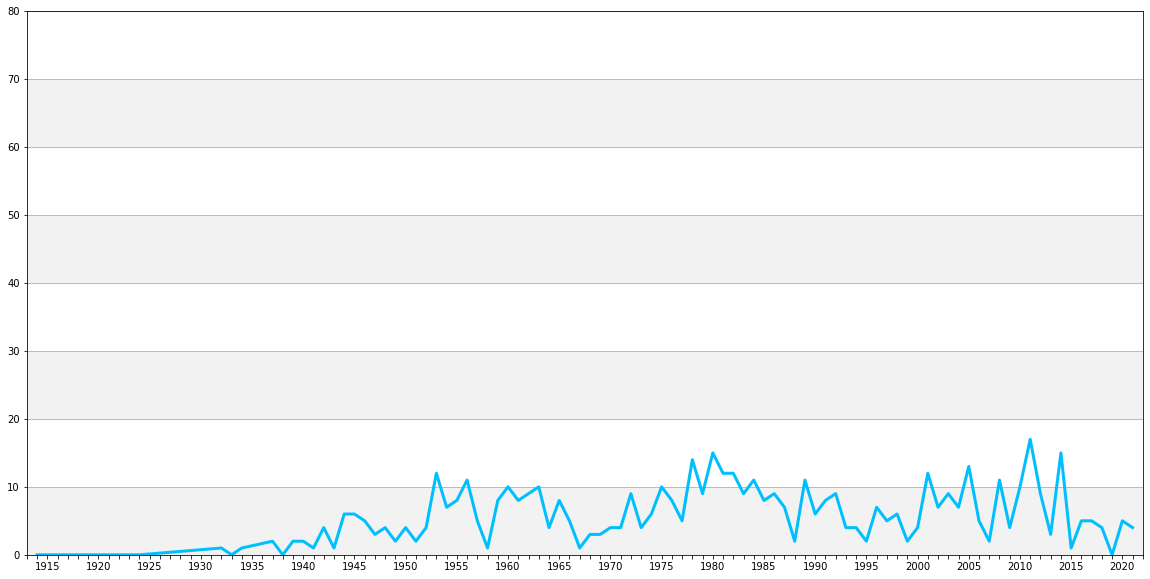

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_snow_big.index, df_snow_big.values, color='deepskyblue', linewidth=3, alpha=1)

ax.xaxis.set_major_locator(mticker.MultipleLocator())

def func(x, pos):
    if not x%5:
        return "{:g}".format(x)
    else:
        return ""
ax.xaxis.set_major_formatter(mticker.FuncFormatter(func))
plt.xlim(1913,2022)
plt.ylim(0,80)
plt.grid(True, axis='y')

yticks, _ = plt.yticks()
for y0, y1 in zip(yticks[::2], yticks[1::2]):
    plt.axhspan(y0, y1, color='gray', alpha=0.1, zorder=0)
plt.yticks(yticks)

plt.show()




### 모델링-ml

In [ ]:
df_wea_null = df_wea_null.sort_values(by=['지점명','일시'], ascending=True)
df_wea_null = df_wea_null.fillna(0)

In [10]:
df_wea_null[['지점', '지점명', '일시', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)','평균 상대습도(%)', '일 최심신적설(cm)', '위도', '경도', '고도']].to_excel('전처리데이터.xlsx')

In [ ]:
lst_place = df_wea_null['지점명'].unique()
col_y = '일 최심신적설(cm)'
col_x = list(set(df_wea_null.columns)-set([col_y]))

In [ ]:
df_date_range = pd.Series(sorted(df_wea_null.year.unique()))
train_range = len(df_date_range)*0.8
df_date_range_train = df_date_range.loc[:train_range-1]
df_date_range_test = df_date_range.loc[train_range:]

In [ ]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for idx, i in enumerate(range(0, len(lst), n)):
        print(idx, i, i+n)
        if idx == 4:
            yield lst[i:]
        elif idx == 5:
            pass
        else:
            yield lst[i:i + n]
            
fold_data = list(chunks(df_date_range_train.values, 14))
df_train = df_wea_null.loc[df_wea_null['year'].isin(df_date_range_train.values)]
df_test = df_wea_null.loc[df_wea_null['year'].isin(df_date_range_test.values)]

In [ ]:
# 성능 평가 및 과적합 검증
def MAE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)))
def MSE(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred)))
def RMSE(y_true, y_pred):
    return np.sqrt(MSE(y_true, y_pred))
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def MPE(y_true, y_pred): 
    return np.mean((y_true - y_pred) / y_true) * 100

In [ ]:


model_rf = RandomForestRegressor()
model_svm = SVR()
model_xgb = XGBRegressor()
model_lr = LinearRegression()
# 튜닝할 파라미터 선택
lst_params_rf = {"bootstrap":[False], "n_estimators":[3, 10], "max_features":[4, 8],'max_depth' : [3,5,7]}
lst_params_svm = {'C': [1], 'gamma': [1]}
lst_params_xgb =  {'max_depth':[ 3,5,7],'n_estimators':[3, 10, 20]}
lst_params_lr = {}

model_list = [model_rf, model_xgb]#[model_rf , model_svm, model_xgb, model_lr]
model_param_list = [lst_params_rf, lst_params_svm, lst_params_xgb, lst_params_lr]

lst_total_result = []
lst_model_name = []
for model, params in zip(model_list, model_param_list):
    model_name = type(model).__name__
    lst_model_name.append(model_name)
    print(model_name)
    
    lst_fold_result = []
    lst_fold_name = []
    for idx, fold_valid in enumerate(fold_data):
        fold_name = 'fold_{}'.format(str(idx))
        print(fold_name)
        lst_col_learning = list(set(col_x) - set(['Unnamed: 0','일시','지점명','지점','year']))

        train = df_train.loc[~df_train['year'].isin(fold_valid)]
        test = df_train.loc[df_train['year'].isin(fold_valid)]
        X_train, y_train = train[lst_col_learning], train[col_y]
        X_test, y_test = test[lst_col_learning], test[col_y]
        grid = GridSearchCV(model, params, cv=3, n_jobs = -1, scoring="neg_mean_squared_error")
        grid = grid.fit(X_train, y_train)
        print('The parameters combination that would give best accuracy is : ')
        print(grid.best_params_)
        model = grid.best_estimator_
        model = model.fit(X_train, y_train)
        Y_test_pred = model.predict(X_test)

        Test_mae = MAE(y_test, Y_test_pred)
        Test_mse = MSE(y_test, Y_test_pred)
        Test_rmse = RMSE(y_test, Y_test_pred)
        Test_mape = MAPE(y_test, Y_test_pred)
        Test_r2 = r2_score(y_test, Y_test_pred)
        
        lst_fold_name.append(fold_name)
        lst_fold_result.append([Test_mae, Test_mse, Test_rmse, Test_mape, Test_r2])
    df_lst_fold_result = pd.DataFrame(lst_fold_result, index = lst_fold_name, columns=['mae','mse','rmse','mape','r2'])
    lst_mean_result = df_lst_fold_result.mean(axis=0).values
    
    lst_total_result.append(lst_mean_result)
    print('-'*100)
    print('-'*100)
df_total_result = pd.DataFrame(lst_total_result, index = lst_model_name, columns=['mae','mse','rmse','mape','r2'])

RandomForestRegressor
fold_4


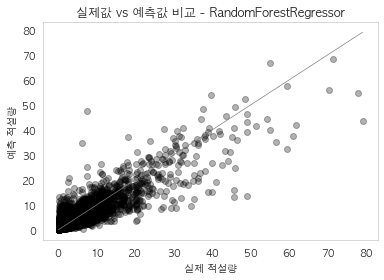

SVR
fold_4


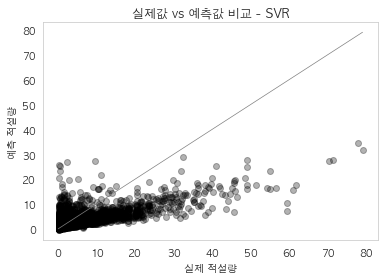

XGBRegressor
fold_4
[22:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


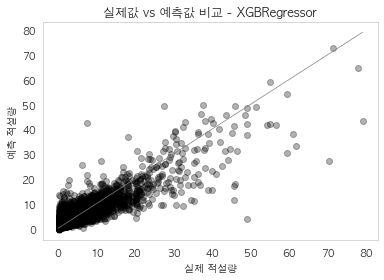

LinearRegression
fold_4


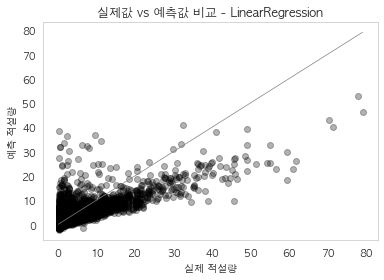

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
for model, params in zip(model_list, model_param_list):
    model_name = type(model).__name__
    lst_model_name.append(model_name)
    print(model_name)

    fold_name = 'fold_{}'.format(str(idx))
    print(fold_name)
    lst_col_learning = list(set(col_x) - set(['Unnamed: 0','일시','지점명','지점','year']))


    X_train, y_train = df_train[lst_col_learning], df_train[col_y]
    X_test, y_test = df_test[lst_col_learning], df_test[col_y]
    #grid = GridSearchCV(model, params, cv=3, n_jobs = -1, scoring="neg_mean_squared_error")
    #grid = grid.fit(X_train, y_train)
    #print('The parameters combination that would give best accuracy is : ')
    #print(grid.best_params_)
    #model = grid.best_estimator_
    model = model.fit(X_train, y_train)
    Y_test_pred = model.predict(X_test)

    plt.scatter(y_test, Y_test_pred, color='black', alpha=0.3)
    grid = list(range(80))
    plt.plot(grid,grid, color='gray', linewidth=0.7)
    plt.xlabel("실제 적설량")
    plt.ylabel("예측 적설량")
    plt.title("실제값 vs 예측값 비교 - {}".format(model_name))
    plt.savefig('실제값_예측값_비교_{}.png'.format(model_name))
    plt.grid(False)
    plt.show()

In [57]:
df_total_result

mae        mse      rmse        mape        r2
RandomForestRegressor  1.782300  13.928354  3.658780  128.372056  0.569661
SVR                    2.737934  35.948961  5.916768  196.428899 -0.070887
XGBRegressor           1.622283  12.354300  3.448651  112.121658  0.627480
LinearRegression       2.324629  18.199363  4.223680  241.673011  0.449565

Feature Importance of  XGBRegressor
최저기온(°C)                       importance: 0.1829
위도                             importance: 0.0000
평균 상대습도(%)                     importance: 0.0147
고도                             importance: 0.0000
경도                             importance: 0.0000
최고기온(°C)                       importance: 0.3459
일강수량(mm)                       importance: 0.4564


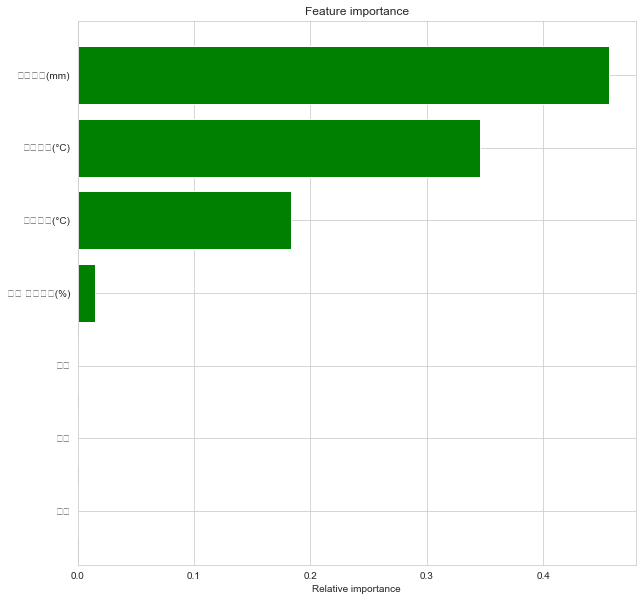

In [65]:
import matplotlib.pyplot as plt
import warnings
plt.rcParams['font.family'] = 'AppleGothic'
warnings.filterwarnings(action='ignore') 

sns.set_style('whitegrid')

feature_importance = model.feature_importances_
feature_importance_rel = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx_rel = np.argsort(feature_importance_rel)
ypos = np.arange(sorted_idx_rel.shape[0]) + .5

n=0
print("Feature Importance of ", model.__repr__().split('(')[0])
for index in feature_importance:   
    print ('{:30}'.format(X_train.columns[n]), 
           'importance: {:05.4f}'.format(index)
          )
    n = n+1

plt.figure(figsize=(10,10))
plt.barh(ypos, feature_importance[sorted_idx_rel], align='center', color = "Green")
plt.yticks(ypos, X_train.columns[sorted_idx_rel])
plt.xlabel('Relative importance')
plt.title('Feature importance')
plt.show()

### 모델링-lstm

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
#import talos
import tensorflow as tf

In [28]:
pip install tensorflow


The following command must be run outside of the IPython shell:

    $ pip install tensorflow

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [17]:
lst_place_top10 = df_train['지점'].value_counts().index[:10]

In [55]:
df_train_lstm.shape

(1470, 13)

In [56]:
import warnings

warnings.filterwarnings(action='ignore')

def load_data(data_all, look_back, lst_cols_x, cols_y):

    scaler_x_tr = MinMaxScaler()
    scaler_x_te = MinMaxScaler()
    scaler_y_tr = MinMaxScaler()
    scaler_y_te = MinMaxScaler()
    data_all = data_all[lst_cols_x+[cols_y]]
    #train_size = int(len(data_all) * 0.8)
    #train, test = data_all.iloc[0:train_size, :], data_all.iloc[train_size - look_back:len(data_all), :]


    data_all[lst_cols_x] = scaler_x_tr.fit_transform(data_all[lst_cols_x].values)
    #test[lst_cols_x] = scaler_x_te.fit_transform(test[lst_cols_x].values)

    #data_all[cols_y] = scaler_y_tr.fit_transform(data_all[cols_y].values.reshape(-1,1))
    #test[cols_y] = scaler_y_te.fit_transform(test[cols_y].values.reshape(-1,1))
        
    data_all = data_all.astype(np.float32)
    #test = test.values[:,3:].astype(np.float32)


    
    return data_all

def create_dataset(dataset, look_back):

    data_x, data_y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        data_x.append(a)
        data_y.append(dataset[i + look_back, -1])
    return np.array(data_x), np.array(data_y)

def model_lstm(x_train, y_train, x_val, y_val, params):

    # 모델 생성
    model = Sequential()
    model.add(LSTM(params['first_neuron'], 
                   dropout=params['dropout'],
                   activation='relu')
             )
    
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', metrics=['mae', 'mape'], optimizer=tf.keras.optimizers.Adam(lr=0.02))
    
    history = model.fit(x=x_train, 
                    y=y_train,
                    #validation_data=[x_val, y_val],
                    validation_split=0.1,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose=0,
                    shuffle=False
                    )
    return history, model

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units',
                                        min_value=2,
                                        max_value=6,
                                        step=2), 
                   dropout=0.5,
                   activation='relu')
             )
    
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])))
    return model



params = {
    'first_neuron': [6, 12, 18, 24, 48],
    'dropout': [0.1, 0.2, 0.4],
    'batch_size': [8, 16, 32, 64, 128, 256],
    'epochs': [30, 40, 50, 60]
    }

lst_fold_result = []
lst_fold_name = []

for place_top10 in lst_place_top10:
    for idx, fold_valid in enumerate(fold_data):
        fold_name = 'fold_{}'.format(str(idx))
        print(fold_name)
        df_train_lstm = df_train.loc[df_train['지점']==place_top10]
        lst_col_learning = list(set(col_x) - set(['Unnamed: 0','일시','지점명','지점','year',
                                                  '위도','경도','고도']))

        train = df_train_lstm[:-100]#.loc[~df_train_lstm['year'].isin(fold_valid)]
        test = df_train_lstm[-100:]#.loc[df_train_lstm['year'].isin(fold_valid)]

        # split into train and test sets
        train = load_data(train, 3, lst_col_learning, col_y)
        test = load_data(test, 3, lst_col_learning, col_y)

        # reshape into X=t and Y=t+1
        train_x, train_y = create_dataset(train.values, 3)
        test_x, test_y = create_dataset(test.values, 3)

        train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], -1))
        test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], -1))    

        #tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=1,executions_per_trial=1,directory='my_dir2',project_name='helloworld')
        #tuner.search(train_x, train_y,
        #             epochs=1,
        #             validation_data=(test_x, test_y))
        #models = tuner.get_best_models(num_models=1)
        #[i[0] for i in models[0].predict(test_x)]

        #Y_test_pred, test_y = train_model(train_x, train_y, test_x, test_y, params, 1)
        # add input parameters to the function
        # replace the hyperparameter inputs with references to params dictionary 
        model = Sequential()
        model.add(LSTM(4))
        #model.add(Dense(8, activation=params['activation']))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', metrics=['acc'], optimizer='adam')
        # make sure history object is returned by model.fit()
        history = model.fit(x=train_x, 
                        y=train_y,
                        #validation_data=[x_val, y_val],
                        validation_split=0.2,
                        epochs=10,
                        #batch_size=params['batch_size'],
                        verbose=0,
                        shuffle=False
                        )
        Y_test_pred = model.predict(test_x)
        Y_test_pred = [i[0] for i in Y_test_pred]

        Test_mae = MAE(test_y, Y_test_pred)
        Test_mse = MSE(test_y, Y_test_pred)
        Test_rmse = RMSE(test_y, Y_test_pred)
        Test_mape = MAPE(test_y, Y_test_pred)
        Test_r2 = r2_score(test_y, Y_test_pred)

        lst_fold_name.append(fold_name)
        lst_fold_result.append([Test_mae, Test_mse, Test_rmse, Test_mape, Test_r2])
    df_lst_fold_result = pd.DataFrame(lst_fold_result, index = lst_fold_name, columns=['mae','mse','rmse','mape','r2'])
    lst_mean_result = df_lst_fold_result.mean(axis=0).values

    df_total_result_lstm = pd.DataFrame(lst_mean_result, columns = ['lstm'], index=['mae','mse','rmse','mape','r2'])
    print(df_total_result_lstm)
    print('='*50)

fold_0
fold_1
fold_2
fold_3
fold_4
            lstm
mae     5.280491
mse    72.680963
rmse    8.525223
mape  556.003771
r2     -0.025128
fold_0
fold_1
fold_2
fold_3
fold_4
            lstm
mae     5.663186
mse    90.838187
rmse    9.482065
mape  454.065988
r2     -0.100109
fold_0
fold_1
fold_2
fold_3
fold_4
            lstm
mae     4.515948
mse    63.961233
rmse    7.384982
mape  406.532214
r2     -0.100087
fold_0
fold_1
fold_2
fold_3
fold_4
            lstm
mae     3.785975
mse    49.303863
rmse    6.115962
mape  379.592368
r2     -0.084694
fold_0
fold_1
fold_2
fold_3
fold_4
            lstm
mae     3.454092
mse    43.201899
rmse    5.759311
mape  344.339237
r2     -0.095013
fold_0
fold_1
fold_2
fold_3
fold_4
            lstm
mae     3.242427
mse    38.253797
rmse    5.411722
mape  312.022385
r2     -0.111262
fold_0
fold_1
fold_2
fold_3
fold_4
            lstm
mae     3.014827
mse    34.416094
rmse    5.120721
mape  295.659227
r2     -0.104708
fold_0
fold_1
fold_2
fold_3
fold_4
      

In [36]:
lst_place_top10
place_top10 = 115

In [39]:
df_train_lstm

Unnamed: 0   지점  지점명         일시  최저기온(°C)  최고기온(°C)  일강수량(mm)  \
1112          1112  115  울릉도 1938-11-12      -3.3       4.4      25.0   
1125          1125  115  울릉도 1938-11-25       1.7       4.3       0.5   
1136          1136  115  울릉도 1938-12-06       0.7       3.3       2.2   
1141          1141  115  울릉도 1938-12-11       0.4       4.9       9.8   
1154          1154  115  울릉도 1938-12-24      -1.4       4.9       8.4   
...            ...  ...  ...        ...       ...       ...       ...   
735826      735826  115  울릉도 2003-12-18       0.6       5.0       6.0   
735827      735827  115  울릉도 2003-12-19      -5.0       2.7      13.5   
735828      735828  115  울릉도 2003-12-20      -4.5       1.5       8.0   
735834      735834  115  울릉도 2003-12-26      -2.2       4.1      20.0   
735835      735835  115  울릉도 2003-12-27      -1.7       2.2       8.1   

        평균 상대습도(%)  일 최심신적설(cm)       위도        경도      고도  year  
1112          65.0         13.2  37.4813  130.8986  221.14  1938  
1125          58.7          0.1  37.4813  130.8986  221.14  1938  
1136          54.7          2.0  37.4813  130.8986  221.14  1938  
1141          79.0          0.3  37.4813  130.8986  221.14  1938  
1154          60.3          2.8  37.4813  130.8986  221.14  1938  
...            ...          ...      ...       ...     ...   ...  
735826        78.5          1.2  37.4813  130.8986  221.14  2003  
735827        81.6          9.4  37.4813  130.8986  221.14  2003  
735828        74.0          9.0  37.4813  130.8986  221.14  2003  
735834        76.3         25.0  37.4813  130.8986  221.14  2003  
735835        74.1          7.2  37.4813  130.8986  221.14  2003  

[2775 rows x 13 columns]

In [45]:
train_x

array([[[-3.3, 25. , 65. ,  4.4, 13.2],
        [ 1.7,  0.5, 58.7,  4.3,  0.1],
        [ 0.7,  2.2, 54.7,  3.3,  2. ],
        ...,
        [-1.4,  8.4, 60.3,  4.9,  2.8],
        [-2.4,  0.3, 51. ,  1.2,  1.7],
        [-3.1,  0.3, 43. , -0.8,  0.8]],

       [[ 1.7,  0.5, 58.7,  4.3,  0.1],
        [ 0.7,  2.2, 54.7,  3.3,  2. ],
        [ 0.4,  9.8, 79. ,  4.9,  0.3],
        ...,
        [-2.4,  0.3, 51. ,  1.2,  1.7],
        [-3.1,  0.3, 43. , -0.8,  0.8],
        [-5.2,  1. , 48.3, -2.3,  1. ]],

       [[ 0.7,  2.2, 54.7,  3.3,  2. ],
        [ 0.4,  9.8, 79. ,  4.9,  0.3],
        [-1.4,  8.4, 60.3,  4.9,  2.8],
        ...,
        [-3.1,  0.3, 43. , -0.8,  0.8],
        [-5.2,  1. , 48.3, -2.3,  1. ],
        [-7.2,  4.2, 49. , -3.6,  5.2]],

       ...,

       [[-3.6,  2. , 71.6,  0.4,  2. ],
        [ 0. , 16.5, 94.1,  2.9,  0.9],
        [-0.6,  1.5, 65.3,  4. ,  1.4],
        ...,
        [ 0.4,  8. , 72.3,  6. ,  0.8],
        [ 0.8,  4. , 66.8,  7.5,  0.3],
        [

In [48]:
lst_col_learning

['최저기온(°C)', '일강수량(mm)', '평균 상대습도(%)', '최고기온(°C)']

C:\Users\user\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3493: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\user\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3464: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

Train on 1174 samples, validate on 294 samples
Epoch 1/10
1174/1174 [==============================] - 2s 2ms/sample - loss: 132.6857 - acc: 0.0000e+00 - val_loss: 148.6810 - val_acc: 0.0000e+00
Epoch 2/10
1174/1174 [==============================] - 0s 87us/sample - loss: 130.3153 - acc: 0.0000e+00 - val_loss: 146.1879 - val_acc: 0.0000e+00
Epoch 3/10
1174/1174 [==============================] - 0s 84us/sample - loss: 127.8179 - acc: 8.5179e-04 - val_loss: 143.4302 - val_acc: 0.0170
Epoch 4/10
1174/1174 [==============================] - 0s 79us/sample - loss: 125.1047 - acc: 0.0136 - val_loss: 140.4278 - val_acc: 0.0204
Epoch 5/10
1174/1174 [==============================] - 0s 77us/sample - loss: 122.1360 - acc: 0.0204 - val_loss: 137.2204 - val_acc: 0.0306
Epoch 6/10
1174/1174 [==============================] - 0s 76us/sample - loss: 118.9472 - acc: 0.0204 - val_loss: 133.7775 - val_acc: 0.0340
Epoch 7/10
1174/1174 [==============================] - 0s 87us/sample - loss: 115.9699 

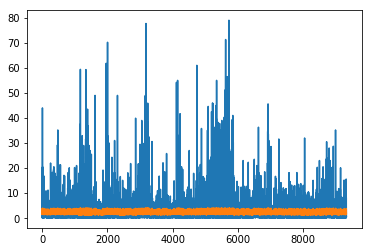

In [50]:
# split into train and test sets
lst_col_learning = list(set(col_x) - set(['Unnamed: 0','일시','지점명','지점','year'
                                          ,'위도','경도','고도','최저기온(°C)', '일강수량(mm)', '평균 상대습도(%)']))
df_train_lstm = df_train.loc[df_train['지점']==place_top10]
#df_test_lstm = df_test.loc[df_test['지점']==place_top10]

train = load_data(df_train_lstm, 3, lst_col_learning, col_y)
test = load_data(df_test, 3, lst_col_learning, col_y)

# reshape into X=t and Y=t+1
train_x, train_y = create_dataset(train.values, 1)
test_x, test_y = create_dataset(test.values, 1)

train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], -1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], -1))    

#tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=1,executions_per_trial=1,directory='my_dir2',project_name='helloworld')
#tuner.search(train_x, train_y,
#             epochs=1,
#             validation_data=(test_x, test_y))
#models = tuner.get_best_models(num_models=1)
#[i[0] for i in models[0].predict(test_x)]

#Y_test_pred, test_y = train_model(train_x, train_y, test_x, test_y, params, 1)
# add input parameters to the function
# replace the hyperparameter inputs with references to params dictionary 
model = Sequential()
model.add(LSTM(10))
#model.add(Dense(8, activation=params['activation']))
model.add(Dense(1))
model.compile(loss='mean_squared_error', metrics=['acc'], optimizer='adam')
# make sure history object is returned by model.fit()
history = model.fit(x=train_x, 
                y=train_y,
                #validation_data=[x_val, y_val],
                validation_split=0.2,
                epochs=10,
                #batch_size=32,
                verbose=1,
                shuffle=False
                )
Y_test_pred = model.predict(test_x)
Y_test_pred = [i[0] for i in Y_test_pred]

grid = list(range(len(test_y)))
plt.plot(grid,test_y)
plt.plot(grid,Y_test_pred)
plt.grid(False)
plt.show()

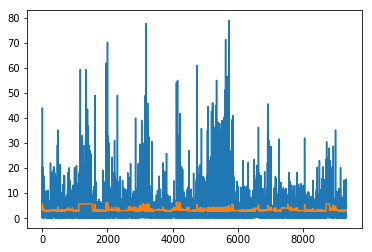

In [32]:
plt.plot(grid,test_y)
plt.plot(grid,Y_test_pred)

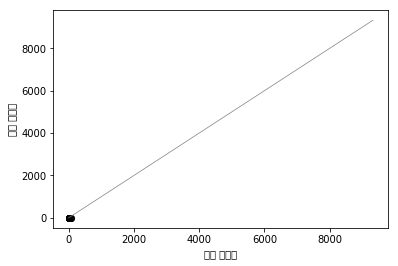

In [30]:
plt.scatter(test_y, Y_test_pred, color='black', alpha=0.3)
grid = list(range(9321))
plt.plot(grid,grid, color='gray', linewidth=0.7)
plt.xlabel("실제 적설량")
plt.ylabel("예측 적설량")
plt.grid(False)
plt.show()

In [25]:
df_total_result_lstm = pd.DataFrame(lst_mean_result, columns = ['lstm'], index=['mae','mse','rmse','mape','r2']).T
df_total_result_lstm

mae         mse      rmse        mape        r2
lstm  5.217726  100.141013  9.828019  305.320768 -0.140377

# 테스트 데이터 예측 및 결과

In [66]:
df_date_range = pd.Series(sorted(df_wea_null.year.unique()))
train_range = len(df_date_range)*0.8
df_date_range_train = df_date_range.loc[:train_range-1]
df_date_range_test = df_date_range.loc[train_range:]

In [67]:
df_test = df_wea_null.loc[df_wea_null['year'].isin(df_date_range_test.values)]

In [68]:
X_test, y_test = df_test[lst_col_learning], df_test[col_y]
Y_test_pred = model.predict(X_test)

df_test['예측적설량'] = Y_test_pred
df_test['year_month'] = df_test['일시'].astype(str).apply(lambda x: x[:7])

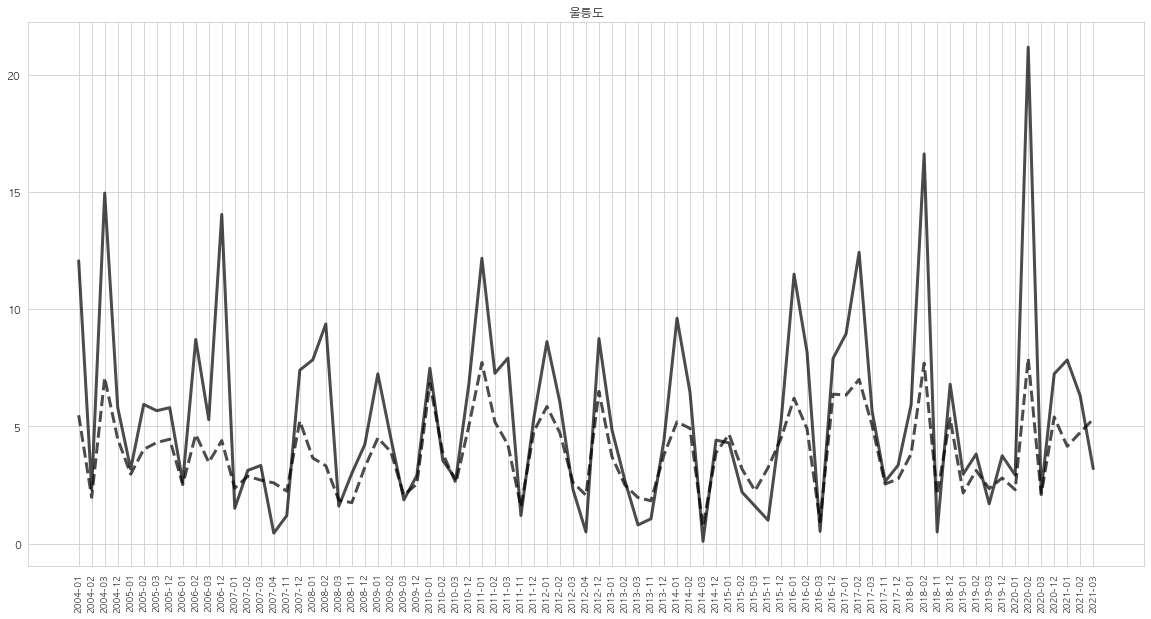

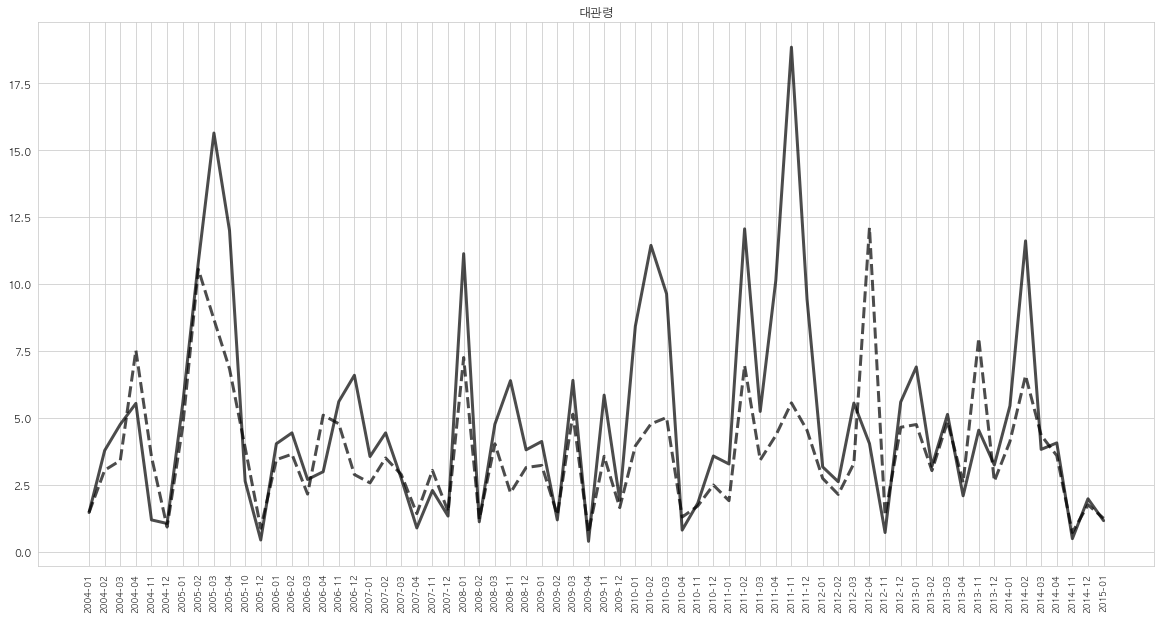

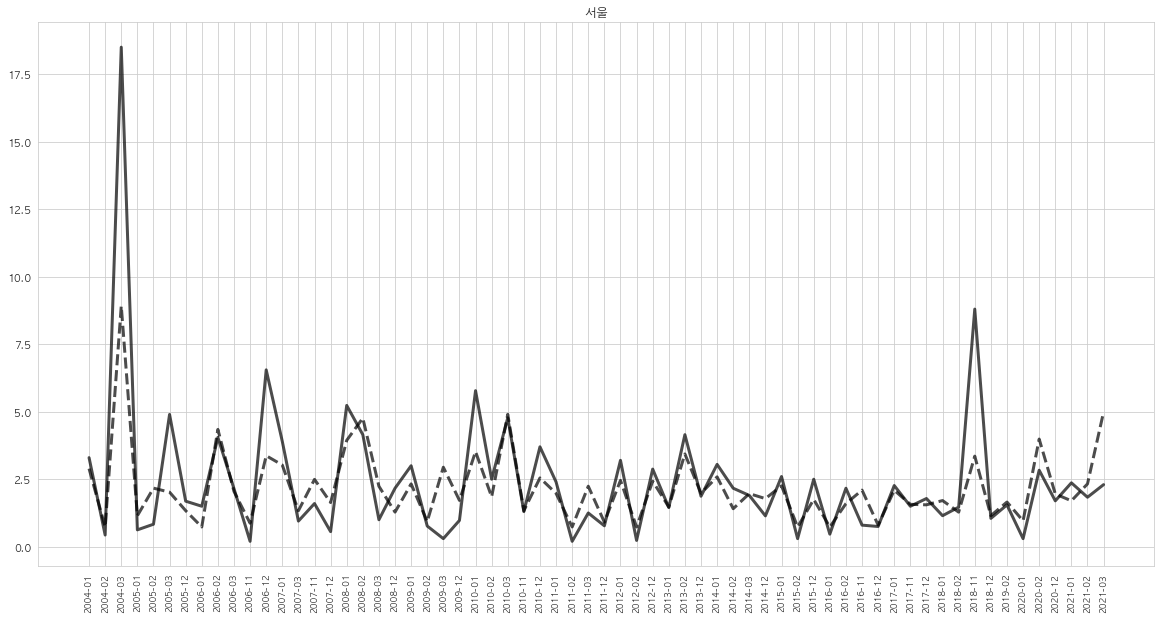

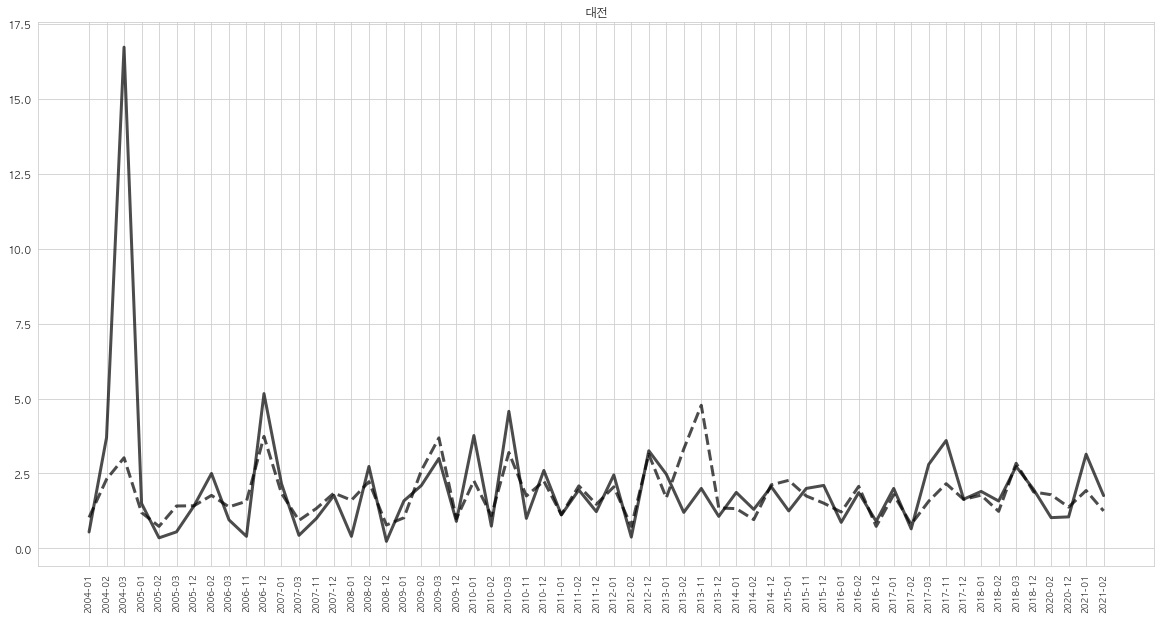

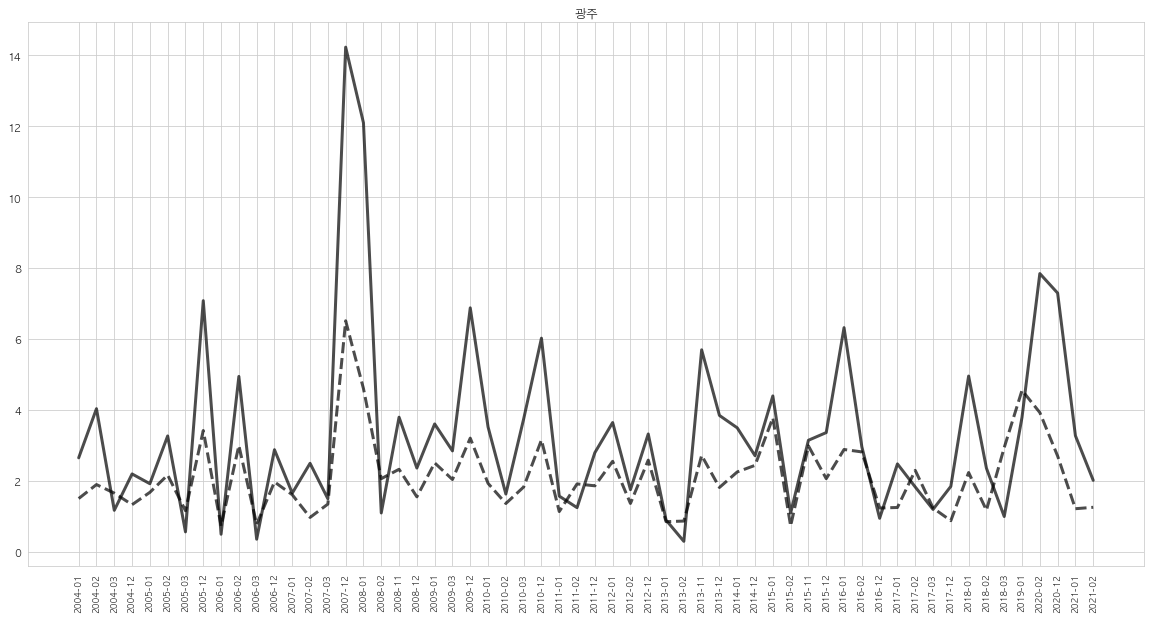

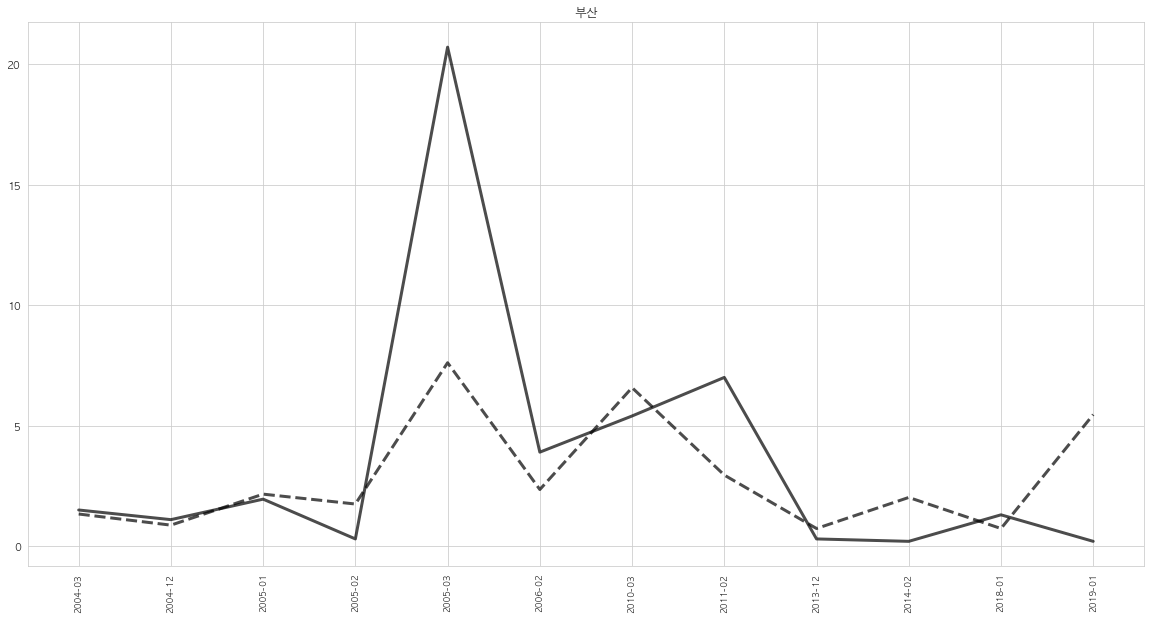

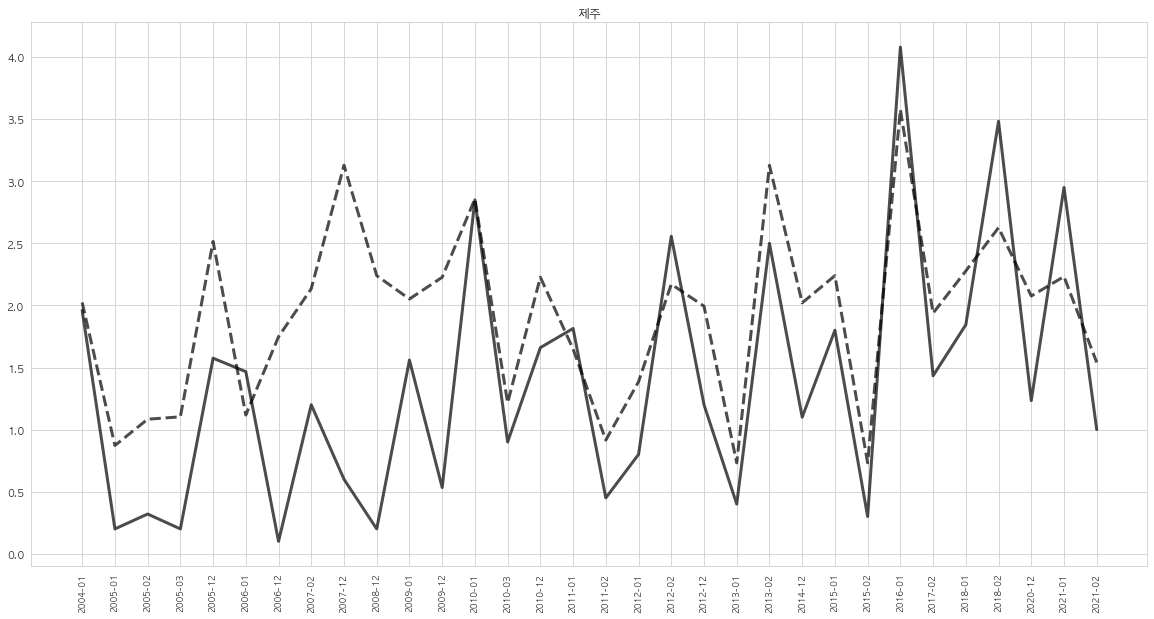

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.rcParams['font.family'] = 'AppleGothic'
warnings.filterwarnings(action='ignore') 

lst_place = ['울릉도','대관령','서울','대전','광주','부산','제주']
for place in lst_place:
    df_plot = df_test.loc[df_test['지점명']==place].groupby('year_month')[['일 최심신적설(cm)','예측적설량']].agg('mean')
    
    fig, ax = plt.subplots(figsize=(20,10))
    x_grid = list(range(len(df_plot)))
    ax.plot(x_grid, df_plot['예측적설량'].values, color='black', linewidth=3, alpha=0.7, linestyle = '--')
    ax.plot(x_grid, df_plot['일 최심신적설(cm)'].values, color='black', linewidth=3, alpha=0.7)
    plt.title(place)
    plt.grid(True, axis='both')

    plt.xticks(x_grid, df_plot.index, size='small', rotation=90)
    plt.savefig('savefig_{}.png'.format(place))
    plt.show()

# RCP 기후 시나리오를 이용한 예측

In [88]:
cd ..

C:\


In [90]:
cd D:\

D:\


In [92]:
cd 대설예측 관련 데이터

D:\대설예측 관련 데이터


In [91]:
ls

 D 드라이브의 볼륨: Backup Plus
 볼륨 일련 번호: 5F1E-5148

 D:\ 디렉터리

2020-07-25  오후 07:36    <DIR>          Start_Here_Mac.app
2021-04-30  오전 10:00    <DIR>          대설예측 관련 데이터
2021-04-05  오전 10:48    <DIR>          사업
2021-04-23  오후 08:49    <DIR>          연구
               0개 파일                   0 바이트
               4개 디렉터리  262,838,288,384 바이트 남음


In [94]:
import glob

In [12]:
# 일렬로 되어 있는 값들을 격자로 구성하는 코드
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        
def detect_place(target_lat, target_lon):
    c = 0
    base_lat = 39
    
    result_lat = 0
    for idx in range(601):
        base_lat = round(base_lat-c,2)
        if base_lat == target_lat:
            result_lat = idx
        else:
            pass
        c = 0.01

    c = 0
    base_lon = 124.5
    
    result_lon = 0
    for idx in range(751):
        base_lon = round(base_lon+c,2)
        if base_lon == target_lon:
            result_lon = idx
        else:
            pass
        c = 0.01
    
    return result_lat, result_lon

lst_value = ['최고기온','최저기온']
for value in lst_value:
    print(value)
    path = glob.glob('D:/대설예측 관련 데이터/RCP시나리오/{}/*/*/*'.format(value))
    print(len(path))
    lst_data_total_rain = []
    for idx, file in enumerate(path):
        print(idx)
        date = file.split('/')[-1].split('_')[-2]
        
        if (date[4:6] in ['10','11','12','01','02','03','04']) and (int(date[:4]) in list(range(2021,2101,1))):
            # 해당 파일의 지점별 요인값 저장
            file1 = open(file, 'r', encoding='cp949')
            Lines = file1.readlines()
            line1 = Lines[-1].strip().split(' ')

            arr_val = np.array(list(chunks(line1, 751)))

            lst_data_day_rain = []
            for place in dict_meta_1.keys():

                # 해당 지점의 위/경도 저장
                lst_num_x = str(dict_meta_1[place][0]).split('.')
                lst_num_y = str(dict_meta_1[place][1]).split('.')

                lat_place, lon_place = float('.'.join([lst_num_x[0], lst_num_x[1][:2]])), float('.'.join([lst_num_y[0], lst_num_y[1][:2]]))#36.55, 128.20

                # 해당 지점의 위/경도를 이용한 요인값 찾기
                lat, lon = detect_place(lat_place, lon_place)

                # 특정 지역의 요인값 저장
                val_place = float(arr_val[lat, lon])

                lst_data_day_rain.append([date,place,val_place])

            lst_data_total_rain.append(pd.DataFrame(lst_data_day_rain))
        else:
            pass
        #print(lst_data_total_rain)
    pd.concat(lst_data_total_rain).to_excel('D:/대설예측 관련 데이터/RCP시나리오/rcp_{}.xlsx'.format(value))

최고기온
131488
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
27

1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099


3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854


5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495


6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135


8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774


10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
1034

11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
1171

12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
1308

14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
1445

15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
1581

17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
1718

18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
1855

19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
19905
19906
19907
19908
19909
19910
19911
19912
19913
19914
19915
19916
19917
19918
19919
1992

21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
21187
21188
21189
21190
21191
21192
21193
21194
21195
21196
21197
21198
21199
21200
21201
21202
21203
21204
21205
21206
21207
21208
21209
21210
21211
21212
21213
21214
21215
21216
21217
21218
21219
21220
21221
21222
21223
21224
21225
21226
21227
21228
21229
21230
21231
21232
21233
21234
21235
21236
21237
21238
21239
21240
21241
21242
21243
21244
21245
21246
21247
21248
21249
21250
21251
21252
21253
21254
21255
21256
21257
21258
21259
21260
21261
21262
21263
21264
21265
21266
21267
21268
21269
21270
21271
21272
21273
21274
21275
21276
21277
21278
21279
21280
21281
21282
21283
21284
21285
2128

22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
22559
22560
22561
22562
22563
22564
22565
22566
22567
22568
22569
22570
22571
22572
22573
22574
22575
22576
22577
22578
22579
22580
22581
22582
22583
22584
22585
22586
22587
22588
22589
22590
22591
22592
22593
22594
22595
22596
22597
22598
22599
22600
22601
22602
22603
22604
22605
22606
22607
22608
22609
22610
22611
22612
22613
22614
22615
22616
22617
22618
22619
22620
22621
22622
22623
22624
22625
22626
22627
22628
22629
22630
22631
22632
22633
22634
22635
22636
22637
22638
22639
22640
22641
22642
22643
22644
22645
22646
22647
22648
22649
22650
22651
2265

23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23998
23999
24000
24001
24002
24003
24004
24005
24006
24007
24008
24009
24010
24011
24012
24013
24014
24015
24016
24017
2401

25218
25219
25220
25221
25222
25223
25224
25225
25226
25227
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
25256
25257
25258
25259
25260
25261
25262
25263
25264
25265
25266
25267
25268
25269
25270
25271
25272
25273
25274
25275
25276
25277
25278
25279
25280
25281
25282
25283
25284
25285
25286
25287
25288
25289
25290
25291
25292
25293
25294
25295
25296
25297
25298
25299
25300
25301
25302
25303
25304
25305
25306
25307
25308
25309
25310
25311
25312
25313
25314
25315
25316
25317
25318
25319
25320
25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25331
25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
25346
25347
25348
25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25366
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
2538

26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26647
26648
26649
26650
26651
26652
26653
26654
26655
26656
26657
26658
26659
26660
26661
26662
26663
26664
26665
26666
26667
26668
26669
26670
26671
26672
26673
26674
26675
26676
26677
26678
26679
26680
26681
26682
26683
26684
26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
26702
26703
26704
26705
26706
26707
26708
26709
26710
26711
26712
26713
26714
26715
26716
26717
26718
26719
26720
26721
26722
26723
26724
26725
26726
26727
26728
26729
26730
26731
26732
26733
26734
26735
26736
26737
26738
26739
26740
26741
26742
26743
26744
26745
26746
26747
26748
26749
26750
26751
2675

27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
27988
27989
27990
27991
27992
27993
27994
27995
27996
27997
27998
27999
28000
28001
28002
28003
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
28046
28047
28048
28049
28050
28051
28052
28053
28054
28055
28056
28057
28058
28059
28060
28061
28062
28063
28064
28065
28066
28067
28068
28069
28070
28071
28072
28073
28074
28075
28076
28077
28078
28079
28080
28081
28082
28083
28084
28085
28086
28087
28088
28089
28090
28091
28092
28093
28094
28095
28096
28097
28098
28099
28100
28101
28102
28103
28104
28105
28106
28107
28108
28109
28110
28111
28112
28113
28114
28115
28116
28117
2811

29318
29319
29320
29321
29322
29323
29324
29325
29326
29327
29328
29329
29330
29331
29332
29333
29334
29335
29336
29337
29338
29339
29340
29341
29342
29343
29344
29345
29346
29347
29348
29349
29350
29351
29352
29353
29354
29355
29356
29357
29358
29359
29360
29361
29362
29363
29364
29365
29366
29367
29368
29369
29370
29371
29372
29373
29374
29375
29376
29377
29378
29379
29380
29381
29382
29383
29384
29385
29386
29387
29388
29389
29390
29391
29392
29393
29394
29395
29396
29397
29398
29399
29400
29401
29402
29403
29404
29405
29406
29407
29408
29409
29410
29411
29412
29413
29414
29415
29416
29417
29418
29419
29420
29421
29422
29423
29424
29425
29426
29427
29428
29429
29430
29431
29432
29433
29434
29435
29436
29437
29438
29439
29440
29441
29442
29443
29444
29445
29446
29447
29448
29449
29450
29451
29452
29453
29454
29455
29456
29457
29458
29459
29460
29461
29462
29463
29464
29465
29466
29467
29468
29469
29470
29471
29472
29473
29474
29475
29476
29477
29478
29479
29480
29481
29482
29483
2948

30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
30720
30721
30722
30723
30724
30725
30726
30727
30728
30729
30730
30731
30732
30733
30734
30735
30736
30737
30738
30739
30740
30741
30742
30743
30744
30745
30746
30747
30748
30749
30750
30751
30752
30753
30754
30755
30756
30757
30758
30759
30760
30761
30762
30763
30764
30765
30766
30767
30768
30769
30770
30771
30772
30773
30774
30775
30776
30777
30778
30779
30780
30781
30782
30783
30784
30785
30786
30787
30788
30789
30790
30791
30792
30793
30794
30795
30796
30797
30798
30799
30800
30801
30802
30803
30804
30805
30806
30807
30808
30809
30810
30811
30812
30813
30814
30815
30816
30817
30818
30819
30820
30821
30822
30823
30824
30825
30826
30827
30828
30829
30830
30831
30832
30833
30834
30835
30836
30837
30838
30839
30840
30841
30842
30843
30844
30845
30846
30847
30848
30849
30850
3085

32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
32087
32088
32089
32090
32091
32092
32093
32094
32095
32096
32097
32098
32099
32100
32101
32102
32103
32104
32105
32106
32107
32108
32109
32110
32111
32112
32113
32114
32115
32116
32117
32118
32119
32120
32121
32122
32123
32124
32125
32126
32127
32128
32129
32130
32131
32132
32133
32134
32135
32136
32137
32138
32139
32140
32141
32142
32143
32144
32145
32146
32147
32148
32149
32150
32151
32152
32153
32154
32155
32156
32157
32158
32159
32160
32161
32162
32163
32164
32165
32166
32167
32168
32169
32170
32171
32172
32173
32174
32175
32176
32177
32178
32179
32180
32181
32182
32183
32184
32185
32186
32187
32188
32189
32190
32191
32192
32193
32194
32195
32196
32197
32198
32199
32200
32201
32202
32203
32204
32205
32206
32207
32208
32209
32210
32211
32212
32213
32214
32215
32216
3221

33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
33524
33525
33526
33527
33528
33529
33530
33531
33532
33533
33534
33535
33536
33537
33538
33539
33540
33541
33542
33543
33544
33545
33546
33547
33548
33549
33550
33551
33552
33553
33554
33555
33556
33557
33558
33559
33560
33561
33562
33563
33564
33565
33566
33567
33568
33569
33570
33571
33572
33573
33574
33575
33576
33577
33578
33579
33580
33581
33582
33583
3358

34786
34787
34788
34789
34790
34791
34792
34793
34794
34795
34796
34797
34798
34799
34800
34801
34802
34803
34804
34805
34806
34807
34808
34809
34810
34811
34812
34813
34814
34815
34816
34817
34818
34819
34820
34821
34822
34823
34824
34825
34826
34827
34828
34829
34830
34831
34832
34833
34834
34835
34836
34837
34838
34839
34840
34841
34842
34843
34844
34845
34846
34847
34848
34849
34850
34851
34852
34853
34854
34855
34856
34857
34858
34859
34860
34861
34862
34863
34864
34865
34866
34867
34868
34869
34870
34871
34872
34873
34874
34875
34876
34877
34878
34879
34880
34881
34882
34883
34884
34885
34886
34887
34888
34889
34890
34891
34892
34893
34894
34895
34896
34897
34898
34899
34900
34901
34902
34903
34904
34905
34906
34907
34908
34909
34910
34911
34912
34913
34914
34915
34916
34917
34918
34919
34920
34921
34922
34923
34924
34925
34926
34927
34928
34929
34930
34931
34932
34933
34934
34935
34936
34937
34938
34939
34940
34941
34942
34943
34944
34945
34946
34947
34948
34949
34950
34951
3495

36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36182
36183
36184
36185
36186
36187
36188
36189
36190
36191
36192
36193
36194
36195
36196
36197
36198
36199
36200
36201
36202
36203
36204
36205
36206
36207
36208
36209
36210
36211
36212
36213
36214
36215
36216
36217
36218
36219
36220
36221
36222
36223
36224
36225
36226
36227
36228
36229
36230
36231
36232
36233
36234
36235
36236
36237
36238
36239
36240
36241
36242
36243
36244
36245
36246
36247
36248
36249
36250
36251
36252
36253
36254
36255
36256
36257
36258
36259
36260
36261
36262
36263
36264
36265
36266
36267
36268
36269
36270
36271
36272
36273
36274
36275
36276
36277
36278
36279
36280
36281
36282
36283
36284
36285
36286
36287
36288
36289
36290
36291
36292
36293
36294
36295
36296
36297
36298
36299
36300
36301
36302
36303
36304
36305
36306
36307
36308
36309
36310
36311
36312
36313
36314
36315
36316
36317
36318
3631

37520
37521
37522
37523
37524
37525
37526
37527
37528
37529
37530
37531
37532
37533
37534
37535
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
37549
37550
37551
37552
37553
37554
37555
37556
37557
37558
37559
37560
37561
37562
37563
37564
37565
37566
37567
37568
37569
37570
37571
37572
37573
37574
37575
37576
37577
37578
37579
37580
37581
37582
37583
37584
37585
37586
37587
37588
37589
37590
37591
37592
37593
37594
37595
37596
37597
37598
37599
37600
37601
37602
37603
37604
37605
37606
37607
37608
37609
37610
37611
37612
37613
37614
37615
37616
37617
37618
37619
37620
37621
37622
37623
37624
37625
37626
37627
37628
37629
37630
37631
37632
37633
37634
37635
37636
37637
37638
37639
37640
37641
37642
37643
37644
37645
37646
37647
37648
37649
37650
37651
37652
37653
37654
37655
37656
37657
37658
37659
37660
37661
37662
37663
37664
37665
37666
37667
37668
37669
37670
37671
37672
37673
37674
37675
37676
37677
37678
37679
37680
37681
37682
37683
37684
37685
3768

38890
38891
38892
38893
38894
38895
38896
38897
38898
38899
38900
38901
38902
38903
38904
38905
38906
38907
38908
38909
38910
38911
38912
38913
38914
38915
38916
38917
38918
38919
38920
38921
38922
38923
38924
38925
38926
38927
38928
38929
38930
38931
38932
38933
38934
38935
38936
38937
38938
38939
38940
38941
38942
38943
38944
38945
38946
38947
38948
38949
38950
38951
38952
38953
38954
38955
38956
38957
38958
38959
38960
38961
38962
38963
38964
38965
38966
38967
38968
38969
38970
38971
38972
38973
38974
38975
38976
38977
38978
38979
38980
38981
38982
38983
38984
38985
38986
38987
38988
38989
38990
38991
38992
38993
38994
38995
38996
38997
38998
38999
39000
39001
39002
39003
39004
39005
39006
39007
39008
39009
39010
39011
39012
39013
39014
39015
39016
39017
39018
39019
39020
39021
39022
39023
39024
39025
39026
39027
39028
39029
39030
39031
39032
39033
39034
39035
39036
39037
39038
39039
39040
39041
39042
39043
39044
39045
39046
39047
39048
39049
39050
39051
39052
39053
39054
39055
3905

40257
40258
40259
40260
40261
40262
40263
40264
40265
40266
40267
40268
40269
40270
40271
40272
40273
40274
40275
40276
40277
40278
40279
40280
40281
40282
40283
40284
40285
40286
40287
40288
40289
40290
40291
40292
40293
40294
40295
40296
40297
40298
40299
40300
40301
40302
40303
40304
40305
40306
40307
40308
40309
40310
40311
40312
40313
40314
40315
40316
40317
40318
40319
40320
40321
40322
40323
40324
40325
40326
40327
40328
40329
40330
40331
40332
40333
40334
40335
40336
40337
40338
40339
40340
40341
40342
40343
40344
40345
40346
40347
40348
40349
40350
40351
40352
40353
40354
40355
40356
40357
40358
40359
40360
40361
40362
40363
40364
40365
40366
40367
40368
40369
40370
40371
40372
40373
40374
40375
40376
40377
40378
40379
40380
40381
40382
40383
40384
40385
40386
40387
40388
40389
40390
40391
40392
40393
40394
40395
40396
40397
40398
40399
40400
40401
40402
40403
40404
40405
40406
40407
40408
40409
40410
40411
40412
40413
40414
40415
40416
40417
40418
40419
40420
40421
40422
4042

41623
41624
41625
41626
41627
41628
41629
41630
41631
41632
41633
41634
41635
41636
41637
41638
41639
41640
41641
41642
41643
41644
41645
41646
41647
41648
41649
41650
41651
41652
41653
41654
41655
41656
41657
41658
41659
41660
41661
41662
41663
41664
41665
41666
41667
41668
41669
41670
41671
41672
41673
41674
41675
41676
41677
41678
41679
41680
41681
41682
41683
41684
41685
41686
41687
41688
41689
41690
41691
41692
41693
41694
41695
41696
41697
41698
41699
41700
41701
41702
41703
41704
41705
41706
41707
41708
41709
41710
41711
41712
41713
41714
41715
41716
41717
41718
41719
41720
41721
41722
41723
41724
41725
41726
41727
41728
41729
41730
41731
41732
41733
41734
41735
41736
41737
41738
41739
41740
41741
41742
41743
41744
41745
41746
41747
41748
41749
41750
41751
41752
41753
41754
41755
41756
41757
41758
41759
41760
41761
41762
41763
41764
41765
41766
41767
41768
41769
41770
41771
41772
41773
41774
41775
41776
41777
41778
41779
41780
41781
41782
41783
41784
41785
41786
41787
41788
4178

42995
42996
42997
42998
42999
43000
43001
43002
43003
43004
43005
43006
43007
43008
43009
43010
43011
43012
43013
43014
43015
43016
43017
43018
43019
43020
43021
43022
43023
43024
43025
43026
43027
43028
43029
43030
43031
43032
43033
43034
43035
43036
43037
43038
43039
43040
43041
43042
43043
43044
43045
43046
43047
43048
43049
43050
43051
43052
43053
43054
43055
43056
43057
43058
43059
43060
43061
43062
43063
43064
43065
43066
43067
43068
43069
43070
43071
43072
43073
43074
43075
43076
43077
43078
43079
43080
43081
43082
43083
43084
43085
43086
43087
43088
43089
43090
43091
43092
43093
43094
43095
43096
43097
43098
43099
43100
43101
43102
43103
43104
43105
43106
43107
43108
43109
43110
43111
43112
43113
43114
43115
43116
43117
43118
43119
43120
43121
43122
43123
43124
43125
43126
43127
43128
43129
43130
43131
43132
43133
43134
43135
43136
43137
43138
43139
43140
43141
43142
43143
43144
43145
43146
43147
43148
43149
43150
43151
43152
43153
43154
43155
43156
43157
43158
43159
43160
4316

44362
44363
44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44380
44381
44382
44383
44384
44385
44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44460
44461
44462
44463
44464
44465
44466
44467
44468
44469
44470
44471
44472
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
44484
44485
44486
44487
44488
44489
44490
44491
44492
44493
44494
44495
44496
44497
44498
44499
44500
44501
44502
44503
44504
44505
44506
44507
44508
44509
44510
44511
44512
44513
44514
44515
44516
44517
44518
44519
44520
44521
44522
44523
44524
44525
44526
44527
4452

45732
45733
45734
45735
45736
45737
45738
45739
45740
45741
45742
45743
45744
45745
45746
45747
45748
45749
45750
45751
45752
45753
45754
45755
45756
45757
45758
45759
45760
45761
45762
45763
45764
45765
45766
45767
45768
45769
45770
45771
45772
45773
45774
45775
45776
45777
45778
45779
45780
45781
45782
45783
45784
45785
45786
45787
45788
45789
45790
45791
45792
45793
45794
45795
45796
45797
45798
45799
45800
45801
45802
45803
45804
45805
45806
45807
45808
45809
45810
45811
45812
45813
45814
45815
45816
45817
45818
45819
45820
45821
45822
45823
45824
45825
45826
45827
45828
45829
45830
45831
45832
45833
45834
45835
45836
45837
45838
45839
45840
45841
45842
45843
45844
45845
45846
45847
45848
45849
45850
45851
45852
45853
45854
45855
45856
45857
45858
45859
45860
45861
45862
45863
45864
45865
45866
45867
45868
45869
45870
45871
45872
45873
45874
45875
45876
45877
45878
45879
45880
45881
45882
45883
45884
45885
45886
45887
45888
45889
45890
45891
45892
45893
45894
45895
45896
45897
4589

47099
47100
47101
47102
47103
47104
47105
47106
47107
47108
47109
47110
47111
47112
47113
47114
47115
47116
47117
47118
47119
47120
47121
47122
47123
47124
47125
47126
47127
47128
47129
47130
47131
47132
47133
47134
47135
47136
47137
47138
47139
47140
47141
47142
47143
47144
47145
47146
47147
47148
47149
47150
47151
47152
47153
47154
47155
47156
47157
47158
47159
47160
47161
47162
47163
47164
47165
47166
47167
47168
47169
47170
47171
47172
47173
47174
47175
47176
47177
47178
47179
47180
47181
47182
47183
47184
47185
47186
47187
47188
47189
47190
47191
47192
47193
47194
47195
47196
47197
47198
47199
47200
47201
47202
47203
47204
47205
47206
47207
47208
47209
47210
47211
47212
47213
47214
47215
47216
47217
47218
47219
47220
47221
47222
47223
47224
47225
47226
47227
47228
47229
47230
47231
47232
47233
47234
47235
47236
47237
47238
47239
47240
47241
47242
47243
47244
47245
47246
47247
47248
47249
47250
47251
47252
47253
47254
47255
47256
47257
47258
47259
47260
47261
47262
47263
47264
4726

48466
48467
48468
48469
48470
48471
48472
48473
48474
48475
48476
48477
48478
48479
48480
48481
48482
48483
48484
48485
48486
48487
48488
48489
48490
48491
48492
48493
48494
48495
48496
48497
48498
48499
48500
48501
48502
48503
48504
48505
48506
48507
48508
48509
48510
48511
48512
48513
48514
48515
48516
48517
48518
48519
48520
48521
48522
48523
48524
48525
48526
48527
48528
48529
48530
48531
48532
48533
48534
48535
48536
48537
48538
48539
48540
48541
48542
48543
48544
48545
48546
48547
48548
48549
48550
48551
48552
48553
48554
48555
48556
48557
48558
48559
48560
48561
48562
48563
48564
48565
48566
48567
48568
48569
48570
48571
48572
48573
48574
48575
48576
48577
48578
48579
48580
48581
48582
48583
48584
48585
48586
48587
48588
48589
48590
48591
48592
48593
48594
48595
48596
48597
48598
48599
48600
48601
48602
48603
48604
48605
48606
48607
48608
48609
48610
48611
48612
48613
48614
48615
48616
48617
48618
48619
48620
48621
48622
48623
48624
48625
48626
48627
48628
48629
48630
48631
4863

49832
49833
49834
49835
49836
49837
49838
49839
49840
49841
49842
49843
49844
49845
49846
49847
49848
49849
49850
49851
49852
49853
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
49867
49868
49869
49870
49871
49872
49873
49874
49875
49876
49877
49878
49879
49880
49881
49882
49883
49884
49885
49886
49887
49888
49889
49890
49891
49892
49893
49894
49895
49896
49897
49898
49899
49900
49901
49902
49903
49904
49905
49906
49907
49908
49909
49910
49911
49912
49913
49914
49915
49916
49917
49918
49919
49920
49921
49922
49923
49924
49925
49926
49927
49928
49929
49930
49931
49932
49933
49934
49935
49936
49937
49938
49939
49940
49941
49942
49943
49944
49945
49946
49947
49948
49949
49950
49951
49952
49953
49954
49955
49956
49957
49958
49959
49960
49961
49962
49963
49964
49965
49966
49967
49968
49969
49970
49971
49972
49973
49974
49975
49976
49977
49978
49979
49980
49981
49982
49983
49984
49985
49986
49987
49988
49989
49990
49991
49992
49993
49994
49995
49996
49997
4999

52749
52750
52751
52752
52753
52754
52755
52756
52757
52758
52759
52760
52761
52762
52763
52764
52765
52766
52767
52768
52769
52770
52771
52772
52773
52774
52775
52776
52777
52778
52779
52780
52781
52782
52783
52784
52785
52786
52787
52788
52789
52790
52791
52792
52793
52794
52795
52796
52797
52798
52799
52800
52801
52802
52803
52804
52805
52806
52807
52808
52809
52810
52811
52812
52813
52814
52815
52816
52817
52818
52819
52820
52821
52822
52823
52824
52825
52826
52827
52828
52829
52830
52831
52832
52833
52834
52835
52836
52837
52838
52839
52840
52841
52842
52843
52844
52845
52846
52847
52848
52849
52850
52851
52852
52853
52854
52855
52856
52857
52858
52859
52860
52861
52862
52863
52864
52865
52866
52867
52868
52869
52870
52871
52872
52873
52874
52875
52876
52877
52878
52879
52880
52881
52882
52883
52884
52885
52886
52887
52888
52889
52890
52891
52892
52893
52894
52895
52896
52897
52898
52899
52900
52901
52902
52903
52904
52905
52906
52907
52908
52909
52910
52911
52912
52913
52914
5291

54249
54250
54251
54252
54253
54254
54255
54256
54257
54258
54259
54260
54261
54262
54263
54264
54265
54266
54267
54268
54269
54270
54271
54272
54273
54274
54275
54276
54277
54278
54279
54280
54281
54282
54283
54284
54285
54286
54287
54288
54289
54290
54291
54292
54293
54294
54295
54296
54297
54298
54299
54300
54301
54302
54303
54304
54305
54306
54307
54308
54309
54310
54311
54312
54313
54314
54315
54316
54317
54318
54319
54320
54321
54322
54323
54324
54325
54326
54327
54328
54329
54330
54331
54332
54333
54334
54335
54336
54337
54338
54339
54340
54341
54342
54343
54344
54345
54346
54347
54348
54349
54350
54351
54352
54353
54354
54355
54356
54357
54358
54359
54360
54361
54362
54363
54364
54365
54366
54367
54368
54369
54370
54371
54372
54373
54374
54375
54376
54377
54378
54379
54380
54381
54382
54383
54384
54385
54386
54387
54388
54389
54390
54391
54392
54393
54394
54395
54396
54397
54398
54399
54400
54401
54402
54403
54404
54405
54406
54407
54408
54409
54410
54411
54412
54413
54414
5441

55615
55616
55617
55618
55619
55620
55621
55622
55623
55624
55625
55626
55627
55628
55629
55630
55631
55632
55633
55634
55635
55636
55637
55638
55639
55640
55641
55642
55643
55644
55645
55646
55647
55648
55649
55650
55651
55652
55653
55654
55655
55656
55657
55658
55659
55660
55661
55662
55663
55664
55665
55666
55667
55668
55669
55670
55671
55672
55673
55674
55675
55676
55677
55678
55679
55680
55681
55682
55683
55684
55685
55686
55687
55688
55689
55690
55691
55692
55693
55694
55695
55696
55697
55698
55699
55700
55701
55702
55703
55704
55705
55706
55707
55708
55709
55710
55711
55712
55713
55714
55715
55716
55717
55718
55719
55720
55721
55722
55723
55724
55725
55726
55727
55728
55729
55730
55731
55732
55733
55734
55735
55736
55737
55738
55739
55740
55741
55742
55743
55744
55745
55746
55747
55748
55749
55750
55751
55752
55753
55754
55755
55756
55757
55758
55759
55760
55761
55762
55763
55764
55765
55766
55767
55768
55769
55770
55771
55772
55773
55774
55775
55776
55777
55778
55779
55780
5578

56982
56983
56984
56985
56986
56987
56988
56989
56990
56991
56992
56993
56994
56995
56996
56997
56998
56999
57000
57001
57002
57003
57004
57005
57006
57007
57008
57009
57010
57011
57012
57013
57014
57015
57016
57017
57018
57019
57020
57021
57022
57023
57024
57025
57026
57027
57028
57029
57030
57031
57032
57033
57034
57035
57036
57037
57038
57039
57040
57041
57042
57043
57044
57045
57046
57047
57048
57049
57050
57051
57052
57053
57054
57055
57056
57057
57058
57059
57060
57061
57062
57063
57064
57065
57066
57067
57068
57069
57070
57071
57072
57073
57074
57075
57076
57077
57078
57079
57080
57081
57082
57083
57084
57085
57086
57087
57088
57089
57090
57091
57092
57093
57094
57095
57096
57097
57098
57099
57100
57101
57102
57103
57104
57105
57106
57107
57108
57109
57110
57111
57112
57113
57114
57115
57116
57117
57118
57119
57120
57121
57122
57123
57124
57125
57126
57127
57128
57129
57130
57131
57132
57133
57134
57135
57136
57137
57138
57139
57140
57141
57142
57143
57144
57145
57146
57147
5714

58349
58350
58351
58352
58353
58354
58355
58356
58357
58358
58359
58360
58361
58362
58363
58364
58365
58366
58367
58368
58369
58370
58371
58372
58373
58374
58375
58376
58377
58378
58379
58380
58381
58382
58383
58384
58385
58386
58387
58388
58389
58390
58391
58392
58393
58394
58395
58396
58397
58398
58399
58400
58401
58402
58403
58404
58405
58406
58407
58408
58409
58410
58411
58412
58413
58414
58415
58416
58417
58418
58419
58420
58421
58422
58423
58424
58425
58426
58427
58428
58429
58430
58431
58432
58433
58434
58435
58436
58437
58438
58439
58440
58441
58442
58443
58444
58445
58446
58447
58448
58449
58450
58451
58452
58453
58454
58455
58456
58457
58458
58459
58460
58461
58462
58463
58464
58465
58466
58467
58468
58469
58470
58471
58472
58473
58474
58475
58476
58477
58478
58479
58480
58481
58482
58483
58484
58485
58486
58487
58488
58489
58490
58491
58492
58493
58494
58495
58496
58497
58498
58499
58500
58501
58502
58503
58504
58505
58506
58507
58508
58509
58510
58511
58512
58513
58514
5851

59715
59716
59717
59718
59719
59720
59721
59722
59723
59724
59725
59726
59727
59728
59729
59730
59731
59732
59733
59734
59735
59736
59737
59738
59739
59740
59741
59742
59743
59744
59745
59746
59747
59748
59749
59750
59751
59752
59753
59754
59755
59756
59757
59758
59759
59760
59761
59762
59763
59764
59765
59766
59767
59768
59769
59770
59771
59772
59773
59774
59775
59776
59777
59778
59779
59780
59781
59782
59783
59784
59785
59786
59787
59788
59789
59790
59791
59792
59793
59794
59795
59796
59797
59798
59799
59800
59801
59802
59803
59804
59805
59806
59807
59808
59809
59810
59811
59812
59813
59814
59815
59816
59817
59818
59819
59820
59821
59822
59823
59824
59825
59826
59827
59828
59829
59830
59831
59832
59833
59834
59835
59836
59837
59838
59839
59840
59841
59842
59843
59844
59845
59846
59847
59848
59849
59850
59851
59852
59853
59854
59855
59856
59857
59858
59859
59860
59861
59862
59863
59864
59865
59866
59867
59868
59869
59870
59871
59872
59873
59874
59875
59876
59877
59878
59879
59880
5988

61083
61084
61085
61086
61087
61088
61089
61090
61091
61092
61093
61094
61095
61096
61097
61098
61099
61100
61101
61102
61103
61104
61105
61106
61107
61108
61109
61110
61111
61112
61113
61114
61115
61116
61117
61118
61119
61120
61121
61122
61123
61124
61125
61126
61127
61128
61129
61130
61131
61132
61133
61134
61135
61136
61137
61138
61139
61140
61141
61142
61143
61144
61145
61146
61147
61148
61149
61150
61151
61152
61153
61154
61155
61156
61157
61158
61159
61160
61161
61162
61163
61164
61165
61166
61167
61168
61169
61170
61171
61172
61173
61174
61175
61176
61177
61178
61179
61180
61181
61182
61183
61184
61185
61186
61187
61188
61189
61190
61191
61192
61193
61194
61195
61196
61197
61198
61199
61200
61201
61202
61203
61204
61205
61206
61207
61208
61209
61210
61211
61212
61213
61214
61215
61216
61217
61218
61219
61220
61221
61222
61223
61224
61225
61226
61227
61228
61229
61230
61231
61232
61233
61234
61235
61236
61237
61238
61239
61240
61241
61242
61243
61244
61245
61246
61247
61248
6124

62450
62451
62452
62453
62454
62455
62456
62457
62458
62459
62460
62461
62462
62463
62464
62465
62466
62467
62468
62469
62470
62471
62472
62473
62474
62475
62476
62477
62478
62479
62480
62481
62482
62483
62484
62485
62486
62487
62488
62489
62490
62491
62492
62493
62494
62495
62496
62497
62498
62499
62500
62501
62502
62503
62504
62505
62506
62507
62508
62509
62510
62511
62512
62513
62514
62515
62516
62517
62518
62519
62520
62521
62522
62523
62524
62525
62526
62527
62528
62529
62530
62531
62532
62533
62534
62535
62536
62537
62538
62539
62540
62541
62542
62543
62544
62545
62546
62547
62548
62549
62550
62551
62552
62553
62554
62555
62556
62557
62558
62559
62560
62561
62562
62563
62564
62565
62566
62567
62568
62569
62570
62571
62572
62573
62574
62575
62576
62577
62578
62579
62580
62581
62582
62583
62584
62585
62586
62587
62588
62589
62590
62591
62592
62593
62594
62595
62596
62597
62598
62599
62600
62601
62602
62603
62604
62605
62606
62607
62608
62609
62610
62611
62612
62613
62614
62615
6261

63816
63817
63818
63819
63820
63821
63822
63823
63824
63825
63826
63827
63828
63829
63830
63831
63832
63833
63834
63835
63836
63837
63838
63839
63840
63841
63842
63843
63844
63845
63846
63847
63848
63849
63850
63851
63852
63853
63854
63855
63856
63857
63858
63859
63860
63861
63862
63863
63864
63865
63866
63867
63868
63869
63870
63871
63872
63873
63874
63875
63876
63877
63878
63879
63880
63881
63882
63883
63884
63885
63886
63887
63888
63889
63890
63891
63892
63893
63894
63895
63896
63897
63898
63899
63900
63901
63902
63903
63904
63905
63906
63907
63908
63909
63910
63911
63912
63913
63914
63915
63916
63917
63918
63919
63920
63921
63922
63923
63924
63925
63926
63927
63928
63929
63930
63931
63932
63933
63934
63935
63936
63937
63938
63939
63940
63941
63942
63943
63944
63945
63946
63947
63948
63949
63950
63951
63952
63953
63954
63955
63956
63957
63958
63959
63960
63961
63962
63963
63964
63965
63966
63967
63968
63969
63970
63971
63972
63973
63974
63975
63976
63977
63978
63979
63980
63981
6398

65185
65186
65187
65188
65189
65190
65191
65192
65193
65194
65195
65196
65197
65198
65199
65200
65201
65202
65203
65204
65205
65206
65207
65208
65209
65210
65211
65212
65213
65214
65215
65216
65217
65218
65219
65220
65221
65222
65223
65224
65225
65226
65227
65228
65229
65230
65231
65232
65233
65234
65235
65236
65237
65238
65239
65240
65241
65242
65243
65244
65245
65246
65247
65248
65249
65250
65251
65252
65253
65254
65255
65256
65257
65258
65259
65260
65261
65262
65263
65264
65265
65266
65267
65268
65269
65270
65271
65272
65273
65274
65275
65276
65277
65278
65279
65280
65281
65282
65283
65284
65285
65286
65287
65288
65289
65290
65291
65292
65293
65294
65295
65296
65297
65298
65299
65300
65301
65302
65303
65304
65305
65306
65307
65308
65309
65310
65311
65312
65313
65314
65315
65316
65317
65318
65319
65320
65321
65322
65323
65324
65325
65326
65327
65328
65329
65330
65331
65332
65333
65334
65335
65336
65337
65338
65339
65340
65341
65342
65343
65344
65345
65346
65347
65348
65349
65350
6535

66555
66556
66557
66558
66559
66560
66561
66562
66563
66564
66565
66566
66567
66568
66569
66570
66571
66572
66573
66574
66575
66576
66577
66578
66579
66580
66581
66582
66583
66584
66585
66586
66587
66588
66589
66590
66591
66592
66593
66594
66595
66596
66597
66598
66599
66600
66601
66602
66603
66604
66605
66606
66607
66608
66609
66610
66611
66612
66613
66614
66615
66616
66617
66618
66619
66620
66621
66622
66623
66624
66625
66626
66627
66628
66629
66630
66631
66632
66633
66634
66635
66636
66637
66638
66639
66640
66641
66642
66643
66644
66645
66646
66647
66648
66649
66650
66651
66652
66653
66654
66655
66656
66657
66658
66659
66660
66661
66662
66663
66664
66665
66666
66667
66668
66669
66670
66671
66672
66673
66674
66675
66676
66677
66678
66679
66680
66681
66682
66683
66684
66685
66686
66687
66688
66689
66690
66691
66692
66693
66694
66695
66696
66697
66698
66699
66700
66701
66702
66703
66704
66705
66706
66707
66708
66709
66710
66711
66712
66713
66714
66715
66716
66717
66718
66719
66720
6672

67923
67924
67925
67926
67927
67928
67929
67930
67931
67932
67933
67934
67935
67936
67937
67938
67939
67940
67941
67942
67943
67944
67945
67946
67947
67948
67949
67950
67951
67952
67953
67954
67955
67956
67957
67958
67959
67960
67961
67962
67963
67964
67965
67966
67967
67968
67969
67970
67971
67972
67973
67974
67975
67976
67977
67978
67979
67980
67981
67982
67983
67984
67985
67986
67987
67988
67989
67990
67991
67992
67993
67994
67995
67996
67997
67998
67999
68000
68001
68002
68003
68004
68005
68006
68007
68008
68009
68010
68011
68012
68013
68014
68015
68016
68017
68018
68019
68020
68021
68022
68023
68024
68025
68026
68027
68028
68029
68030
68031
68032
68033
68034
68035
68036
68037
68038
68039
68040
68041
68042
68043
68044
68045
68046
68047
68048
68049
68050
68051
68052
68053
68054
68055
68056
68057
68058
68059
68060
68061
68062
68063
68064
68065
68066
68067
68068
68069
68070
68071
68072
68073
68074
68075
68076
68077
68078
68079
68080
68081
68082
68083
68084
68085
68086
68087
68088
6808

69290
69291
69292
69293
69294
69295
69296
69297
69298
69299
69300
69301
69302
69303
69304
69305
69306
69307
69308
69309
69310
69311
69312
69313
69314
69315
69316
69317
69318
69319
69320
69321
69322
69323
69324
69325
69326
69327
69328
69329
69330
69331
69332
69333
69334
69335
69336
69337
69338
69339
69340
69341
69342
69343
69344
69345
69346
69347
69348
69349
69350
69351
69352
69353
69354
69355
69356
69357
69358
69359
69360
69361
69362
69363
69364
69365
69366
69367
69368
69369
69370
69371
69372
69373
69374
69375
69376
69377
69378
69379
69380
69381
69382
69383
69384
69385
69386
69387
69388
69389
69390
69391
69392
69393
69394
69395
69396
69397
69398
69399
69400
69401
69402
69403
69404
69405
69406
69407
69408
69409
69410
69411
69412
69413
69414
69415
69416
69417
69418
69419
69420
69421
69422
69423
69424
69425
69426
69427
69428
69429
69430
69431
69432
69433
69434
69435
69436
69437
69438
69439
69440
69441
69442
69443
69444
69445
69446
69447
69448
69449
69450
69451
69452
69453
69454
69455
6945

70656
70657
70658
70659
70660
70661
70662
70663
70664
70665
70666
70667
70668
70669
70670
70671
70672
70673
70674
70675
70676
70677
70678
70679
70680
70681
70682
70683
70684
70685
70686
70687
70688
70689
70690
70691
70692
70693
70694
70695
70696
70697
70698
70699
70700
70701
70702
70703
70704
70705
70706
70707
70708
70709
70710
70711
70712
70713
70714
70715
70716
70717
70718
70719
70720
70721
70722
70723
70724
70725
70726
70727
70728
70729
70730
70731
70732
70733
70734
70735
70736
70737
70738
70739
70740
70741
70742
70743
70744
70745
70746
70747
70748
70749
70750
70751
70752
70753
70754
70755
70756
70757
70758
70759
70760
70761
70762
70763
70764
70765
70766
70767
70768
70769
70770
70771
70772
70773
70774
70775
70776
70777
70778
70779
70780
70781
70782
70783
70784
70785
70786
70787
70788
70789
70790
70791
70792
70793
70794
70795
70796
70797
70798
70799
70800
70801
70802
70803
70804
70805
70806
70807
70808
70809
70810
70811
70812
70813
70814
70815
70816
70817
70818
70819
70820
70821
7082

72024
72025
72026
72027
72028
72029
72030
72031
72032
72033
72034
72035
72036
72037
72038
72039
72040
72041
72042
72043
72044
72045
72046
72047
72048
72049
72050
72051
72052
72053
72054
72055
72056
72057
72058
72059
72060
72061
72062
72063
72064
72065
72066
72067
72068
72069
72070
72071
72072
72073
72074
72075
72076
72077
72078
72079
72080
72081
72082
72083
72084
72085
72086
72087
72088
72089
72090
72091
72092
72093
72094
72095
72096
72097
72098
72099
72100
72101
72102
72103
72104
72105
72106
72107
72108
72109
72110
72111
72112
72113
72114
72115
72116
72117
72118
72119
72120
72121
72122
72123
72124
72125
72126
72127
72128
72129
72130
72131
72132
72133
72134
72135
72136
72137
72138
72139
72140
72141
72142
72143
72144
72145
72146
72147
72148
72149
72150
72151
72152
72153
72154
72155
72156
72157
72158
72159
72160
72161
72162
72163
72164
72165
72166
72167
72168
72169
72170
72171
72172
72173
72174
72175
72176
72177
72178
72179
72180
72181
72182
72183
72184
72185
72186
72187
72188
72189
7219

73390
73391
73392
73393
73394
73395
73396
73397
73398
73399
73400
73401
73402
73403
73404
73405
73406
73407
73408
73409
73410
73411
73412
73413
73414
73415
73416
73417
73418
73419
73420
73421
73422
73423
73424
73425
73426
73427
73428
73429
73430
73431
73432
73433
73434
73435
73436
73437
73438
73439
73440
73441
73442
73443
73444
73445
73446
73447
73448
73449
73450
73451
73452
73453
73454
73455
73456
73457
73458
73459
73460
73461
73462
73463
73464
73465
73466
73467
73468
73469
73470
73471
73472
73473
73474
73475
73476
73477
73478
73479
73480
73481
73482
73483
73484
73485
73486
73487
73488
73489
73490
73491
73492
73493
73494
73495
73496
73497
73498
73499
73500
73501
73502
73503
73504
73505
73506
73507
73508
73509
73510
73511
73512
73513
73514
73515
73516
73517
73518
73519
73520
73521
73522
73523
73524
73525
73526
73527
73528
73529
73530
73531
73532
73533
73534
73535
73536
73537
73538
73539
73540
73541
73542
73543
73544
73545
73546
73547
73548
73549
73550
73551
73552
73553
73554
73555
7355

74756
74757
74758
74759
74760
74761
74762
74763
74764
74765
74766
74767
74768
74769
74770
74771
74772
74773
74774
74775
74776
74777
74778
74779
74780
74781
74782
74783
74784
74785
74786
74787
74788
74789
74790
74791
74792
74793
74794
74795
74796
74797
74798
74799
74800
74801
74802
74803
74804
74805
74806
74807
74808
74809
74810
74811
74812
74813
74814
74815
74816
74817
74818
74819
74820
74821
74822
74823
74824
74825
74826
74827
74828
74829
74830
74831
74832
74833
74834
74835
74836
74837
74838
74839
74840
74841
74842
74843
74844
74845
74846
74847
74848
74849
74850
74851
74852
74853
74854
74855
74856
74857
74858
74859
74860
74861
74862
74863
74864
74865
74866
74867
74868
74869
74870
74871
74872
74873
74874
74875
74876
74877
74878
74879
74880
74881
74882
74883
74884
74885
74886
74887
74888
74889
74890
74891
74892
74893
74894
74895
74896
74897
74898
74899
74900
74901
74902
74903
74904
74905
74906
74907
74908
74909
74910
74911
74912
74913
74914
74915
74916
74917
74918
74919
74920
74921
7492

76125
76126
76127
76128
76129
76130
76131
76132
76133
76134
76135
76136
76137
76138
76139
76140
76141
76142
76143
76144
76145
76146
76147
76148
76149
76150
76151
76152
76153
76154
76155
76156
76157
76158
76159
76160
76161
76162
76163
76164
76165
76166
76167
76168
76169
76170
76171
76172
76173
76174
76175
76176
76177
76178
76179
76180
76181
76182
76183
76184
76185
76186
76187
76188
76189
76190
76191
76192
76193
76194
76195
76196
76197
76198
76199
76200
76201
76202
76203
76204
76205
76206
76207
76208
76209
76210
76211
76212
76213
76214
76215
76216
76217
76218
76219
76220
76221
76222
76223
76224
76225
76226
76227
76228
76229
76230
76231
76232
76233
76234
76235
76236
76237
76238
76239
76240
76241
76242
76243
76244
76245
76246
76247
76248
76249
76250
76251
76252
76253
76254
76255
76256
76257
76258
76259
76260
76261
76262
76263
76264
76265
76266
76267
76268
76269
76270
76271
76272
76273
76274
76275
76276
76277
76278
76279
76280
76281
76282
76283
76284
76285
76286
76287
76288
76289
76290
7629

77492
77493
77494
77495
77496
77497
77498
77499
77500
77501
77502
77503
77504
77505
77506
77507
77508
77509
77510
77511
77512
77513
77514
77515
77516
77517
77518
77519
77520
77521
77522
77523
77524
77525
77526
77527
77528
77529
77530
77531
77532
77533
77534
77535
77536
77537
77538
77539
77540
77541
77542
77543
77544
77545
77546
77547
77548
77549
77550
77551
77552
77553
77554
77555
77556
77557
77558
77559
77560
77561
77562
77563
77564
77565
77566
77567
77568
77569
77570
77571
77572
77573
77574
77575
77576
77577
77578
77579
77580
77581
77582
77583
77584
77585
77586
77587
77588
77589
77590
77591
77592
77593
77594
77595
77596
77597
77598
77599
77600
77601
77602
77603
77604
77605
77606
77607
77608
77609
77610
77611
77612
77613
77614
77615
77616
77617
77618
77619
77620
77621
77622
77623
77624
77625
77626
77627
77628
77629
77630
77631
77632
77633
77634
77635
77636
77637
77638
77639
77640
77641
77642
77643
77644
77645
77646
77647
77648
77649
77650
77651
77652
77653
77654
77655
77656
77657
7765

78859
78860
78861
78862
78863
78864
78865
78866
78867
78868
78869
78870
78871
78872
78873
78874
78875
78876
78877
78878
78879
78880
78881
78882
78883
78884
78885
78886
78887
78888
78889
78890
78891
78892
78893
78894
78895
78896
78897
78898
78899
78900
78901
78902
78903
78904
78905
78906
78907
78908
78909
78910
78911
78912
78913
78914
78915
78916
78917
78918
78919
78920
78921
78922
78923
78924
78925
78926
78927
78928
78929
78930
78931
78932
78933
78934
78935
78936
78937
78938
78939
78940
78941
78942
78943
78944
78945
78946
78947
78948
78949
78950
78951
78952
78953
78954
78955
78956
78957
78958
78959
78960
78961
78962
78963
78964
78965
78966
78967
78968
78969
78970
78971
78972
78973
78974
78975
78976
78977
78978
78979
78980
78981
78982
78983
78984
78985
78986
78987
78988
78989
78990
78991
78992
78993
78994
78995
78996
78997
78998
78999
79000
79001
79002
79003
79004
79005
79006
79007
79008
79009
79010
79011
79012
79013
79014
79015
79016
79017
79018
79019
79020
79021
79022
79023
79024
7902

80226
80227
80228
80229
80230
80231
80232
80233
80234
80235
80236
80237
80238
80239
80240
80241
80242
80243
80244
80245
80246
80247
80248
80249
80250
80251
80252
80253
80254
80255
80256
80257
80258
80259
80260
80261
80262
80263
80264
80265
80266
80267
80268
80269
80270
80271
80272
80273
80274
80275
80276
80277
80278
80279
80280
80281
80282
80283
80284
80285
80286
80287
80288
80289
80290
80291
80292
80293
80294
80295
80296
80297
80298
80299
80300
80301
80302
80303
80304
80305
80306
80307
80308
80309
80310
80311
80312
80313
80314
80315
80316
80317
80318
80319
80320
80321
80322
80323
80324
80325
80326
80327
80328
80329
80330
80331
80332
80333
80334
80335
80336
80337
80338
80339
80340
80341
80342
80343
80344
80345
80346
80347
80348
80349
80350
80351
80352
80353
80354
80355
80356
80357
80358
80359
80360
80361
80362
80363
80364
80365
80366
80367
80368
80369
80370
80371
80372
80373
80374
80375
80376
80377
80378
80379
80380
80381
80382
80383
80384
80385
80386
80387
80388
80389
80390
80391
8039

81593
81594
81595
81596
81597
81598
81599
81600
81601
81602
81603
81604
81605
81606
81607
81608
81609
81610
81611
81612
81613
81614
81615
81616
81617
81618
81619
81620
81621
81622
81623
81624
81625
81626
81627
81628
81629
81630
81631
81632
81633
81634
81635
81636
81637
81638
81639
81640
81641
81642
81643
81644
81645
81646
81647
81648
81649
81650
81651
81652
81653
81654
81655
81656
81657
81658
81659
81660
81661
81662
81663
81664
81665
81666
81667
81668
81669
81670
81671
81672
81673
81674
81675
81676
81677
81678
81679
81680
81681
81682
81683
81684
81685
81686
81687
81688
81689
81690
81691
81692
81693
81694
81695
81696
81697
81698
81699
81700
81701
81702
81703
81704
81705
81706
81707
81708
81709
81710
81711
81712
81713
81714
81715
81716
81717
81718
81719
81720
81721
81722
81723
81724
81725
81726
81727
81728
81729
81730
81731
81732
81733
81734
81735
81736
81737
81738
81739
81740
81741
81742
81743
81744
81745
81746
81747
81748
81749
81750
81751
81752
81753
81754
81755
81756
81757
81758
8175

82960
82961
82962
82963
82964
82965
82966
82967
82968
82969
82970
82971
82972
82973
82974
82975
82976
82977
82978
82979
82980
82981
82982
82983
82984
82985
82986
82987
82988
82989
82990
82991
82992
82993
82994
82995
82996
82997
82998
82999
83000
83001
83002
83003
83004
83005
83006
83007
83008
83009
83010
83011
83012
83013
83014
83015
83016
83017
83018
83019
83020
83021
83022
83023
83024
83025
83026
83027
83028
83029
83030
83031
83032
83033
83034
83035
83036
83037
83038
83039
83040
83041
83042
83043
83044
83045
83046
83047
83048
83049
83050
83051
83052
83053
83054
83055
83056
83057
83058
83059
83060
83061
83062
83063
83064
83065
83066
83067
83068
83069
83070
83071
83072
83073
83074
83075
83076
83077
83078
83079
83080
83081
83082
83083
83084
83085
83086
83087
83088
83089
83090
83091
83092
83093
83094
83095
83096
83097
83098
83099
83100
83101
83102
83103
83104
83105
83106
83107
83108
83109
83110
83111
83112
83113
83114
83115
83116
83117
83118
83119
83120
83121
83122
83123
83124
83125
8312

85761
85762
85763
85764
85765
85766
85767
85768
85769
85770
85771
85772
85773
85774
85775
85776
85777
85778
85779
85780
85781
85782
85783
85784
85785
85786
85787
85788
85789
85790
85791
85792
85793
85794
85795
85796
85797
85798
85799
85800
85801
85802
85803
85804
85805
85806
85807
85808
85809
85810
85811
85812
85813
85814
85815
85816
85817
85818
85819
85820
85821
85822
85823
85824
85825
85826
85827
85828
85829
85830
85831
85832
85833
85834
85835
85836
85837
85838
85839
85840
85841
85842
85843
85844
85845
85846
85847
85848
85849
85850
85851
85852
85853
85854
85855
85856
85857
85858
85859
85860
85861
85862
85863
85864
85865
85866
85867
85868
85869
85870
85871
85872
85873
85874
85875
85876
85877
85878
85879
85880
85881
85882
85883
85884
85885
85886
85887
85888
85889
85890
85891
85892
85893
85894
85895
85896
85897
85898
85899
85900
85901
85902
85903
85904
85905
85906
85907
85908
85909
85910
85911
85912
85913
85914
85915
85916
85917
85918
85919
85920
85921
85922
85923
85924
85925
85926
8592

87260
87261
87262
87263
87264
87265
87266
87267
87268
87269
87270
87271
87272
87273
87274
87275
87276
87277
87278
87279
87280
87281
87282
87283
87284
87285
87286
87287
87288
87289
87290
87291
87292
87293
87294
87295
87296
87297
87298
87299
87300
87301
87302
87303
87304
87305
87306
87307
87308
87309
87310
87311
87312
87313
87314
87315
87316
87317
87318
87319
87320
87321
87322
87323
87324
87325
87326
87327
87328
87329
87330
87331
87332
87333
87334
87335
87336
87337
87338
87339
87340
87341
87342
87343
87344
87345
87346
87347
87348
87349
87350
87351
87352
87353
87354
87355
87356
87357
87358
87359
87360
87361
87362
87363
87364
87365
87366
87367
87368
87369
87370
87371
87372
87373
87374
87375
87376
87377
87378
87379
87380
87381
87382
87383
87384
87385
87386
87387
87388
87389
87390
87391
87392
87393
87394
87395
87396
87397
87398
87399
87400
87401
87402
87403
87404
87405
87406
87407
87408
87409
87410
87411
87412
87413
87414
87415
87416
87417
87418
87419
87420
87421
87422
87423
87424
87425
8742

88627
88628
88629
88630
88631
88632
88633
88634
88635
88636
88637
88638
88639
88640
88641
88642
88643
88644
88645
88646
88647
88648
88649
88650
88651
88652
88653
88654
88655
88656
88657
88658
88659
88660
88661
88662
88663
88664
88665
88666
88667
88668
88669
88670
88671
88672
88673
88674
88675
88676
88677
88678
88679
88680
88681
88682
88683
88684
88685
88686
88687
88688
88689
88690
88691
88692
88693
88694
88695
88696
88697
88698
88699
88700
88701
88702
88703
88704
88705
88706
88707
88708
88709
88710
88711
88712
88713
88714
88715
88716
88717
88718
88719
88720
88721
88722
88723
88724
88725
88726
88727
88728
88729
88730
88731
88732
88733
88734
88735
88736
88737
88738
88739
88740
88741
88742
88743
88744
88745
88746
88747
88748
88749
88750
88751
88752
88753
88754
88755
88756
88757
88758
88759
88760
88761
88762
88763
88764
88765
88766
88767
88768
88769
88770
88771
88772
88773
88774
88775
88776
88777
88778
88779
88780
88781
88782
88783
88784
88785
88786
88787
88788
88789
88790
88791
88792
8879

89994
89995
89996
89997
89998
89999
90000
90001
90002
90003
90004
90005
90006
90007
90008
90009
90010
90011
90012
90013
90014
90015
90016
90017
90018
90019
90020
90021
90022
90023
90024
90025
90026
90027
90028
90029
90030
90031
90032
90033
90034
90035
90036
90037
90038
90039
90040
90041
90042
90043
90044
90045
90046
90047
90048
90049
90050
90051
90052
90053
90054
90055
90056
90057
90058
90059
90060
90061
90062
90063
90064
90065
90066
90067
90068
90069
90070
90071
90072
90073
90074
90075
90076
90077
90078
90079
90080
90081
90082
90083
90084
90085
90086
90087
90088
90089
90090
90091
90092
90093
90094
90095
90096
90097
90098
90099
90100
90101
90102
90103
90104
90105
90106
90107
90108
90109
90110
90111
90112
90113
90114
90115
90116
90117
90118
90119
90120
90121
90122
90123
90124
90125
90126
90127
90128
90129
90130
90131
90132
90133
90134
90135
90136
90137
90138
90139
90140
90141
90142
90143
90144
90145
90146
90147
90148
90149
90150
90151
90152
90153
90154
90155
90156
90157
90158
90159
9016

91361
91362
91363
91364
91365
91366
91367
91368
91369
91370
91371
91372
91373
91374
91375
91376
91377
91378
91379
91380
91381
91382
91383
91384
91385
91386
91387
91388
91389
91390
91391
91392
91393
91394
91395
91396
91397
91398
91399
91400
91401
91402
91403
91404
91405
91406
91407
91408
91409
91410
91411
91412
91413
91414
91415
91416
91417
91418
91419
91420
91421
91422
91423
91424
91425
91426
91427
91428
91429
91430
91431
91432
91433
91434
91435
91436
91437
91438
91439
91440
91441
91442
91443
91444
91445
91446
91447
91448
91449
91450
91451
91452
91453
91454
91455
91456
91457
91458
91459
91460
91461
91462
91463
91464
91465
91466
91467
91468
91469
91470
91471
91472
91473
91474
91475
91476
91477
91478
91479
91480
91481
91482
91483
91484
91485
91486
91487
91488
91489
91490
91491
91492
91493
91494
91495
91496
91497
91498
91499
91500
91501
91502
91503
91504
91505
91506
91507
91508
91509
91510
91511
91512
91513
91514
91515
91516
91517
91518
91519
91520
91521
91522
91523
91524
91525
91526
9152

92729
92730
92731
92732
92733
92734
92735
92736
92737
92738
92739
92740
92741
92742
92743
92744
92745
92746
92747
92748
92749
92750
92751
92752
92753
92754
92755
92756
92757
92758
92759
92760
92761
92762
92763
92764
92765
92766
92767
92768
92769
92770
92771
92772
92773
92774
92775
92776
92777
92778
92779
92780
92781
92782
92783
92784
92785
92786
92787
92788
92789
92790
92791
92792
92793
92794
92795
92796
92797
92798
92799
92800
92801
92802
92803
92804
92805
92806
92807
92808
92809
92810
92811
92812
92813
92814
92815
92816
92817
92818
92819
92820
92821
92822
92823
92824
92825
92826
92827
92828
92829
92830
92831
92832
92833
92834
92835
92836
92837
92838
92839
92840
92841
92842
92843
92844
92845
92846
92847
92848
92849
92850
92851
92852
92853
92854
92855
92856
92857
92858
92859
92860
92861
92862
92863
92864
92865
92866
92867
92868
92869
92870
92871
92872
92873
92874
92875
92876
92877
92878
92879
92880
92881
92882
92883
92884
92885
92886
92887
92888
92889
92890
92891
92892
92893
92894
9289

94095
94096
94097
94098
94099
94100
94101
94102
94103
94104
94105
94106
94107
94108
94109
94110
94111
94112
94113
94114
94115
94116
94117
94118
94119
94120
94121
94122
94123
94124
94125
94126
94127
94128
94129
94130
94131
94132
94133
94134
94135
94136
94137
94138
94139
94140
94141
94142
94143
94144
94145
94146
94147
94148
94149
94150
94151
94152
94153
94154
94155
94156
94157
94158
94159
94160
94161
94162
94163
94164
94165
94166
94167
94168
94169
94170
94171
94172
94173
94174
94175
94176
94177
94178
94179
94180
94181
94182
94183
94184
94185
94186
94187
94188
94189
94190
94191
94192
94193
94194
94195
94196
94197
94198
94199
94200
94201
94202
94203
94204
94205
94206
94207
94208
94209
94210
94211
94212
94213
94214
94215
94216
94217
94218
94219
94220
94221
94222
94223
94224
94225
94226
94227
94228
94229
94230
94231
94232
94233
94234
94235
94236
94237
94238
94239
94240
94241
94242
94243
94244
94245
94246
94247
94248
94249
94250
94251
94252
94253
94254
94255
94256
94257
94258
94259
94260
9426

95461
95462
95463
95464
95465
95466
95467
95468
95469
95470
95471
95472
95473
95474
95475
95476
95477
95478
95479
95480
95481
95482
95483
95484
95485
95486
95487
95488
95489
95490
95491
95492
95493
95494
95495
95496
95497
95498
95499
95500
95501
95502
95503
95504
95505
95506
95507
95508
95509
95510
95511
95512
95513
95514
95515
95516
95517
95518
95519
95520
95521
95522
95523
95524
95525
95526
95527
95528
95529
95530
95531
95532
95533
95534
95535
95536
95537
95538
95539
95540
95541
95542
95543
95544
95545
95546
95547
95548
95549
95550
95551
95552
95553
95554
95555
95556
95557
95558
95559
95560
95561
95562
95563
95564
95565
95566
95567
95568
95569
95570
95571
95572
95573
95574
95575
95576
95577
95578
95579
95580
95581
95582
95583
95584
95585
95586
95587
95588
95589
95590
95591
95592
95593
95594
95595
95596
95597
95598
95599
95600
95601
95602
95603
95604
95605
95606
95607
95608
95609
95610
95611
95612
95613
95614
95615
95616
95617
95618
95619
95620
95621
95622
95623
95624
95625
95626
9562

96828
96829
96830
96831
96832
96833
96834
96835
96836
96837
96838
96839
96840
96841
96842
96843
96844
96845
96846
96847
96848
96849
96850
96851
96852
96853
96854
96855
96856
96857
96858
96859
96860
96861
96862
96863
96864
96865
96866
96867
96868
96869
96870
96871
96872
96873
96874
96875
96876
96877
96878
96879
96880
96881
96882
96883
96884
96885
96886
96887
96888
96889
96890
96891
96892
96893
96894
96895
96896
96897
96898
96899
96900
96901
96902
96903
96904
96905
96906
96907
96908
96909
96910
96911
96912
96913
96914
96915
96916
96917
96918
96919
96920
96921
96922
96923
96924
96925
96926
96927
96928
96929
96930
96931
96932
96933
96934
96935
96936
96937
96938
96939
96940
96941
96942
96943
96944
96945
96946
96947
96948
96949
96950
96951
96952
96953
96954
96955
96956
96957
96958
96959
96960
96961
96962
96963
96964
96965
96966
96967
96968
96969
96970
96971
96972
96973
96974
96975
96976
96977
96978
96979
96980
96981
96982
96983
96984
96985
96986
96987
96988
96989
96990
96991
96992
96993
9699

98195
98196
98197
98198
98199
98200
98201
98202
98203
98204
98205
98206
98207
98208
98209
98210
98211
98212
98213
98214
98215
98216
98217
98218
98219
98220
98221
98222
98223
98224
98225
98226
98227
98228
98229
98230
98231
98232
98233
98234
98235
98236
98237
98238
98239
98240
98241
98242
98243
98244
98245
98246
98247
98248
98249
98250
98251
98252
98253
98254
98255
98256
98257
98258
98259
98260
98261
98262
98263
98264
98265
98266
98267
98268
98269
98270
98271
98272
98273
98274
98275
98276
98277
98278
98279
98280
98281
98282
98283
98284
98285
98286
98287
98288
98289
98290
98291
98292
98293
98294
98295
98296
98297
98298
98299
98300
98301
98302
98303
98304
98305
98306
98307
98308
98309
98310
98311
98312
98313
98314
98315
98316
98317
98318
98319
98320
98321
98322
98323
98324
98325
98326
98327
98328
98329
98330
98331
98332
98333
98334
98335
98336
98337
98338
98339
98340
98341
98342
98343
98344
98345
98346
98347
98348
98349
98350
98351
98352
98353
98354
98355
98356
98357
98358
98359
98360
9836

99565
99566
99567
99568
99569
99570
99571
99572
99573
99574
99575
99576
99577
99578
99579
99580
99581
99582
99583
99584
99585
99586
99587
99588
99589
99590
99591
99592
99593
99594
99595
99596
99597
99598
99599
99600
99601
99602
99603
99604
99605
99606
99607
99608
99609
99610
99611
99612
99613
99614
99615
99616
99617
99618
99619
99620
99621
99622
99623
99624
99625
99626
99627
99628
99629
99630
99631
99632
99633
99634
99635
99636
99637
99638
99639
99640
99641
99642
99643
99644
99645
99646
99647
99648
99649
99650
99651
99652
99653
99654
99655
99656
99657
99658
99659
99660
99661
99662
99663
99664
99665
99666
99667
99668
99669
99670
99671
99672
99673
99674
99675
99676
99677
99678
99679
99680
99681
99682
99683
99684
99685
99686
99687
99688
99689
99690
99691
99692
99693
99694
99695
99696
99697
99698
99699
99700
99701
99702
99703
99704
99705
99706
99707
99708
99709
99710
99711
99712
99713
99714
99715
99716
99717
99718
99719
99720
99721
99722
99723
99724
99725
99726
99727
99728
99729
99730
9973

100798
100799
100800
100801
100802
100803
100804
100805
100806
100807
100808
100809
100810
100811
100812
100813
100814
100815
100816
100817
100818
100819
100820
100821
100822
100823
100824
100825
100826
100827
100828
100829
100830
100831
100832
100833
100834
100835
100836
100837
100838
100839
100840
100841
100842
100843
100844
100845
100846
100847
100848
100849
100850
100851
100852
100853
100854
100855
100856
100857
100858
100859
100860
100861
100862
100863
100864
100865
100866
100867
100868
100869
100870
100871
100872
100873
100874
100875
100876
100877
100878
100879
100880
100881
100882
100883
100884
100885
100886
100887
100888
100889
100890
100891
100892
100893
100894
100895
100896
100897
100898
100899
100900
100901
100902
100903
100904
100905
100906
100907
100908
100909
100910
100911
100912
100913
100914
100915
100916
100917
100918
100919
100920
100921
100922
100923
100924
100925
100926
100927
100928
100929
100930
100931
100932
100933
100934
100935
100936
100937
100938
100939
100940

101972
101973
101974
101975
101976
101977
101978
101979
101980
101981
101982
101983
101984
101985
101986
101987
101988
101989
101990
101991
101992
101993
101994
101995
101996
101997
101998
101999
102000
102001
102002
102003
102004
102005
102006
102007
102008
102009
102010
102011
102012
102013
102014
102015
102016
102017
102018
102019
102020
102021
102022
102023
102024
102025
102026
102027
102028
102029
102030
102031
102032
102033
102034
102035
102036
102037
102038
102039
102040
102041
102042
102043
102044
102045
102046
102047
102048
102049
102050
102051
102052
102053
102054
102055
102056
102057
102058
102059
102060
102061
102062
102063
102064
102065
102066
102067
102068
102069
102070
102071
102072
102073
102074
102075
102076
102077
102078
102079
102080
102081
102082
102083
102084
102085
102086
102087
102088
102089
102090
102091
102092
102093
102094
102095
102096
102097
102098
102099
102100
102101
102102
102103
102104
102105
102106
102107
102108
102109
102110
102111
102112
102113
102114

103149
103150
103151
103152
103153
103154
103155
103156
103157
103158
103159
103160
103161
103162
103163
103164
103165
103166
103167
103168
103169
103170
103171
103172
103173
103174
103175
103176
103177
103178
103179
103180
103181
103182
103183
103184
103185
103186
103187
103188
103189
103190
103191
103192
103193
103194
103195
103196
103197
103198
103199
103200
103201
103202
103203
103204
103205
103206
103207
103208
103209
103210
103211
103212
103213
103214
103215
103216
103217
103218
103219
103220
103221
103222
103223
103224
103225
103226
103227
103228
103229
103230
103231
103232
103233
103234
103235
103236
103237
103238
103239
103240
103241
103242
103243
103244
103245
103246
103247
103248
103249
103250
103251
103252
103253
103254
103255
103256
103257
103258
103259
103260
103261
103262
103263
103264
103265
103266
103267
103268
103269
103270
103271
103272
103273
103274
103275
103276
103277
103278
103279
103280
103281
103282
103283
103284
103285
103286
103287
103288
103289
103290
103291

104320
104321
104322
104323
104324
104325
104326
104327
104328
104329
104330
104331
104332
104333
104334
104335
104336
104337
104338
104339
104340
104341
104342
104343
104344
104345
104346
104347
104348
104349
104350
104351
104352
104353
104354
104355
104356
104357
104358
104359
104360
104361
104362
104363
104364
104365
104366
104367
104368
104369
104370
104371
104372
104373
104374
104375
104376
104377
104378
104379
104380
104381
104382
104383
104384
104385
104386
104387
104388
104389
104390
104391
104392
104393
104394
104395
104396
104397
104398
104399
104400
104401
104402
104403
104404
104405
104406
104407
104408
104409
104410
104411
104412
104413
104414
104415
104416
104417
104418
104419
104420
104421
104422
104423
104424
104425
104426
104427
104428
104429
104430
104431
104432
104433
104434
104435
104436
104437
104438
104439
104440
104441
104442
104443
104444
104445
104446
104447
104448
104449
104450
104451
104452
104453
104454
104455
104456
104457
104458
104459
104460
104461
104462

105494
105495
105496
105497
105498
105499
105500
105501
105502
105503
105504
105505
105506
105507
105508
105509
105510
105511
105512
105513
105514
105515
105516
105517
105518
105519
105520
105521
105522
105523
105524
105525
105526
105527
105528
105529
105530
105531
105532
105533
105534
105535
105536
105537
105538
105539
105540
105541
105542
105543
105544
105545
105546
105547
105548
105549
105550
105551
105552
105553
105554
105555
105556
105557
105558
105559
105560
105561
105562
105563
105564
105565
105566
105567
105568
105569
105570
105571
105572
105573
105574
105575
105576
105577
105578
105579
105580
105581
105582
105583
105584
105585
105586
105587
105588
105589
105590
105591
105592
105593
105594
105595
105596
105597
105598
105599
105600
105601
105602
105603
105604
105605
105606
105607
105608
105609
105610
105611
105612
105613
105614
105615
105616
105617
105618
105619
105620
105621
105622
105623
105624
105625
105626
105627
105628
105629
105630
105631
105632
105633
105634
105635
105636

106665
106666
106667
106668
106669
106670
106671
106672
106673
106674
106675
106676
106677
106678
106679
106680
106681
106682
106683
106684
106685
106686
106687
106688
106689
106690
106691
106692
106693
106694
106695
106696
106697
106698
106699
106700
106701
106702
106703
106704
106705
106706
106707
106708
106709
106710
106711
106712
106713
106714
106715
106716
106717
106718
106719
106720
106721
106722
106723
106724
106725
106726
106727
106728
106729
106730
106731
106732
106733
106734
106735
106736
106737
106738
106739
106740
106741
106742
106743
106744
106745
106746
106747
106748
106749
106750
106751
106752
106753
106754
106755
106756
106757
106758
106759
106760
106761
106762
106763
106764
106765
106766
106767
106768
106769
106770
106771
106772
106773
106774
106775
106776
106777
106778
106779
106780
106781
106782
106783
106784
106785
106786
106787
106788
106789
106790
106791
106792
106793
106794
106795
106796
106797
106798
106799
106800
106801
106802
106803
106804
106805
106806
106807

107836
107837
107838
107839
107840
107841
107842
107843
107844
107845
107846
107847
107848
107849
107850
107851
107852
107853
107854
107855
107856
107857
107858
107859
107860
107861
107862
107863
107864
107865
107866
107867
107868
107869
107870
107871
107872
107873
107874
107875
107876
107877
107878
107879
107880
107881
107882
107883
107884
107885
107886
107887
107888
107889
107890
107891
107892
107893
107894
107895
107896
107897
107898
107899
107900
107901
107902
107903
107904
107905
107906
107907
107908
107909
107910
107911
107912
107913
107914
107915
107916
107917
107918
107919
107920
107921
107922
107923
107924
107925
107926
107927
107928
107929
107930
107931
107932
107933
107934
107935
107936
107937
107938
107939
107940
107941
107942
107943
107944
107945
107946
107947
107948
107949
107950
107951
107952
107953
107954
107955
107956
107957
107958
107959
107960
107961
107962
107963
107964
107965
107966
107967
107968
107969
107970
107971
107972
107973
107974
107975
107976
107977
107978

109007
109008
109009
109010
109011
109012
109013
109014
109015
109016
109017
109018
109019
109020
109021
109022
109023
109024
109025
109026
109027
109028
109029
109030
109031
109032
109033
109034
109035
109036
109037
109038
109039
109040
109041
109042
109043
109044
109045
109046
109047
109048
109049
109050
109051
109052
109053
109054
109055
109056
109057
109058
109059
109060
109061
109062
109063
109064
109065
109066
109067
109068
109069
109070
109071
109072
109073
109074
109075
109076
109077
109078
109079
109080
109081
109082
109083
109084
109085
109086
109087
109088
109089
109090
109091
109092
109093
109094
109095
109096
109097
109098
109099
109100
109101
109102
109103
109104
109105
109106
109107
109108
109109
109110
109111
109112
109113
109114
109115
109116
109117
109118
109119
109120
109121
109122
109123
109124
109125
109126
109127
109128
109129
109130
109131
109132
109133
109134
109135
109136
109137
109138
109139
109140
109141
109142
109143
109144
109145
109146
109147
109148
109149

110179
110180
110181
110182
110183
110184
110185
110186
110187
110188
110189
110190
110191
110192
110193
110194
110195
110196
110197
110198
110199
110200
110201
110202
110203
110204
110205
110206
110207
110208
110209
110210
110211
110212
110213
110214
110215
110216
110217
110218
110219
110220
110221
110222
110223
110224
110225
110226
110227
110228
110229
110230
110231
110232
110233
110234
110235
110236
110237
110238
110239
110240
110241
110242
110243
110244
110245
110246
110247
110248
110249
110250
110251
110252
110253
110254
110255
110256
110257
110258
110259
110260
110261
110262
110263
110264
110265
110266
110267
110268
110269
110270
110271
110272
110273
110274
110275
110276
110277
110278
110279
110280
110281
110282
110283
110284
110285
110286
110287
110288
110289
110290
110291
110292
110293
110294
110295
110296
110297
110298
110299
110300
110301
110302
110303
110304
110305
110306
110307
110308
110309
110310
110311
110312
110313
110314
110315
110316
110317
110318
110319
110320
110321

111351
111352
111353
111354
111355
111356
111357
111358
111359
111360
111361
111362
111363
111364
111365
111366
111367
111368
111369
111370
111371
111372
111373
111374
111375
111376
111377
111378
111379
111380
111381
111382
111383
111384
111385
111386
111387
111388
111389
111390
111391
111392
111393
111394
111395
111396
111397
111398
111399
111400
111401
111402
111403
111404
111405
111406
111407
111408
111409
111410
111411
111412
111413
111414
111415
111416
111417
111418
111419
111420
111421
111422
111423
111424
111425
111426
111427
111428
111429
111430
111431
111432
111433
111434
111435
111436
111437
111438
111439
111440
111441
111442
111443
111444
111445
111446
111447
111448
111449
111450
111451
111452
111453
111454
111455
111456
111457
111458
111459
111460
111461
111462
111463
111464
111465
111466
111467
111468
111469
111470
111471
111472
111473
111474
111475
111476
111477
111478
111479
111480
111481
111482
111483
111484
111485
111486
111487
111488
111489
111490
111491
111492
111493

112525
112526
112527
112528
112529
112530
112531
112532
112533
112534
112535
112536
112537
112538
112539
112540
112541
112542
112543
112544
112545
112546
112547
112548
112549
112550
112551
112552
112553
112554
112555
112556
112557
112558
112559
112560
112561
112562
112563
112564
112565
112566
112567
112568
112569
112570
112571
112572
112573
112574
112575
112576
112577
112578
112579
112580
112581
112582
112583
112584
112585
112586
112587
112588
112589
112590
112591
112592
112593
112594
112595
112596
112597
112598
112599
112600
112601
112602
112603
112604
112605
112606
112607
112608
112609
112610
112611
112612
112613
112614
112615
112616
112617
112618
112619
112620
112621
112622
112623
112624
112625
112626
112627
112628
112629
112630
112631
112632
112633
112634
112635
112636
112637
112638
112639
112640
112641
112642
112643
112644
112645
112646
112647
112648
112649
112650
112651
112652
112653
112654
112655
112656
112657
112658
112659
112660
112661
112662
112663
112664
112665
112666
112667

113696
113697
113698
113699
113700
113701
113702
113703
113704
113705
113706
113707
113708
113709
113710
113711
113712
113713
113714
113715
113716
113717
113718
113719
113720
113721
113722
113723
113724
113725
113726
113727
113728
113729
113730
113731
113732
113733
113734
113735
113736
113737
113738
113739
113740
113741
113742
113743
113744
113745
113746
113747
113748
113749
113750
113751
113752
113753
113754
113755
113756
113757
113758
113759
113760
113761
113762
113763
113764
113765
113766
113767
113768
113769
113770
113771
113772
113773
113774
113775
113776
113777
113778
113779
113780
113781
113782
113783
113784
113785
113786
113787
113788
113789
113790
113791
113792
113793
113794
113795
113796
113797
113798
113799
113800
113801
113802
113803
113804
113805
113806
113807
113808
113809
113810
113811
113812
113813
113814
113815
113816
113817
113818
113819
113820
113821
113822
113823
113824
113825
113826
113827
113828
113829
113830
113831
113832
113833
113834
113835
113836
113837
113838

114870
114871
114872
114873
114874
114875
114876
114877
114878
114879
114880
114881
114882
114883
114884
114885
114886
114887
114888
114889
114890
114891
114892
114893
114894
114895
114896
114897
114898
114899
114900
114901
114902
114903
114904
114905
114906
114907
114908
114909
114910
114911
114912
114913
114914
114915
114916
114917
114918
114919
114920
114921
114922
114923
114924
114925
114926
114927
114928
114929
114930
114931
114932
114933
114934
114935
114936
114937
114938
114939
114940
114941
114942
114943
114944
114945
114946
114947
114948
114949
114950
114951
114952
114953
114954
114955
114956
114957
114958
114959
114960
114961
114962
114963
114964
114965
114966
114967
114968
114969
114970
114971
114972
114973
114974
114975
114976
114977
114978
114979
114980
114981
114982
114983
114984
114985
114986
114987
114988
114989
114990
114991
114992
114993
114994
114995
114996
114997
114998
114999
115000
115001
115002
115003
115004
115005
115006
115007
115008
115009
115010
115011
115012

116041
116042
116043
116044
116045
116046
116047
116048
116049
116050
116051
116052
116053
116054
116055
116056
116057
116058
116059
116060
116061
116062
116063
116064
116065
116066
116067
116068
116069
116070
116071
116072
116073
116074
116075
116076
116077
116078
116079
116080
116081
116082
116083
116084
116085
116086
116087
116088
116089
116090
116091
116092
116093
116094
116095
116096
116097
116098
116099
116100
116101
116102
116103
116104
116105
116106
116107
116108
116109
116110
116111
116112
116113
116114
116115
116116
116117
116118
116119
116120
116121
116122
116123
116124
116125
116126
116127
116128
116129
116130
116131
116132
116133
116134
116135
116136
116137
116138
116139
116140
116141
116142
116143
116144
116145
116146
116147
116148
116149
116150
116151
116152
116153
116154
116155
116156
116157
116158
116159
116160
116161
116162
116163
116164
116165
116166
116167
116168
116169
116170
116171
116172
116173
116174
116175
116176
116177
116178
116179
116180
116181
116182
116183

118638
118639
118640
118641
118642
118643
118644
118645
118646
118647
118648
118649
118650
118651
118652
118653
118654
118655
118656
118657
118658
118659
118660
118661
118662
118663
118664
118665
118666
118667
118668
118669
118670
118671
118672
118673
118674
118675
118676
118677
118678
118679
118680
118681
118682
118683
118684
118685
118686
118687
118688
118689
118690
118691
118692
118693
118694
118695
118696
118697
118698
118699
118700
118701
118702
118703
118704
118705
118706
118707
118708
118709
118710
118711
118712
118713
118714
118715
118716
118717
118718
118719
118720
118721
118722
118723
118724
118725
118726
118727
118728
118729
118730
118731
118732
118733
118734
118735
118736
118737
118738
118739
118740
118741
118742
118743
118744
118745
118746
118747
118748
118749
118750
118751
118752
118753
118754
118755
118756
118757
118758
118759
118760
118761
118762
118763
118764
118765
118766
118767
118768
118769
118770
118771
118772
118773
118774
118775
118776
118777
118778
118779
118780

120137
120138
120139
120140
120141
120142
120143
120144
120145
120146
120147
120148
120149
120150
120151
120152
120153
120154
120155
120156
120157
120158
120159
120160
120161
120162
120163
120164
120165
120166
120167
120168
120169
120170
120171
120172
120173
120174
120175
120176
120177
120178
120179
120180
120181
120182
120183
120184
120185
120186
120187
120188
120189
120190
120191
120192
120193
120194
120195
120196
120197
120198
120199
120200
120201
120202
120203
120204
120205
120206
120207
120208
120209
120210
120211
120212
120213
120214
120215
120216
120217
120218
120219
120220
120221
120222
120223
120224
120225
120226
120227
120228
120229
120230
120231
120232
120233
120234
120235
120236
120237
120238
120239
120240
120241
120242
120243
120244
120245
120246
120247
120248
120249
120250
120251
120252
120253
120254
120255
120256
120257
120258
120259
120260
120261
120262
120263
120264
120265
120266
120267
120268
120269
120270
120271
120272
120273
120274
120275
120276
120277
120278
120279

121318
121319
121320
121321
121322
121323
121324
121325
121326
121327
121328
121329
121330
121331
121332
121333
121334
121335
121336
121337
121338
121339
121340
121341
121342
121343
121344
121345
121346
121347
121348
121349
121350
121351
121352
121353
121354
121355
121356
121357
121358
121359
121360
121361
121362
121363
121364
121365
121366
121367
121368
121369
121370
121371
121372
121373
121374
121375
121376
121377
121378
121379
121380
121381
121382
121383
121384
121385
121386
121387
121388
121389
121390
121391
121392
121393
121394
121395
121396
121397
121398
121399
121400
121401
121402
121403
121404
121405
121406
121407
121408
121409
121410
121411
121412
121413
121414
121415
121416
121417
121418
121419
121420
121421
121422
121423
121424
121425
121426
121427
121428
121429
121430
121431
121432
121433
121434
121435
121436
121437
121438
121439
121440
121441
121442
121443
121444
121445
121446
121447
121448
121449
121450
121451
121452
121453
121454
121455
121456
121457
121458
121459
121460

122491
122492
122493
122494
122495
122496
122497
122498
122499
122500
122501
122502
122503
122504
122505
122506
122507
122508
122509
122510
122511
122512
122513
122514
122515
122516
122517
122518
122519
122520
122521
122522
122523
122524
122525
122526
122527
122528
122529
122530
122531
122532
122533
122534
122535
122536
122537
122538
122539
122540
122541
122542
122543
122544
122545
122546
122547
122548
122549
122550
122551
122552
122553
122554
122555
122556
122557
122558
122559
122560
122561
122562
122563
122564
122565
122566
122567
122568
122569
122570
122571
122572
122573
122574
122575
122576
122577
122578
122579
122580
122581
122582
122583
122584
122585
122586
122587
122588
122589
122590
122591
122592
122593
122594
122595
122596
122597
122598
122599
122600
122601
122602
122603
122604
122605
122606
122607
122608
122609
122610
122611
122612
122613
122614
122615
122616
122617
122618
122619
122620
122621
122622
122623
122624
122625
122626
122627
122628
122629
122630
122631
122632
122633

123662
123663
123664
123665
123666
123667
123668
123669
123670
123671
123672
123673
123674
123675
123676
123677
123678
123679
123680
123681
123682
123683
123684
123685
123686
123687
123688
123689
123690
123691
123692
123693
123694
123695
123696
123697
123698
123699
123700
123701
123702
123703
123704
123705
123706
123707
123708
123709
123710
123711
123712
123713
123714
123715
123716
123717
123718
123719
123720
123721
123722
123723
123724
123725
123726
123727
123728
123729
123730
123731
123732
123733
123734
123735
123736
123737
123738
123739
123740
123741
123742
123743
123744
123745
123746
123747
123748
123749
123750
123751
123752
123753
123754
123755
123756
123757
123758
123759
123760
123761
123762
123763
123764
123765
123766
123767
123768
123769
123770
123771
123772
123773
123774
123775
123776
123777
123778
123779
123780
123781
123782
123783
123784
123785
123786
123787
123788
123789
123790
123791
123792
123793
123794
123795
123796
123797
123798
123799
123800
123801
123802
123803
123804

124836
124837
124838
124839
124840
124841
124842
124843
124844
124845
124846
124847
124848
124849
124850
124851
124852
124853
124854
124855
124856
124857
124858
124859
124860
124861
124862
124863
124864
124865
124866
124867
124868
124869
124870
124871
124872
124873
124874
124875
124876
124877
124878
124879
124880
124881
124882
124883
124884
124885
124886
124887
124888
124889
124890
124891
124892
124893
124894
124895
124896
124897
124898
124899
124900
124901
124902
124903
124904
124905
124906
124907
124908
124909
124910
124911
124912
124913
124914
124915
124916
124917
124918
124919
124920
124921
124922
124923
124924
124925
124926
124927
124928
124929
124930
124931
124932
124933
124934
124935
124936
124937
124938
124939
124940
124941
124942
124943
124944
124945
124946
124947
124948
124949
124950
124951
124952
124953
124954
124955
124956
124957
124958
124959
124960
124961
124962
124963
124964
124965
124966
124967
124968
124969
124970
124971
124972
124973
124974
124975
124976
124977
124978

126007
126008
126009
126010
126011
126012
126013
126014
126015
126016
126017
126018
126019
126020
126021
126022
126023
126024
126025
126026
126027
126028
126029
126030
126031
126032
126033
126034
126035
126036
126037
126038
126039
126040
126041
126042
126043
126044
126045
126046
126047
126048
126049
126050
126051
126052
126053
126054
126055
126056
126057
126058
126059
126060
126061
126062
126063
126064
126065
126066
126067
126068
126069
126070
126071
126072
126073
126074
126075
126076
126077
126078
126079
126080
126081
126082
126083
126084
126085
126086
126087
126088
126089
126090
126091
126092
126093
126094
126095
126096
126097
126098
126099
126100
126101
126102
126103
126104
126105
126106
126107
126108
126109
126110
126111
126112
126113
126114
126115
126116
126117
126118
126119
126120
126121
126122
126123
126124
126125
126126
126127
126128
126129
126130
126131
126132
126133
126134
126135
126136
126137
126138
126139
126140
126141
126142
126143
126144
126145
126146
126147
126148
126149

127182
127183
127184
127185
127186
127187
127188
127189
127190
127191
127192
127193
127194
127195
127196
127197
127198
127199
127200
127201
127202
127203
127204
127205
127206
127207
127208
127209
127210
127211
127212
127213
127214
127215
127216
127217
127218
127219
127220
127221
127222
127223
127224
127225
127226
127227
127228
127229
127230
127231
127232
127233
127234
127235
127236
127237
127238
127239
127240
127241
127242
127243
127244
127245
127246
127247
127248
127249
127250
127251
127252
127253
127254
127255
127256
127257
127258
127259
127260
127261
127262
127263
127264
127265
127266
127267
127268
127269
127270
127271
127272
127273
127274
127275
127276
127277
127278
127279
127280
127281
127282
127283
127284
127285
127286
127287
127288
127289
127290
127291
127292
127293
127294
127295
127296
127297
127298
127299
127300
127301
127302
127303
127304
127305
127306
127307
127308
127309
127310
127311
127312
127313
127314
127315
127316
127317
127318
127319
127320
127321
127322
127323
127324

128354
128355
128356
128357
128358
128359
128360
128361
128362
128363
128364
128365
128366
128367
128368
128369
128370
128371
128372
128373
128374
128375
128376
128377
128378
128379
128380
128381
128382
128383
128384
128385
128386
128387
128388
128389
128390
128391
128392
128393
128394
128395
128396
128397
128398
128399
128400
128401
128402
128403
128404
128405
128406
128407
128408
128409
128410
128411
128412
128413
128414
128415
128416
128417
128418
128419
128420
128421
128422
128423
128424
128425
128426
128427
128428
128429
128430
128431
128432
128433
128434
128435
128436
128437
128438
128439
128440
128441
128442
128443
128444
128445
128446
128447
128448
128449
128450
128451
128452
128453
128454
128455
128456
128457
128458
128459
128460
128461
128462
128463
128464
128465
128466
128467
128468
128469
128470
128471
128472
128473
128474
128475
128476
128477
128478
128479
128480
128481
128482
128483
128484
128485
128486
128487
128488
128489
128490
128491
128492
128493
128494
128495
128496

129526
129527
129528
129529
129530
129531
129532
129533
129534
129535
129536
129537
129538
129539
129540
129541
129542
129543
129544
129545
129546
129547
129548
129549
129550
129551
129552
129553
129554
129555
129556
129557
129558
129559
129560
129561
129562
129563
129564
129565
129566
129567
129568
129569
129570
129571
129572
129573
129574
129575
129576
129577
129578
129579
129580
129581
129582
129583
129584
129585
129586
129587
129588
129589
129590
129591
129592
129593
129594
129595
129596
129597
129598
129599
129600
129601
129602
129603
129604
129605
129606
129607
129608
129609
129610
129611
129612
129613
129614
129615
129616
129617
129618
129619
129620
129621
129622
129623
129624
129625
129626
129627
129628
129629
129630
129631
129632
129633
129634
129635
129636
129637
129638
129639
129640
129641
129642
129643
129644
129645
129646
129647
129648
129649
129650
129651
129652
129653
129654
129655
129656
129657
129658
129659
129660
129661
129662
129663
129664
129665
129666
129667
129668

130699
130700
130701
130702
130703
130704
130705
130706
130707
130708
130709
130710
130711
130712
130713
130714
130715
130716
130717
130718
130719
130720
130721
130722
130723
130724
130725
130726
130727
130728
130729
130730
130731
130732
130733
130734
130735
130736
130737
130738
130739
130740
130741
130742
130743
130744
130745
130746
130747
130748
130749
130750
130751
130752
130753
130754
130755
130756
130757
130758
130759
130760
130761
130762
130763
130764
130765
130766
130767
130768
130769
130770
130771
130772
130773
130774
130775
130776
130777
130778
130779
130780
130781
130782
130783
130784
130785
130786
130787
130788
130789
130790
130791
130792
130793
130794
130795
130796
130797
130798
130799
130800
130801
130802
130803
130804
130805
130806
130807
130808
130809
130810
130811
130812
130813
130814
130815
130816
130817
130818
130819
130820
130821
130822
130823
130824
130825
130826
130827
130828
130829
130830
130831
130832
130833
130834
130835
130836
130837
130838
130839
130840
130841

692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941


2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597


5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715


7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509


8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149


10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
1065

11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
1202

13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13254
13255
13256
13257
13258
13259
13260
13261
13262
13263
13264
13265
13266
13267
13268
13269
13270
13271
13272
13273
13274
13275
13276
13277
13278
13279
13280
13281
13282
13283
13284
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
1339

14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
1476

15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16061
16062
16063
16064
16065
16066
16067
16068
16069
16070
16071
16072
16073
16074
16075
16076
16077
16078
16079
16080
16081
16082
16083
16084
16085
16086
16087
16088
16089
16090
16091
16092
16093
16094
16095
16096
16097
16098
16099
16100
16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16123
16124
16125
16126
16127
1612

17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
17441
17442
17443
17444
17445
17446
17447
17448
17449
17450
17451
17452
17453
17454
17455
17456
17457
17458
17459
17460
17461
17462
17463
17464
17465
17466
17467
17468
17469
17470
17471
17472
17473
17474
17475
17476
17477
17478
17479
17480
17481
17482
17483
17484
17485
17486
17487
17488
17489
17490
17491
17492
17493
1749

18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
18788
18789
18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18812
18813
18814
18815
18816
18817
18818
18819
18820
18821
18822
18823
18824
18825
18826
18827
18828
18829
18830
18831
18832
18833
18834
18835
18836
18837
18838
18839
18840
18841
18842
18843
18844
18845
18846
18847
18848
18849
18850
18851
18852
18853
18854
18855
18856
18857
18858
18859
1886

20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
20160
20161
20162
20163
20164
20165
20166
20167
20168
20169
20170
20171
20172
20173
20174
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
20199
20200
20201
20202
20203
20204
20205
20206
20207
20208
20209
20210
20211
20212
20213
20214
20215
20216
20217
20218
20219
20220
20221
20222
20223
20224
20225
20226
2022

21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
21441
21442
21443
21444
21445
21446
21447
21448
21449
21450
21451
21452
21453
21454
21455
21456
21457
21458
21459
21460
21461
21462
21463
21464
21465
21466
21467
21468
21469
21470
21471
21472
21473
21474
21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
21511
21512
21513
21514
21515
21516
21517
21518
21519
21520
21521
21522
21523
21524
21525
21526
21527
21528
21529
21530
21531
21532
21533
21534
21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
21565
21566
21567
21568
21569
21570
21571
21572
21573
21574
21575
21576
21577
21578
21579
21580
21581
21582
21583
21584
21585
21586
21587
21588
21589
21590
21591
21592
2159

22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
22829
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22913
22914
22915
22916
22917
22918
22919
22920
22921
22922
22923
22924
22925
22926
22927
22928
22929
22930
22931
22932
22933
22934
22935
22936
22937
22938
22939
22940
22941
22942
22943
22944
22945
22946
22947
22948
22949
22950
22951
22952
22953
22954
22955
22956
22957
22958
2295

24159
24160
24161
24162
24163
24164
24165
24166
24167
24168
24169
24170
24171
24172
24173
24174
24175
24176
24177
24178
24179
24180
24181
24182
24183
24184
24185
24186
24187
24188
24189
24190
24191
24192
24193
24194
24195
24196
24197
24198
24199
24200
24201
24202
24203
24204
24205
24206
24207
24208
24209
24210
24211
24212
24213
24214
24215
24216
24217
24218
24219
24220
24221
24222
24223
24224
24225
24226
24227
24228
24229
24230
24231
24232
24233
24234
24235
24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
24262
24263
24264
24265
24266
24267
24268
24269
24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
2432

25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
25638
25639
25640
25641
25642
25643
25644
25645
25646
25647
25648
25649
25650
25651
25652
25653
25654
25655
25656
25657
25658
25659
25660
25661
25662
25663
25664
25665
25666
25667
25668
25669
25670
25671
25672
25673
25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
2569

26896
26897
26898
26899
26900
26901
26902
26903
26904
26905
26906
26907
26908
26909
26910
26911
26912
26913
26914
26915
26916
26917
26918
26919
26920
26921
26922
26923
26924
26925
26926
26927
26928
26929
26930
26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
27029
27030
27031
27032
27033
27034
27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
2706

28264
28265
28266
28267
28268
28269
28270
28271
28272
28273
28274
28275
28276
28277
28278
28279
28280
28281
28282
28283
28284
28285
28286
28287
28288
28289
28290
28291
28292
28293
28294
28295
28296
28297
28298
28299
28300
28301
28302
28303
28304
28305
28306
28307
28308
28309
28310
28311
28312
28313
28314
28315
28316
28317
28318
28319
28320
28321
28322
28323
28324
28325
28326
28327
28328
28329
28330
28331
28332
28333
28334
28335
28336
28337
28338
28339
28340
28341
28342
28343
28344
28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
28371
28372
28373
28374
28375
28376
28377
28378
28379
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
2843

29637
29638
29639
29640
29641
29642
29643
29644
29645
29646
29647
29648
29649
29650
29651
29652
29653
29654
29655
29656
29657
29658
29659
29660
29661
29662
29663
29664
29665
29666
29667
29668
29669
29670
29671
29672
29673
29674
29675
29676
29677
29678
29679
29680
29681
29682
29683
29684
29685
29686
29687
29688
29689
29690
29691
29692
29693
29694
29695
29696
29697
29698
29699
29700
29701
29702
29703
29704
29705
29706
29707
29708
29709
29710
29711
29712
29713
29714
29715
29716
29717
29718
29719
29720
29721
29722
29723
29724
29725
29726
29727
29728
29729
29730
29731
29732
29733
29734
29735
29736
29737
29738
29739
29740
29741
29742
29743
29744
29745
29746
29747
29748
29749
29750
29751
29752
29753
29754
29755
29756
29757
29758
29759
29760
29761
29762
29763
29764
29765
29766
29767
29768
29769
29770
29771
29772
29773
29774
29775
29776
29777
29778
29779
29780
29781
29782
29783
29784
29785
29786
29787
29788
29789
29790
29791
29792
29793
29794
29795
29796
29797
29798
29799
29800
29801
29802
2980

31006
31007
31008
31009
31010
31011
31012
31013
31014
31015
31016
31017
31018
31019
31020
31021
31022
31023
31024
31025
31026
31027
31028
31029
31030
31031
31032
31033
31034
31035
31036
31037
31038
31039
31040
31041
31042
31043
31044
31045
31046
31047
31048
31049
31050
31051
31052
31053
31054
31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
31067
31068
31069
31070
31071
31072
31073
31074
31075
31076
31077
31078
31079
31080
31081
31082
31083
31084
31085
31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
31128
31129
31130
31131
31132
31133
31134
31135
31136
31137
31138
31139
31140
31141
31142
31143
31144
31145
31146
31147
31148
31149
31150
31151
31152
31153
31154
31155
31156
31157
31158
31159
31160
31161
31162
31163
31164
31165
31166
31167
31168
31169
31170
31171
3117

32372
32373
32374
32375
32376
32377
32378
32379
32380
32381
32382
32383
32384
32385
32386
32387
32388
32389
32390
32391
32392
32393
32394
32395
32396
32397
32398
32399
32400
32401
32402
32403
32404
32405
32406
32407
32408
32409
32410
32411
32412
32413
32414
32415
32416
32417
32418
32419
32420
32421
32422
32423
32424
32425
32426
32427
32428
32429
32430
32431
32432
32433
32434
32435
32436
32437
32438
32439
32440
32441
32442
32443
32444
32445
32446
32447
32448
32449
32450
32451
32452
32453
32454
32455
32456
32457
32458
32459
32460
32461
32462
32463
32464
32465
32466
32467
32468
32469
32470
32471
32472
32473
32474
32475
32476
32477
32478
32479
32480
32481
32482
32483
32484
32485
32486
32487
32488
32489
32490
32491
32492
32493
32494
32495
32496
32497
32498
32499
32500
32501
32502
32503
32504
32505
32506
32507
32508
32509
32510
32511
32512
32513
32514
32515
32516
32517
32518
32519
32520
32521
32522
32523
32524
32525
32526
32527
32528
32529
32530
32531
32532
32533
32534
32535
32536
32537
3253

34688
34689
34690
34691
34692
34693
34694
34695
34696
34697
34698
34699
34700
34701
34702
34703
34704
34705
34706
34707
34708
34709
34710
34711
34712
34713
34714
34715
34716
34717
34718
34719
34720
34721
34722
34723
34724
34725
34726
34727
34728
34729
34730
34731
34732
34733
34734
34735
34736
34737
34738
34739
34740
34741
34742
34743
34744
34745
34746
34747
34748
34749
34750
34751
34752
34753
34754
34755
34756
34757
34758
34759
34760
34761
34762
34763
34764
34765
34766
34767
34768
34769
34770
34771
34772
34773
34774
34775
34776
34777
34778
34779
34780
34781
34782
34783
34784
34785
34786
34787
34788
34789
34790
34791
34792
34793
34794
34795
34796
34797
34798
34799
34800
34801
34802
34803
34804
34805
34806
34807
34808
34809
34810
34811
34812
34813
34814
34815
34816
34817
34818
34819
34820
34821
34822
34823
34824
34825
34826
34827
34828
34829
34830
34831
34832
34833
34834
34835
34836
34837
34838
34839
34840
34841
34842
34843
34844
34845
34846
34847
34848
34849
34850
34851
34852
34853
3485

36188
36189
36190
36191
36192
36193
36194
36195
36196
36197
36198
36199
36200
36201
36202
36203
36204
36205
36206
36207
36208
36209
36210
36211
36212
36213
36214
36215
36216
36217
36218
36219
36220
36221
36222
36223
36224
36225
36226
36227
36228
36229
36230
36231
36232
36233
36234
36235
36236
36237
36238
36239
36240
36241
36242
36243
36244
36245
36246
36247
36248
36249
36250
36251
36252
36253
36254
36255
36256
36257
36258
36259
36260
36261
36262
36263
36264
36265
36266
36267
36268
36269
36270
36271
36272
36273
36274
36275
36276
36277
36278
36279
36280
36281
36282
36283
36284
36285
36286
36287
36288
36289
36290
36291
36292
36293
36294
36295
36296
36297
36298
36299
36300
36301
36302
36303
36304
36305
36306
36307
36308
36309
36310
36311
36312
36313
36314
36315
36316
36317
36318
36319
36320
36321
36322
36323
36324
36325
36326
36327
36328
36329
36330
36331
36332
36333
36334
36335
36336
36337
36338
36339
36340
36341
36342
36343
36344
36345
36346
36347
36348
36349
36350
36351
36352
36353
3635

37555
37556
37557
37558
37559
37560
37561
37562
37563
37564
37565
37566
37567
37568
37569
37570
37571
37572
37573
37574
37575
37576
37577
37578
37579
37580
37581
37582
37583
37584
37585
37586
37587
37588
37589
37590
37591
37592
37593
37594
37595
37596
37597
37598
37599
37600
37601
37602
37603
37604
37605
37606
37607
37608
37609
37610
37611
37612
37613
37614
37615
37616
37617
37618
37619
37620
37621
37622
37623
37624
37625
37626
37627
37628
37629
37630
37631
37632
37633
37634
37635
37636
37637
37638
37639
37640
37641
37642
37643
37644
37645
37646
37647
37648
37649
37650
37651
37652
37653
37654
37655
37656
37657
37658
37659
37660
37661
37662
37663
37664
37665
37666
37667
37668
37669
37670
37671
37672
37673
37674
37675
37676
37677
37678
37679
37680
37681
37682
37683
37684
37685
37686
37687
37688
37689
37690
37691
37692
37693
37694
37695
37696
37697
37698
37699
37700
37701
37702
37703
37704
37705
37706
37707
37708
37709
37710
37711
37712
37713
37714
37715
37716
37717
37718
37719
37720
3772

38921
38922
38923
38924
38925
38926
38927
38928
38929
38930
38931
38932
38933
38934
38935
38936
38937
38938
38939
38940
38941
38942
38943
38944
38945
38946
38947
38948
38949
38950
38951
38952
38953
38954
38955
38956
38957
38958
38959
38960
38961
38962
38963
38964
38965
38966
38967
38968
38969
38970
38971
38972
38973
38974
38975
38976
38977
38978
38979
38980
38981
38982
38983
38984
38985
38986
38987
38988
38989
38990
38991
38992
38993
38994
38995
38996
38997
38998
38999
39000
39001
39002
39003
39004
39005
39006
39007
39008
39009
39010
39011
39012
39013
39014
39015
39016
39017
39018
39019
39020
39021
39022
39023
39024
39025
39026
39027
39028
39029
39030
39031
39032
39033
39034
39035
39036
39037
39038
39039
39040
39041
39042
39043
39044
39045
39046
39047
39048
39049
39050
39051
39052
39053
39054
39055
39056
39057
39058
39059
39060
39061
39062
39063
39064
39065
39066
39067
39068
39069
39070
39071
39072
39073
39074
39075
39076
39077
39078
39079
39080
39081
39082
39083
39084
39085
39086
3908

40287
40288
40289
40290
40291
40292
40293
40294
40295
40296
40297
40298
40299
40300
40301
40302
40303
40304
40305
40306
40307
40308
40309
40310
40311
40312
40313
40314
40315
40316
40317
40318
40319
40320
40321
40322
40323
40324
40325
40326
40327
40328
40329
40330
40331
40332
40333
40334
40335
40336
40337
40338
40339
40340
40341
40342
40343
40344
40345
40346
40347
40348
40349
40350
40351
40352
40353
40354
40355
40356
40357
40358
40359
40360
40361
40362
40363
40364
40365
40366
40367
40368
40369
40370
40371
40372
40373
40374
40375
40376
40377
40378
40379
40380
40381
40382
40383
40384
40385
40386
40387
40388
40389
40390
40391
40392
40393
40394
40395
40396
40397
40398
40399
40400
40401
40402
40403
40404
40405
40406
40407
40408
40409
40410
40411
40412
40413
40414
40415
40416
40417
40418
40419
40420
40421
40422
40423
40424
40425
40426
40427
40428
40429
40430
40431
40432
40433
40434
40435
40436
40437
40438
40439
40440
40441
40442
40443
40444
40445
40446
40447
40448
40449
40450
40451
40452
4045

41653
41654
41655
41656
41657
41658
41659
41660
41661
41662
41663
41664
41665
41666
41667
41668
41669
41670
41671
41672
41673
41674
41675
41676
41677
41678
41679
41680
41681
41682
41683
41684
41685
41686
41687
41688
41689
41690
41691
41692
41693
41694
41695
41696
41697
41698
41699
41700
41701
41702
41703
41704
41705
41706
41707
41708
41709
41710
41711
41712
41713
41714
41715
41716
41717
41718
41719
41720
41721
41722
41723
41724
41725
41726
41727
41728
41729
41730
41731
41732
41733
41734
41735
41736
41737
41738
41739
41740
41741
41742
41743
41744
41745
41746
41747
41748
41749
41750
41751
41752
41753
41754
41755
41756
41757
41758
41759
41760
41761
41762
41763
41764
41765
41766
41767
41768
41769
41770
41771
41772
41773
41774
41775
41776
41777
41778
41779
41780
41781
41782
41783
41784
41785
41786
41787
41788
41789
41790
41791
41792
41793
41794
41795
41796
41797
41798
41799
41800
41801
41802
41803
41804
41805
41806
41807
41808
41809
41810
41811
41812
41813
41814
41815
41816
41817
41818
4181

43019
43020
43021
43022
43023
43024
43025
43026
43027
43028
43029
43030
43031
43032
43033
43034
43035
43036
43037
43038
43039
43040
43041
43042
43043
43044
43045
43046
43047
43048
43049
43050
43051
43052
43053
43054
43055
43056
43057
43058
43059
43060
43061
43062
43063
43064
43065
43066
43067
43068
43069
43070
43071
43072
43073
43074
43075
43076
43077
43078
43079
43080
43081
43082
43083
43084
43085
43086
43087
43088
43089
43090
43091
43092
43093
43094
43095
43096
43097
43098
43099
43100
43101
43102
43103
43104
43105
43106
43107
43108
43109
43110
43111
43112
43113
43114
43115
43116
43117
43118
43119
43120
43121
43122
43123
43124
43125
43126
43127
43128
43129
43130
43131
43132
43133
43134
43135
43136
43137
43138
43139
43140
43141
43142
43143
43144
43145
43146
43147
43148
43149
43150
43151
43152
43153
43154
43155
43156
43157
43158
43159
43160
43161
43162
43163
43164
43165
43166
43167
43168
43169
43170
43171
43172
43173
43174
43175
43176
43177
43178
43179
43180
43181
43182
43183
43184
4318

44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44460
44461
44462
44463
44464
44465
44466
44467
44468
44469
44470
44471
44472
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
44484
44485
44486
44487
44488
44489
44490
44491
44492
44493
44494
44495
44496
44497
44498
44499
44500
44501
44502
44503
44504
44505
44506
44507
44508
44509
44510
44511
44512
44513
44514
44515
44516
44517
44518
44519
44520
44521
44522
44523
44524
44525
44526
44527
44528
44529
44530
44531
44532
44533
44534
44535
44536
44537
44538
44539
44540
44541
44542
44543
44544
44545
44546
44547
44548
44549
44550
44551
44552
4455

45753
45754
45755
45756
45757
45758
45759
45760
45761
45762
45763
45764
45765
45766
45767
45768
45769
45770
45771
45772
45773
45774
45775
45776
45777
45778
45779
45780
45781
45782
45783
45784
45785
45786
45787
45788
45789
45790
45791
45792
45793
45794
45795
45796
45797
45798
45799
45800
45801
45802
45803
45804
45805
45806
45807
45808
45809
45810
45811
45812
45813
45814
45815
45816
45817
45818
45819
45820
45821
45822
45823
45824
45825
45826
45827
45828
45829
45830
45831
45832
45833
45834
45835
45836
45837
45838
45839
45840
45841
45842
45843
45844
45845
45846
45847
45848
45849
45850
45851
45852
45853
45854
45855
45856
45857
45858
45859
45860
45861
45862
45863
45864
45865
45866
45867
45868
45869
45870
45871
45872
45873
45874
45875
45876
45877
45878
45879
45880
45881
45882
45883
45884
45885
45886
45887
45888
45889
45890
45891
45892
45893
45894
45895
45896
45897
45898
45899
45900
45901
45902
45903
45904
45905
45906
45907
45908
45909
45910
45911
45912
45913
45914
45915
45916
45917
45918
4591

47120
47121
47122
47123
47124
47125
47126
47127
47128
47129
47130
47131
47132
47133
47134
47135
47136
47137
47138
47139
47140
47141
47142
47143
47144
47145
47146
47147
47148
47149
47150
47151
47152
47153
47154
47155
47156
47157
47158
47159
47160
47161
47162
47163
47164
47165
47166
47167
47168
47169
47170
47171
47172
47173
47174
47175
47176
47177
47178
47179
47180
47181
47182
47183
47184
47185
47186
47187
47188
47189
47190
47191
47192
47193
47194
47195
47196
47197
47198
47199
47200
47201
47202
47203
47204
47205
47206
47207
47208
47209
47210
47211
47212
47213
47214
47215
47216
47217
47218
47219
47220
47221
47222
47223
47224
47225
47226
47227
47228
47229
47230
47231
47232
47233
47234
47235
47236
47237
47238
47239
47240
47241
47242
47243
47244
47245
47246
47247
47248
47249
47250
47251
47252
47253
47254
47255
47256
47257
47258
47259
47260
47261
47262
47263
47264
47265
47266
47267
47268
47269
47270
47271
47272
47273
47274
47275
47276
47277
47278
47279
47280
47281
47282
47283
47284
47285
4728

48487
48488
48489
48490
48491
48492
48493
48494
48495
48496
48497
48498
48499
48500
48501
48502
48503
48504
48505
48506
48507
48508
48509
48510
48511
48512
48513
48514
48515
48516
48517
48518
48519
48520
48521
48522
48523
48524
48525
48526
48527
48528
48529
48530
48531
48532
48533
48534
48535
48536
48537
48538
48539
48540
48541
48542
48543
48544
48545
48546
48547
48548
48549
48550
48551
48552
48553
48554
48555
48556
48557
48558
48559
48560
48561
48562
48563
48564
48565
48566
48567
48568
48569
48570
48571
48572
48573
48574
48575
48576
48577
48578
48579
48580
48581
48582
48583
48584
48585
48586
48587
48588
48589
48590
48591
48592
48593
48594
48595
48596
48597
48598
48599
48600
48601
48602
48603
48604
48605
48606
48607
48608
48609
48610
48611
48612
48613
48614
48615
48616
48617
48618
48619
48620
48621
48622
48623
48624
48625
48626
48627
48628
48629
48630
48631
48632
48633
48634
48635
48636
48637
48638
48639
48640
48641
48642
48643
48644
48645
48646
48647
48648
48649
48650
48651
48652
4865

49853
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
49867
49868
49869
49870
49871
49872
49873
49874
49875
49876
49877
49878
49879
49880
49881
49882
49883
49884
49885
49886
49887
49888
49889
49890
49891
49892
49893
49894
49895
49896
49897
49898
49899
49900
49901
49902
49903
49904
49905
49906
49907
49908
49909
49910
49911
49912
49913
49914
49915
49916
49917
49918
49919
49920
49921
49922
49923
49924
49925
49926
49927
49928
49929
49930
49931
49932
49933
49934
49935
49936
49937
49938
49939
49940
49941
49942
49943
49944
49945
49946
49947
49948
49949
49950
49951
49952
49953
49954
49955
49956
49957
49958
49959
49960
49961
49962
49963
49964
49965
49966
49967
49968
49969
49970
49971
49972
49973
49974
49975
49976
49977
49978
49979
49980
49981
49982
49983
49984
49985
49986
49987
49988
49989
49990
49991
49992
49993
49994
49995
49996
49997
49998
49999
50000
50001
50002
50003
50004
50005
50006
50007
50008
50009
50010
50011
50012
50013
50014
50015
50016
50017
50018
5001

51219
51220
51221
51222
51223
51224
51225
51226
51227
51228
51229
51230
51231
51232
51233
51234
51235
51236
51237
51238
51239
51240
51241
51242
51243
51244
51245
51246
51247
51248
51249
51250
51251
51252
51253
51254
51255
51256
51257
51258
51259
51260
51261
51262
51263
51264
51265
51266
51267
51268
51269
51270
51271
51272
51273
51274
51275
51276
51277
51278
51279
51280
51281
51282
51283
51284
51285
51286
51287
51288
51289
51290
51291
51292
51293
51294
51295
51296
51297
51298
51299
51300
51301
51302
51303
51304
51305
51306
51307
51308
51309
51310
51311
51312
51313
51314
51315
51316
51317
51318
51319
51320
51321
51322
51323
51324
51325
51326
51327
51328
51329
51330
51331
51332
51333
51334
51335
51336
51337
51338
51339
51340
51341
51342
51343
51344
51345
51346
51347
51348
51349
51350
51351
51352
51353
51354
51355
51356
51357
51358
51359
51360
51361
51362
51363
51364
51365
51366
51367
51368
51369
51370
51371
51372
51373
51374
51375
51376
51377
51378
51379
51380
51381
51382
51383
51384
5138

52586
52587
52588
52589
52590
52591
52592
52593
52594
52595
52596
52597
52598
52599
52600
52601
52602
52603
52604
52605
52606
52607
52608
52609
52610
52611
52612
52613
52614
52615
52616
52617
52618
52619
52620
52621
52622
52623
52624
52625
52626
52627
52628
52629
52630
52631
52632
52633
52634
52635
52636
52637
52638
52639
52640
52641
52642
52643
52644
52645
52646
52647
52648
52649
52650
52651
52652
52653
52654
52655
52656
52657
52658
52659
52660
52661
52662
52663
52664
52665
52666
52667
52668
52669
52670
52671
52672
52673
52674
52675
52676
52677
52678
52679
52680
52681
52682
52683
52684
52685
52686
52687
52688
52689
52690
52691
52692
52693
52694
52695
52696
52697
52698
52699
52700
52701
52702
52703
52704
52705
52706
52707
52708
52709
52710
52711
52712
52713
52714
52715
52716
52717
52718
52719
52720
52721
52722
52723
52724
52725
52726
52727
52728
52729
52730
52731
52732
52733
52734
52735
52736
52737
52738
52739
52740
52741
52742
52743
52744
52745
52746
52747
52748
52749
52750
52751
5275

53955
53956
53957
53958
53959
53960
53961
53962
53963
53964
53965
53966
53967
53968
53969
53970
53971
53972
53973
53974
53975
53976
53977
53978
53979
53980
53981
53982
53983
53984
53985
53986
53987
53988
53989
53990
53991
53992
53993
53994
53995
53996
53997
53998
53999
54000
54001
54002
54003
54004
54005
54006
54007
54008
54009
54010
54011
54012
54013
54014
54015
54016
54017
54018
54019
54020
54021
54022
54023
54024
54025
54026
54027
54028
54029
54030
54031
54032
54033
54034
54035
54036
54037
54038
54039
54040
54041
54042
54043
54044
54045
54046
54047
54048
54049
54050
54051
54052
54053
54054
54055
54056
54057
54058
54059
54060
54061
54062
54063
54064
54065
54066
54067
54068
54069
54070
54071
54072
54073
54074
54075
54076
54077
54078
54079
54080
54081
54082
54083
54084
54085
54086
54087
54088
54089
54090
54091
54092
54093
54094
54095
54096
54097
54098
54099
54100
54101
54102
54103
54104
54105
54106
54107
54108
54109
54110
54111
54112
54113
54114
54115
54116
54117
54118
54119
54120
5412

55323
55324
55325
55326
55327
55328
55329
55330
55331
55332
55333
55334
55335
55336
55337
55338
55339
55340
55341
55342
55343
55344
55345
55346
55347
55348
55349
55350
55351
55352
55353
55354
55355
55356
55357
55358
55359
55360
55361
55362
55363
55364
55365
55366
55367
55368
55369
55370
55371
55372
55373
55374
55375
55376
55377
55378
55379
55380
55381
55382
55383
55384
55385
55386
55387
55388
55389
55390
55391
55392
55393
55394
55395
55396
55397
55398
55399
55400
55401
55402
55403
55404
55405
55406
55407
55408
55409
55410
55411
55412
55413
55414
55415
55416
55417
55418
55419
55420
55421
55422
55423
55424
55425
55426
55427
55428
55429
55430
55431
55432
55433
55434
55435
55436
55437
55438
55439
55440
55441
55442
55443
55444
55445
55446
55447
55448
55449
55450
55451
55452
55453
55454
55455
55456
55457
55458
55459
55460
55461
55462
55463
55464
55465
55466
55467
55468
55469
55470
55471
55472
55473
55474
55475
55476
55477
55478
55479
55480
55481
55482
55483
55484
55485
55486
55487
55488
5548

56689
56690
56691
56692
56693
56694
56695
56696
56697
56698
56699
56700
56701
56702
56703
56704
56705
56706
56707
56708
56709
56710
56711
56712
56713
56714
56715
56716
56717
56718
56719
56720
56721
56722
56723
56724
56725
56726
56727
56728
56729
56730
56731
56732
56733
56734
56735
56736
56737
56738
56739
56740
56741
56742
56743
56744
56745
56746
56747
56748
56749
56750
56751
56752
56753
56754
56755
56756
56757
56758
56759
56760
56761
56762
56763
56764
56765
56766
56767
56768
56769
56770
56771
56772
56773
56774
56775
56776
56777
56778
56779
56780
56781
56782
56783
56784
56785
56786
56787
56788
56789
56790
56791
56792
56793
56794
56795
56796
56797
56798
56799
56800
56801
56802
56803
56804
56805
56806
56807
56808
56809
56810
56811
56812
56813
56814
56815
56816
56817
56818
56819
56820
56821
56822
56823
56824
56825
56826
56827
56828
56829
56830
56831
56832
56833
56834
56835
56836
56837
56838
56839
56840
56841
56842
56843
56844
56845
56846
56847
56848
56849
56850
56851
56852
56853
56854
5685

58055
58056
58057
58058
58059
58060
58061
58062
58063
58064
58065
58066
58067
58068
58069
58070
58071
58072
58073
58074
58075
58076
58077
58078
58079
58080
58081
58082
58083
58084
58085
58086
58087
58088
58089
58090
58091
58092
58093
58094
58095
58096
58097
58098
58099
58100
58101
58102
58103
58104
58105
58106
58107
58108
58109
58110
58111
58112
58113
58114
58115
58116
58117
58118
58119
58120
58121
58122
58123
58124
58125
58126
58127
58128
58129
58130
58131
58132
58133
58134
58135
58136
58137
58138
58139
58140
58141
58142
58143
58144
58145
58146
58147
58148
58149
58150
58151
58152
58153
58154
58155
58156
58157
58158
58159
58160
58161
58162
58163
58164
58165
58166
58167
58168
58169
58170
58171
58172
58173
58174
58175
58176
58177
58178
58179
58180
58181
58182
58183
58184
58185
58186
58187
58188
58189
58190
58191
58192
58193
58194
58195
58196
58197
58198
58199
58200
58201
58202
58203
58204
58205
58206
58207
58208
58209
58210
58211
58212
58213
58214
58215
58216
58217
58218
58219
58220
5822

59421
59422
59423
59424
59425
59426
59427
59428
59429
59430
59431
59432
59433
59434
59435
59436
59437
59438
59439
59440
59441
59442
59443
59444
59445
59446
59447
59448
59449
59450
59451
59452
59453
59454
59455
59456
59457
59458
59459
59460
59461
59462
59463
59464
59465
59466
59467
59468
59469
59470
59471
59472
59473
59474
59475
59476
59477
59478
59479
59480
59481
59482
59483
59484
59485
59486
59487
59488
59489
59490
59491
59492
59493
59494
59495
59496
59497
59498
59499
59500
59501
59502
59503
59504
59505
59506
59507
59508
59509
59510
59511
59512
59513
59514
59515
59516
59517
59518
59519
59520
59521
59522
59523
59524
59525
59526
59527
59528
59529
59530
59531
59532
59533
59534
59535
59536
59537
59538
59539
59540
59541
59542
59543
59544
59545
59546
59547
59548
59549
59550
59551
59552
59553
59554
59555
59556
59557
59558
59559
59560
59561
59562
59563
59564
59565
59566
59567
59568
59569
59570
59571
59572
59573
59574
59575
59576
59577
59578
59579
59580
59581
59582
59583
59584
59585
59586
5958

60789
60790
60791
60792
60793
60794
60795
60796
60797
60798
60799
60800
60801
60802
60803
60804
60805
60806
60807
60808
60809
60810
60811
60812
60813
60814
60815
60816
60817
60818
60819
60820
60821
60822
60823
60824
60825
60826
60827
60828
60829
60830
60831
60832
60833
60834
60835
60836
60837
60838
60839
60840
60841
60842
60843
60844
60845
60846
60847
60848
60849
60850
60851
60852
60853
60854
60855
60856
60857
60858
60859
60860
60861
60862
60863
60864
60865
60866
60867
60868
60869
60870
60871
60872
60873
60874
60875
60876
60877
60878
60879
60880
60881
60882
60883
60884
60885
60886
60887
60888
60889
60890
60891
60892
60893
60894
60895
60896
60897
60898
60899
60900
60901
60902
60903
60904
60905
60906
60907
60908
60909
60910
60911
60912
60913
60914
60915
60916
60917
60918
60919
60920
60921
60922
60923
60924
60925
60926
60927
60928
60929
60930
60931
60932
60933
60934
60935
60936
60937
60938
60939
60940
60941
60942
60943
60944
60945
60946
60947
60948
60949
60950
60951
60952
60953
60954
6095

62156
62157
62158
62159
62160
62161
62162
62163
62164
62165
62166
62167
62168
62169
62170
62171
62172
62173
62174
62175
62176
62177
62178
62179
62180
62181
62182
62183
62184
62185
62186
62187
62188
62189
62190
62191
62192
62193
62194
62195
62196
62197
62198
62199
62200
62201
62202
62203
62204
62205
62206
62207
62208
62209
62210
62211
62212
62213
62214
62215
62216
62217
62218
62219
62220
62221
62222
62223
62224
62225
62226
62227
62228
62229
62230
62231
62232
62233
62234
62235
62236
62237
62238
62239
62240
62241
62242
62243
62244
62245
62246
62247
62248
62249
62250
62251
62252
62253
62254
62255
62256
62257
62258
62259
62260
62261
62262
62263
62264
62265
62266
62267
62268
62269
62270
62271
62272
62273
62274
62275
62276
62277
62278
62279
62280
62281
62282
62283
62284
62285
62286
62287
62288
62289
62290
62291
62292
62293
62294
62295
62296
62297
62298
62299
62300
62301
62302
62303
62304
62305
62306
62307
62308
62309
62310
62311
62312
62313
62314
62315
62316
62317
62318
62319
62320
62321
6232

63523
63524
63525
63526
63527
63528
63529
63530
63531
63532
63533
63534
63535
63536
63537
63538
63539
63540
63541
63542
63543
63544
63545
63546
63547
63548
63549
63550
63551
63552
63553
63554
63555
63556
63557
63558
63559
63560
63561
63562
63563
63564
63565
63566
63567
63568
63569
63570
63571
63572
63573
63574
63575
63576
63577
63578
63579
63580
63581
63582
63583
63584
63585
63586
63587
63588
63589
63590
63591
63592
63593
63594
63595
63596
63597
63598
63599
63600
63601
63602
63603
63604
63605
63606
63607
63608
63609
63610
63611
63612
63613
63614
63615
63616
63617
63618
63619
63620
63621
63622
63623
63624
63625
63626
63627
63628
63629
63630
63631
63632
63633
63634
63635
63636
63637
63638
63639
63640
63641
63642
63643
63644
63645
63646
63647
63648
63649
63650
63651
63652
63653
63654
63655
63656
63657
63658
63659
63660
63661
63662
63663
63664
63665
63666
63667
63668
63669
63670
63671
63672
63673
63674
63675
63676
63677
63678
63679
63680
63681
63682
63683
63684
63685
63686
63687
63688
6368

64892
64893
64894
64895
64896
64897
64898
64899
64900
64901
64902
64903
64904
64905
64906
64907
64908
64909
64910
64911
64912
64913
64914
64915
64916
64917
64918
64919
64920
64921
64922
64923
64924
64925
64926
64927
64928
64929
64930
64931
64932
64933
64934
64935
64936
64937
64938
64939
64940
64941
64942
64943
64944
64945
64946
64947
64948
64949
64950
64951
64952
64953
64954
64955
64956
64957
64958
64959
64960
64961
64962
64963
64964
64965
64966
64967
64968
64969
64970
64971
64972
64973
64974
64975
64976
64977
64978
64979
64980
64981
64982
64983
64984
64985
64986
64987
64988
64989
64990
64991
64992
64993
64994
64995
64996
64997
64998
64999
65000
65001
65002
65003
65004
65005
65006
65007
65008
65009
65010
65011
65012
65013
65014
65015
65016
65017
65018
65019
65020
65021
65022
65023
65024
65025
65026
65027
65028
65029
65030
65031
65032
65033
65034
65035
65036
65037
65038
65039
65040
65041
65042
65043
65044
65045
65046
65047
65048
65049
65050
65051
65052
65053
65054
65055
65056
65057
6505

66258
66259
66260
66261
66262
66263
66264
66265
66266
66267
66268
66269
66270
66271
66272
66273
66274
66275
66276
66277
66278
66279
66280
66281
66282
66283
66284
66285
66286
66287
66288
66289
66290
66291
66292
66293
66294
66295
66296
66297
66298
66299
66300
66301
66302
66303
66304
66305
66306
66307
66308
66309
66310
66311
66312
66313
66314
66315
66316
66317
66318
66319
66320
66321
66322
66323
66324
66325
66326
66327
66328
66329
66330
66331
66332
66333
66334
66335
66336
66337
66338
66339
66340
66341
66342
66343
66344
66345
66346
66347
66348
66349
66350
66351
66352
66353
66354
66355
66356
66357
66358
66359
66360
66361
66362
66363
66364
66365
66366
66367
66368
66369
66370
66371
66372
66373
66374
66375
66376
66377
66378
66379
66380
66381
66382
66383
66384
66385
66386
66387
66388
66389
66390
66391
66392
66393
66394
66395
66396
66397
66398
66399
66400
66401
66402
66403
66404
66405
66406
66407
66408
66409
66410
66411
66412
66413
66414
66415
66416
66417
66418
66419
66420
66421
66422
66423
6642

67626
67627
67628
67629
67630
67631
67632
67633
67634
67635
67636
67637
67638
67639
67640
67641
67642
67643
67644
67645
67646
67647
67648
67649
67650
67651
67652
67653
67654
67655
67656
67657
67658
67659
67660
67661
67662
67663
67664
67665
67666
67667
67668
67669
67670
67671
67672
67673
67674
67675
67676
67677
67678
67679
67680
67681
67682
67683
67684
67685
67686
67687
67688
67689
67690
67691
67692
67693
67694
67695
67696
67697
67698
67699
67700
67701
67702
67703
67704
67705
67706
67707
67708
67709
67710
67711
67712
67713
67714
67715
67716
67717
67718
67719
67720
67721
67722
67723
67724
67725
67726
67727
67728
67729
67730
67731
67732
67733
67734
67735
67736
67737
67738
67739
67740
67741
67742
67743
67744
67745
67746
67747
67748
67749
67750
67751
67752
67753
67754
67755
67756
67757
67758
67759
67760
67761
67762
67763
67764
67765
67766
67767
67768
67769
67770
67771
67772
67773
67774
67775
67776
67777
67778
67779
67780
67781
67782
67783
67784
67785
67786
67787
67788
67789
67790
67791
6779

68992
68993
68994
68995
68996
68997
68998
68999
69000
69001
69002
69003
69004
69005
69006
69007
69008
69009
69010
69011
69012
69013
69014
69015
69016
69017
69018
69019
69020
69021
69022
69023
69024
69025
69026
69027
69028
69029
69030
69031
69032
69033
69034
69035
69036
69037
69038
69039
69040
69041
69042
69043
69044
69045
69046
69047
69048
69049
69050
69051
69052
69053
69054
69055
69056
69057
69058
69059
69060
69061
69062
69063
69064
69065
69066
69067
69068
69069
69070
69071
69072
69073
69074
69075
69076
69077
69078
69079
69080
69081
69082
69083
69084
69085
69086
69087
69088
69089
69090
69091
69092
69093
69094
69095
69096
69097
69098
69099
69100
69101
69102
69103
69104
69105
69106
69107
69108
69109
69110
69111
69112
69113
69114
69115
69116
69117
69118
69119
69120
69121
69122
69123
69124
69125
69126
69127
69128
69129
69130
69131
69132
69133
69134
69135
69136
69137
69138
69139
69140
69141
69142
69143
69144
69145
69146
69147
69148
69149
69150
69151
69152
69153
69154
69155
69156
69157
6915

70360
70361
70362
70363
70364
70365
70366
70367
70368
70369
70370
70371
70372
70373
70374
70375
70376
70377
70378
70379
70380
70381
70382
70383
70384
70385
70386
70387
70388
70389
70390
70391
70392
70393
70394
70395
70396
70397
70398
70399
70400
70401
70402
70403
70404
70405
70406
70407
70408
70409
70410
70411
70412
70413
70414
70415
70416
70417
70418
70419
70420
70421
70422
70423
70424
70425
70426
70427
70428
70429
70430
70431
70432
70433
70434
70435
70436
70437
70438
70439
70440
70441
70442
70443
70444
70445
70446
70447
70448
70449
70450
70451
70452
70453
70454
70455
70456
70457
70458
70459
70460
70461
70462
70463
70464
70465
70466
70467
70468
70469
70470
70471
70472
70473
70474
70475
70476
70477
70478
70479
70480
70481
70482
70483
70484
70485
70486
70487
70488
70489
70490
70491
70492
70493
70494
70495
70496
70497
70498
70499
70500
70501
70502
70503
70504
70505
70506
70507
70508
70509
70510
70511
70512
70513
70514
70515
70516
70517
70518
70519
70520
70521
70522
70523
70524
70525
7052

71726
71727
71728
71729
71730
71731
71732
71733
71734
71735
71736
71737
71738
71739
71740
71741
71742
71743
71744
71745
71746
71747
71748
71749
71750
71751
71752
71753
71754
71755
71756
71757
71758
71759
71760
71761
71762
71763
71764
71765
71766
71767
71768
71769
71770
71771
71772
71773
71774
71775
71776
71777
71778
71779
71780
71781
71782
71783
71784
71785
71786
71787
71788
71789
71790
71791
71792
71793
71794
71795
71796
71797
71798
71799
71800
71801
71802
71803
71804
71805
71806
71807
71808
71809
71810
71811
71812
71813
71814
71815
71816
71817
71818
71819
71820
71821
71822
71823
71824
71825
71826
71827
71828
71829
71830
71831
71832
71833
71834
71835
71836
71837
71838
71839
71840
71841
71842
71843
71844
71845
71846
71847
71848
71849
71850
71851
71852
71853
71854
71855
71856
71857
71858
71859
71860
71861
71862
71863
71864
71865
71866
71867
71868
71869
71870
71871
71872
71873
71874
71875
71876
71877
71878
71879
71880
71881
71882
71883
71884
71885
71886
71887
71888
71889
71890
71891
7189

73092
73093
73094
73095
73096
73097
73098
73099
73100
73101
73102
73103
73104
73105
73106
73107
73108
73109
73110
73111
73112
73113
73114
73115
73116
73117
73118
73119
73120
73121
73122
73123
73124
73125
73126
73127
73128
73129
73130
73131
73132
73133
73134
73135
73136
73137
73138
73139
73140
73141
73142
73143
73144
73145
73146
73147
73148
73149
73150
73151
73152
73153
73154
73155
73156
73157
73158
73159
73160
73161
73162
73163
73164
73165
73166
73167
73168
73169
73170
73171
73172
73173
73174
73175
73176
73177
73178
73179
73180
73181
73182
73183
73184
73185
73186
73187
73188
73189
73190
73191
73192
73193
73194
73195
73196
73197
73198
73199
73200
73201
73202
73203
73204
73205
73206
73207
73208
73209
73210
73211
73212
73213
73214
73215
73216
73217
73218
73219
73220
73221
73222
73223
73224
73225
73226
73227
73228
73229
73230
73231
73232
73233
73234
73235
73236
73237
73238
73239
73240
73241
73242
73243
73244
73245
73246
73247
73248
73249
73250
73251
73252
73253
73254
73255
73256
73257
7325

74460
74461
74462
74463
74464
74465
74466
74467
74468
74469
74470
74471
74472
74473
74474
74475
74476
74477
74478
74479
74480
74481
74482
74483
74484
74485
74486
74487
74488
74489
74490
74491
74492
74493
74494
74495
74496
74497
74498
74499
74500
74501
74502
74503
74504
74505
74506
74507
74508
74509
74510
74511
74512
74513
74514
74515
74516
74517
74518
74519
74520
74521
74522
74523
74524
74525
74526
74527
74528
74529
74530
74531
74532
74533
74534
74535
74536
74537
74538
74539
74540
74541
74542
74543
74544
74545
74546
74547
74548
74549
74550
74551
74552
74553
74554
74555
74556
74557
74558
74559
74560
74561
74562
74563
74564
74565
74566
74567
74568
74569
74570
74571
74572
74573
74574
74575
74576
74577
74578
74579
74580
74581
74582
74583
74584
74585
74586
74587
74588
74589
74590
74591
74592
74593
74594
74595
74596
74597
74598
74599
74600
74601
74602
74603
74604
74605
74606
74607
74608
74609
74610
74611
74612
74613
74614
74615
74616
74617
74618
74619
74620
74621
74622
74623
74624
74625
7462

75827
75828
75829
75830
75831
75832
75833
75834
75835
75836
75837
75838
75839
75840
75841
75842
75843
75844
75845
75846
75847
75848
75849
75850
75851
75852
75853
75854
75855
75856
75857
75858
75859
75860
75861
75862
75863
75864
75865
75866
75867
75868
75869
75870
75871
75872
75873
75874
75875
75876
75877
75878
75879
75880
75881
75882
75883
75884
75885
75886
75887
75888
75889
75890
75891
75892
75893
75894
75895
75896
75897
75898
75899
75900
75901
75902
75903
75904
75905
75906
75907
75908
75909
75910
75911
75912
75913
75914
75915
75916
75917
75918
75919
75920
75921
75922
75923
75924
75925
75926
75927
75928
75929
75930
75931
75932
75933
75934
75935
75936
75937
75938
75939
75940
75941
75942
75943
75944
75945
75946
75947
75948
75949
75950
75951
75952
75953
75954
75955
75956
75957
75958
75959
75960
75961
75962
75963
75964
75965
75966
75967
75968
75969
75970
75971
75972
75973
75974
75975
75976
75977
75978
75979
75980
75981
75982
75983
75984
75985
75986
75987
75988
75989
75990
75991
75992
7599

77194
77195
77196
77197
77198
77199
77200
77201
77202
77203
77204
77205
77206
77207
77208
77209
77210
77211
77212
77213
77214
77215
77216
77217
77218
77219
77220
77221
77222
77223
77224
77225
77226
77227
77228
77229
77230
77231
77232
77233
77234
77235
77236
77237
77238
77239
77240
77241
77242
77243
77244
77245
77246
77247
77248
77249
77250
77251
77252
77253
77254
77255
77256
77257
77258
77259
77260
77261
77262
77263
77264
77265
77266
77267
77268
77269
77270
77271
77272
77273
77274
77275
77276
77277
77278
77279
77280
77281
77282
77283
77284
77285
77286
77287
77288
77289
77290
77291
77292
77293
77294
77295
77296
77297
77298
77299
77300
77301
77302
77303
77304
77305
77306
77307
77308
77309
77310
77311
77312
77313
77314
77315
77316
77317
77318
77319
77320
77321
77322
77323
77324
77325
77326
77327
77328
77329
77330
77331
77332
77333
77334
77335
77336
77337
77338
77339
77340
77341
77342
77343
77344
77345
77346
77347
77348
77349
77350
77351
77352
77353
77354
77355
77356
77357
77358
77359
7736

78561
78562
78563
78564
78565
78566
78567
78568
78569
78570
78571
78572
78573
78574
78575
78576
78577
78578
78579
78580
78581
78582
78583
78584
78585
78586
78587
78588
78589
78590
78591
78592
78593
78594
78595
78596
78597
78598
78599
78600
78601
78602
78603
78604
78605
78606
78607
78608
78609
78610
78611
78612
78613
78614
78615
78616
78617
78618
78619
78620
78621
78622
78623
78624
78625
78626
78627
78628
78629
78630
78631
78632
78633
78634
78635
78636
78637
78638
78639
78640
78641
78642
78643
78644
78645
78646
78647
78648
78649
78650
78651
78652
78653
78654
78655
78656
78657
78658
78659
78660
78661
78662
78663
78664
78665
78666
78667
78668
78669
78670
78671
78672
78673
78674
78675
78676
78677
78678
78679
78680
78681
78682
78683
78684
78685
78686
78687
78688
78689
78690
78691
78692
78693
78694
78695
78696
78697
78698
78699
78700
78701
78702
78703
78704
78705
78706
78707
78708
78709
78710
78711
78712
78713
78714
78715
78716
78717
78718
78719
78720
78721
78722
78723
78724
78725
78726
7872

79929
79930
79931
79932
79933
79934
79935
79936
79937
79938
79939
79940
79941
79942
79943
79944
79945
79946
79947
79948
79949
79950
79951
79952
79953
79954
79955
79956
79957
79958
79959
79960
79961
79962
79963
79964
79965
79966
79967
79968
79969
79970
79971
79972
79973
79974
79975
79976
79977
79978
79979
79980
79981
79982
79983
79984
79985
79986
79987
79988
79989
79990
79991
79992
79993
79994
79995
79996
79997
79998
79999
80000
80001
80002
80003
80004
80005
80006
80007
80008
80009
80010
80011
80012
80013
80014
80015
80016
80017
80018
80019
80020
80021
80022
80023
80024
80025
80026
80027
80028
80029
80030
80031
80032
80033
80034
80035
80036
80037
80038
80039
80040
80041
80042
80043
80044
80045
80046
80047
80048
80049
80050
80051
80052
80053
80054
80055
80056
80057
80058
80059
80060
80061
80062
80063
80064
80065
80066
80067
80068
80069
80070
80071
80072
80073
80074
80075
80076
80077
80078
80079
80080
80081
80082
80083
80084
80085
80086
80087
80088
80089
80090
80091
80092
80093
80094
8009

81981
81982
81983
81984
81985
81986
81987
81988
81989
81990
81991
81992
81993
81994
81995
81996
81997
81998
81999
82000
82001
82002
82003
82004
82005
82006
82007
82008
82009
82010
82011
82012
82013
82014
82015
82016
82017
82018
82019
82020
82021
82022
82023
82024
82025
82026
82027
82028
82029
82030
82031
82032
82033
82034
82035
82036
82037
82038
82039
82040
82041
82042
82043
82044
82045
82046
82047
82048
82049
82050
82051
82052
82053
82054
82055
82056
82057
82058
82059
82060
82061
82062
82063
82064
82065
82066
82067
82068
82069
82070
82071
82072
82073
82074
82075
82076
82077
82078
82079
82080
82081
82082
82083
82084
82085
82086
82087
82088
82089
82090
82091
82092
82093
82094
82095
82096
82097
82098
82099
82100
82101
82102
82103
82104
82105
82106
82107
82108
82109
82110
82111
82112
82113
82114
82115
82116
82117
82118
82119
82120
82121
82122
82123
82124
82125
82126
82127
82128
82129
82130
82131
82132
82133
82134
82135
82136
82137
82138
82139
82140
82141
82142
82143
82144
82145
82146
8214

83481
83482
83483
83484
83485
83486
83487
83488
83489
83490
83491
83492
83493
83494
83495
83496
83497
83498
83499
83500
83501
83502
83503
83504
83505
83506
83507
83508
83509
83510
83511
83512
83513
83514
83515
83516
83517
83518
83519
83520
83521
83522
83523
83524
83525
83526
83527
83528
83529
83530
83531
83532
83533
83534
83535
83536
83537
83538
83539
83540
83541
83542
83543
83544
83545
83546
83547
83548
83549
83550
83551
83552
83553
83554
83555
83556
83557
83558
83559
83560
83561
83562
83563
83564
83565
83566
83567
83568
83569
83570
83571
83572
83573
83574
83575
83576
83577
83578
83579
83580
83581
83582
83583
83584
83585
83586
83587
83588
83589
83590
83591
83592
83593
83594
83595
83596
83597
83598
83599
83600
83601
83602
83603
83604
83605
83606
83607
83608
83609
83610
83611
83612
83613
83614
83615
83616
83617
83618
83619
83620
83621
83622
83623
83624
83625
83626
83627
83628
83629
83630
83631
83632
83633
83634
83635
83636
83637
83638
83639
83640
83641
83642
83643
83644
83645
83646
8364

84850
84851
84852
84853
84854
84855
84856
84857
84858
84859
84860
84861
84862
84863
84864
84865
84866
84867
84868
84869
84870
84871
84872
84873
84874
84875
84876
84877
84878
84879
84880
84881
84882
84883
84884
84885
84886
84887
84888
84889
84890
84891
84892
84893
84894
84895
84896
84897
84898
84899
84900
84901
84902
84903
84904
84905
84906
84907
84908
84909
84910
84911
84912
84913
84914
84915
84916
84917
84918
84919
84920
84921
84922
84923
84924
84925
84926
84927
84928
84929
84930
84931
84932
84933
84934
84935
84936
84937
84938
84939
84940
84941
84942
84943
84944
84945
84946
84947
84948
84949
84950
84951
84952
84953
84954
84955
84956
84957
84958
84959
84960
84961
84962
84963
84964
84965
84966
84967
84968
84969
84970
84971
84972
84973
84974
84975
84976
84977
84978
84979
84980
84981
84982
84983
84984
84985
84986
84987
84988
84989
84990
84991
84992
84993
84994
84995
84996
84997
84998
84999
85000
85001
85002
85003
85004
85005
85006
85007
85008
85009
85010
85011
85012
85013
85014
85015
8501

86216
86217
86218
86219
86220
86221
86222
86223
86224
86225
86226
86227
86228
86229
86230
86231
86232
86233
86234
86235
86236
86237
86238
86239
86240
86241
86242
86243
86244
86245
86246
86247
86248
86249
86250
86251
86252
86253
86254
86255
86256
86257
86258
86259
86260
86261
86262
86263
86264
86265
86266
86267
86268
86269
86270
86271
86272
86273
86274
86275
86276
86277
86278
86279
86280
86281
86282
86283
86284
86285
86286
86287
86288
86289
86290
86291
86292
86293
86294
86295
86296
86297
86298
86299
86300
86301
86302
86303
86304
86305
86306
86307
86308
86309
86310
86311
86312
86313
86314
86315
86316
86317
86318
86319
86320
86321
86322
86323
86324
86325
86326
86327
86328
86329
86330
86331
86332
86333
86334
86335
86336
86337
86338
86339
86340
86341
86342
86343
86344
86345
86346
86347
86348
86349
86350
86351
86352
86353
86354
86355
86356
86357
86358
86359
86360
86361
86362
86363
86364
86365
86366
86367
86368
86369
86370
86371
86372
86373
86374
86375
86376
86377
86378
86379
86380
86381
8638

87583
87584
87585
87586
87587
87588
87589
87590
87591
87592
87593
87594
87595
87596
87597
87598
87599
87600
87601
87602
87603
87604
87605
87606
87607
87608
87609
87610
87611
87612
87613
87614
87615
87616
87617
87618
87619
87620
87621
87622
87623
87624
87625
87626
87627
87628
87629
87630
87631
87632
87633
87634
87635
87636
87637
87638
87639
87640
87641
87642
87643
87644
87645
87646
87647
87648
87649
87650
87651
87652
87653
87654
87655
87656
87657
87658
87659
87660
87661
87662
87663
87664
87665
87666
87667
87668
87669
87670
87671
87672
87673
87674
87675
87676
87677
87678
87679
87680
87681
87682
87683
87684
87685
87686
87687
87688
87689
87690
87691
87692
87693
87694
87695
87696
87697
87698
87699
87700
87701
87702
87703
87704
87705
87706
87707
87708
87709
87710
87711
87712
87713
87714
87715
87716
87717
87718
87719
87720
87721
87722
87723
87724
87725
87726
87727
87728
87729
87730
87731
87732
87733
87734
87735
87736
87737
87738
87739
87740
87741
87742
87743
87744
87745
87746
87747
87748
8774

88950
88951
88952
88953
88954
88955
88956
88957
88958
88959
88960
88961
88962
88963
88964
88965
88966
88967
88968
88969
88970
88971
88972
88973
88974
88975
88976
88977
88978
88979
88980
88981
88982
88983
88984
88985
88986
88987
88988
88989
88990
88991
88992
88993
88994
88995
88996
88997
88998
88999
89000
89001
89002
89003
89004
89005
89006
89007
89008
89009
89010
89011
89012
89013
89014
89015
89016
89017
89018
89019
89020
89021
89022
89023
89024
89025
89026
89027
89028
89029
89030
89031
89032
89033
89034
89035
89036
89037
89038
89039
89040
89041
89042
89043
89044
89045
89046
89047
89048
89049
89050
89051
89052
89053
89054
89055
89056
89057
89058
89059
89060
89061
89062
89063
89064
89065
89066
89067
89068
89069
89070
89071
89072
89073
89074
89075
89076
89077
89078
89079
89080
89081
89082
89083
89084
89085
89086
89087
89088
89089
89090
89091
89092
89093
89094
89095
89096
89097
89098
89099
89100
89101
89102
89103
89104
89105
89106
89107
89108
89109
89110
89111
89112
89113
89114
89115
8911

90318
90319
90320
90321
90322
90323
90324
90325
90326
90327
90328
90329
90330
90331
90332
90333
90334
90335
90336
90337
90338
90339
90340
90341
90342
90343
90344
90345
90346
90347
90348
90349
90350
90351
90352
90353
90354
90355
90356
90357
90358
90359
90360
90361
90362
90363
90364
90365
90366
90367
90368
90369
90370
90371
90372
90373
90374
90375
90376
90377
90378
90379
90380
90381
90382
90383
90384
90385
90386
90387
90388
90389
90390
90391
90392
90393
90394
90395
90396
90397
90398
90399
90400
90401
90402
90403
90404
90405
90406
90407
90408
90409
90410
90411
90412
90413
90414
90415
90416
90417
90418
90419
90420
90421
90422
90423
90424
90425
90426
90427
90428
90429
90430
90431
90432
90433
90434
90435
90436
90437
90438
90439
90440
90441
90442
90443
90444
90445
90446
90447
90448
90449
90450
90451
90452
90453
90454
90455
90456
90457
90458
90459
90460
90461
90462
90463
90464
90465
90466
90467
90468
90469
90470
90471
90472
90473
90474
90475
90476
90477
90478
90479
90480
90481
90482
90483
9048

91684
91685
91686
91687
91688
91689
91690
91691
91692
91693
91694
91695
91696
91697
91698
91699
91700
91701
91702
91703
91704
91705
91706
91707
91708
91709
91710
91711
91712
91713
91714
91715
91716
91717
91718
91719
91720
91721
91722
91723
91724
91725
91726
91727
91728
91729
91730
91731
91732
91733
91734
91735
91736
91737
91738
91739
91740
91741
91742
91743
91744
91745
91746
91747
91748
91749
91750
91751
91752
91753
91754
91755
91756
91757
91758
91759
91760
91761
91762
91763
91764
91765
91766
91767
91768
91769
91770
91771
91772
91773
91774
91775
91776
91777
91778
91779
91780
91781
91782
91783
91784
91785
91786
91787
91788
91789
91790
91791
91792
91793
91794
91795
91796
91797
91798
91799
91800
91801
91802
91803
91804
91805
91806
91807
91808
91809
91810
91811
91812
91813
91814
91815
91816
91817
91818
91819
91820
91821
91822
91823
91824
91825
91826
91827
91828
91829
91830
91831
91832
91833
91834
91835
91836
91837
91838
91839
91840
91841
91842
91843
91844
91845
91846
91847
91848
91849
9185

93050
93051
93052
93053
93054
93055
93056
93057
93058
93059
93060
93061
93062
93063
93064
93065
93066
93067
93068
93069
93070
93071
93072
93073
93074
93075
93076
93077
93078
93079
93080
93081
93082
93083
93084
93085
93086
93087
93088
93089
93090
93091
93092
93093
93094
93095
93096
93097
93098
93099
93100
93101
93102
93103
93104
93105
93106
93107
93108
93109
93110
93111
93112
93113
93114
93115
93116
93117
93118
93119
93120
93121
93122
93123
93124
93125
93126
93127
93128
93129
93130
93131
93132
93133
93134
93135
93136
93137
93138
93139
93140
93141
93142
93143
93144
93145
93146
93147
93148
93149
93150
93151
93152
93153
93154
93155
93156
93157
93158
93159
93160
93161
93162
93163
93164
93165
93166
93167
93168
93169
93170
93171
93172
93173
93174
93175
93176
93177
93178
93179
93180
93181
93182
93183
93184
93185
93186
93187
93188
93189
93190
93191
93192
93193
93194
93195
93196
93197
93198
93199
93200
93201
93202
93203
93204
93205
93206
93207
93208
93209
93210
93211
93212
93213
93214
93215
9321

94416
94417
94418
94419
94420
94421
94422
94423
94424
94425
94426
94427
94428
94429
94430
94431
94432
94433
94434
94435
94436
94437
94438
94439
94440
94441
94442
94443
94444
94445
94446
94447
94448
94449
94450
94451
94452
94453
94454
94455
94456
94457
94458
94459
94460
94461
94462
94463
94464
94465
94466
94467
94468
94469
94470
94471
94472
94473
94474
94475
94476
94477
94478
94479
94480
94481
94482
94483
94484
94485
94486
94487
94488
94489
94490
94491
94492
94493
94494
94495
94496
94497
94498
94499
94500
94501
94502
94503
94504
94505
94506
94507
94508
94509
94510
94511
94512
94513
94514
94515
94516
94517
94518
94519
94520
94521
94522
94523
94524
94525
94526
94527
94528
94529
94530
94531
94532
94533
94534
94535
94536
94537
94538
94539
94540
94541
94542
94543
94544
94545
94546
94547
94548
94549
94550
94551
94552
94553
94554
94555
94556
94557
94558
94559
94560
94561
94562
94563
94564
94565
94566
94567
94568
94569
94570
94571
94572
94573
94574
94575
94576
94577
94578
94579
94580
94581
9458

95789
95790
95791
95792
95793
95794
95795
95796
95797
95798
95799
95800
95801
95802
95803
95804
95805
95806
95807
95808
95809
95810
95811
95812
95813
95814
95815
95816
95817
95818
95819
95820
95821
95822
95823
95824
95825
95826
95827
95828
95829
95830
95831
95832
95833
95834
95835
95836
95837
95838
95839
95840
95841
95842
95843
95844
95845
95846
95847
95848
95849
95850
95851
95852
95853
95854
95855
95856
95857
95858
95859
95860
95861
95862
95863
95864
95865
95866
95867
95868
95869
95870
95871
95872
95873
95874
95875
95876
95877
95878
95879
95880
95881
95882
95883
95884
95885
95886
95887
95888
95889
95890
95891
95892
95893
95894
95895
95896
95897
95898
95899
95900
95901
95902
95903
95904
95905
95906
95907
95908
95909
95910
95911
95912
95913
95914
95915
95916
95917
95918
95919
95920
95921
95922
95923
95924
95925
95926
95927
95928
95929
95930
95931
95932
95933
95934
95935
95936
95937
95938
95939
95940
95941
95942
95943
95944
95945
95946
95947
95948
95949
95950
95951
95952
95953
95954
9595

97157
97158
97159
97160
97161
97162
97163
97164
97165
97166
97167
97168
97169
97170
97171
97172
97173
97174
97175
97176
97177
97178
97179
97180
97181
97182
97183
97184
97185
97186
97187
97188
97189
97190
97191
97192
97193
97194
97195
97196
97197
97198
97199
97200
97201
97202
97203
97204
97205
97206
97207
97208
97209
97210
97211
97212
97213
97214
97215
97216
97217
97218
97219
97220
97221
97222
97223
97224
97225
97226
97227
97228
97229
97230
97231
97232
97233
97234
97235
97236
97237
97238
97239
97240
97241
97242
97243
97244
97245
97246
97247
97248
97249
97250
97251
97252
97253
97254
97255
97256
97257
97258
97259
97260
97261
97262
97263
97264
97265
97266
97267
97268
97269
97270
97271
97272
97273
97274
97275
97276
97277
97278
97279
97280
97281
97282
97283
97284
97285
97286
97287
97288
97289
97290
97291
97292
97293
97294
97295
97296
97297
97298
97299
97300
97301
97302
97303
97304
97305
97306
97307
97308
97309
97310
97311
97312
97313
97314
97315
97316
97317
97318
97319
97320
97321
97322
9732

98523
98524
98525
98526
98527
98528
98529
98530
98531
98532
98533
98534
98535
98536
98537
98538
98539
98540
98541
98542
98543
98544
98545
98546
98547
98548
98549
98550
98551
98552
98553
98554
98555
98556
98557
98558
98559
98560
98561
98562
98563
98564
98565
98566
98567
98568
98569
98570
98571
98572
98573
98574
98575
98576
98577
98578
98579
98580
98581
98582
98583
98584
98585
98586
98587
98588
98589
98590
98591
98592
98593
98594
98595
98596
98597
98598
98599
98600
98601
98602
98603
98604
98605
98606
98607
98608
98609
98610
98611
98612
98613
98614
98615
98616
98617
98618
98619
98620
98621
98622
98623
98624
98625
98626
98627
98628
98629
98630
98631
98632
98633
98634
98635
98636
98637
98638
98639
98640
98641
98642
98643
98644
98645
98646
98647
98648
98649
98650
98651
98652
98653
98654
98655
98656
98657
98658
98659
98660
98661
98662
98663
98664
98665
98666
98667
98668
98669
98670
98671
98672
98673
98674
98675
98676
98677
98678
98679
98680
98681
98682
98683
98684
98685
98686
98687
98688
9868

99890
99891
99892
99893
99894
99895
99896
99897
99898
99899
99900
99901
99902
99903
99904
99905
99906
99907
99908
99909
99910
99911
99912
99913
99914
99915
99916
99917
99918
99919
99920
99921
99922
99923
99924
99925
99926
99927
99928
99929
99930
99931
99932
99933
99934
99935
99936
99937
99938
99939
99940
99941
99942
99943
99944
99945
99946
99947
99948
99949
99950
99951
99952
99953
99954
99955
99956
99957
99958
99959
99960
99961
99962
99963
99964
99965
99966
99967
99968
99969
99970
99971
99972
99973
99974
99975
99976
99977
99978
99979
99980
99981
99982
99983
99984
99985
99986
99987
99988
99989
99990
99991
99992
99993
99994
99995
99996
99997
99998
99999
100000
100001
100002
100003
100004
100005
100006
100007
100008
100009
100010
100011
100012
100013
100014
100015
100016
100017
100018
100019
100020
100021
100022
100023
100024
100025
100026
100027
100028
100029
100030
100031
100032
100033
100034
100035
100036
100037
100038
100039
100040
100041
100042
100043
100044
100045
100046
100047
1000

101077
101078
101079
101080
101081
101082
101083
101084
101085
101086
101087
101088
101089
101090
101091
101092
101093
101094
101095
101096
101097
101098
101099
101100
101101
101102
101103
101104
101105
101106
101107
101108
101109
101110
101111
101112
101113
101114
101115
101116
101117
101118
101119
101120
101121
101122
101123
101124
101125
101126
101127
101128
101129
101130
101131
101132
101133
101134
101135
101136
101137
101138
101139
101140
101141
101142
101143
101144
101145
101146
101147
101148
101149
101150
101151
101152
101153
101154
101155
101156
101157
101158
101159
101160
101161
101162
101163
101164
101165
101166
101167
101168
101169
101170
101171
101172
101173
101174
101175
101176
101177
101178
101179
101180
101181
101182
101183
101184
101185
101186
101187
101188
101189
101190
101191
101192
101193
101194
101195
101196
101197
101198
101199
101200
101201
101202
101203
101204
101205
101206
101207
101208
101209
101210
101211
101212
101213
101214
101215
101216
101217
101218
101219

102250
102251
102252
102253
102254
102255
102256
102257
102258
102259
102260
102261
102262
102263
102264
102265
102266
102267
102268
102269
102270
102271
102272
102273
102274
102275
102276
102277
102278
102279
102280
102281
102282
102283
102284
102285
102286
102287
102288
102289
102290
102291
102292
102293
102294
102295
102296
102297
102298
102299
102300
102301
102302
102303
102304
102305
102306
102307
102308
102309
102310
102311
102312
102313
102314
102315
102316
102317
102318
102319
102320
102321
102322
102323
102324
102325
102326
102327
102328
102329
102330
102331
102332
102333
102334
102335
102336
102337
102338
102339
102340
102341
102342
102343
102344
102345
102346
102347
102348
102349
102350
102351
102352
102353
102354
102355
102356
102357
102358
102359
102360
102361
102362
102363
102364
102365
102366
102367
102368
102369
102370
102371
102372
102373
102374
102375
102376
102377
102378
102379
102380
102381
102382
102383
102384
102385
102386
102387
102388
102389
102390
102391
102392

103421
103422
103423
103424
103425
103426
103427
103428
103429
103430
103431
103432
103433
103434
103435
103436
103437
103438
103439
103440
103441
103442
103443
103444
103445
103446
103447
103448
103449
103450
103451
103452
103453
103454
103455
103456
103457
103458
103459
103460
103461
103462
103463
103464
103465
103466
103467
103468
103469
103470
103471
103472
103473
103474
103475
103476
103477
103478
103479
103480
103481
103482
103483
103484
103485
103486
103487
103488
103489
103490
103491
103492
103493
103494
103495
103496
103497
103498
103499
103500
103501
103502
103503
103504
103505
103506
103507
103508
103509
103510
103511
103512
103513
103514
103515
103516
103517
103518
103519
103520
103521
103522
103523
103524
103525
103526
103527
103528
103529
103530
103531
103532
103533
103534
103535
103536
103537
103538
103539
103540
103541
103542
103543
103544
103545
103546
103547
103548
103549
103550
103551
103552
103553
103554
103555
103556
103557
103558
103559
103560
103561
103562
103563

104593
104594
104595
104596
104597
104598
104599
104600
104601
104602
104603
104604
104605
104606
104607
104608
104609
104610
104611
104612
104613
104614
104615
104616
104617
104618
104619
104620
104621
104622
104623
104624
104625
104626
104627
104628
104629
104630
104631
104632
104633
104634
104635
104636
104637
104638
104639
104640
104641
104642
104643
104644
104645
104646
104647
104648
104649
104650
104651
104652
104653
104654
104655
104656
104657
104658
104659
104660
104661
104662
104663
104664
104665
104666
104667
104668
104669
104670
104671
104672
104673
104674
104675
104676
104677
104678
104679
104680
104681
104682
104683
104684
104685
104686
104687
104688
104689
104690
104691
104692
104693
104694
104695
104696
104697
104698
104699
104700
104701
104702
104703
104704
104705
104706
104707
104708
104709
104710
104711
104712
104713
104714
104715
104716
104717
104718
104719
104720
104721
104722
104723
104724
104725
104726
104727
104728
104729
104730
104731
104732
104733
104734
104735

105765
105766
105767
105768
105769
105770
105771
105772
105773
105774
105775
105776
105777
105778
105779
105780
105781
105782
105783
105784
105785
105786
105787
105788
105789
105790
105791
105792
105793
105794
105795
105796
105797
105798
105799
105800
105801
105802
105803
105804
105805
105806
105807
105808
105809
105810
105811
105812
105813
105814
105815
105816
105817
105818
105819
105820
105821
105822
105823
105824
105825
105826
105827
105828
105829
105830
105831
105832
105833
105834
105835
105836
105837
105838
105839
105840
105841
105842
105843
105844
105845
105846
105847
105848
105849
105850
105851
105852
105853
105854
105855
105856
105857
105858
105859
105860
105861
105862
105863
105864
105865
105866
105867
105868
105869
105870
105871
105872
105873
105874
105875
105876
105877
105878
105879
105880
105881
105882
105883
105884
105885
105886
105887
105888
105889
105890
105891
105892
105893
105894
105895
105896
105897
105898
105899
105900
105901
105902
105903
105904
105905
105906
105907

106940
106941
106942
106943
106944
106945
106946
106947
106948
106949
106950
106951
106952
106953
106954
106955
106956
106957
106958
106959
106960
106961
106962
106963
106964
106965
106966
106967
106968
106969
106970
106971
106972
106973
106974
106975
106976
106977
106978
106979
106980
106981
106982
106983
106984
106985
106986
106987
106988
106989
106990
106991
106992
106993
106994
106995
106996
106997
106998
106999
107000
107001
107002
107003
107004
107005
107006
107007
107008
107009
107010
107011
107012
107013
107014
107015
107016
107017
107018
107019
107020
107021
107022
107023
107024
107025
107026
107027
107028
107029
107030
107031
107032
107033
107034
107035
107036
107037
107038
107039
107040
107041
107042
107043
107044
107045
107046
107047
107048
107049
107050
107051
107052
107053
107054
107055
107056
107057
107058
107059
107060
107061
107062
107063
107064
107065
107066
107067
107068
107069
107070
107071
107072
107073
107074
107075
107076
107077
107078
107079
107080
107081
107082

108113
108114
108115
108116
108117
108118
108119
108120
108121
108122
108123
108124
108125
108126
108127
108128
108129
108130
108131
108132
108133
108134
108135
108136
108137
108138
108139
108140
108141
108142
108143
108144
108145
108146
108147
108148
108149
108150
108151
108152
108153
108154
108155
108156
108157
108158
108159
108160
108161
108162
108163
108164
108165
108166
108167
108168
108169
108170
108171
108172
108173
108174
108175
108176
108177
108178
108179
108180
108181
108182
108183
108184
108185
108186
108187
108188
108189
108190
108191
108192
108193
108194
108195
108196
108197
108198
108199
108200
108201
108202
108203
108204
108205
108206
108207
108208
108209
108210
108211
108212
108213
108214
108215
108216
108217
108218
108219
108220
108221
108222
108223
108224
108225
108226
108227
108228
108229
108230
108231
108232
108233
108234
108235
108236
108237
108238
108239
108240
108241
108242
108243
108244
108245
108246
108247
108248
108249
108250
108251
108252
108253
108254
108255

109289
109290
109291
109292
109293
109294
109295
109296
109297
109298
109299
109300
109301
109302
109303
109304
109305
109306
109307
109308
109309
109310
109311
109312
109313
109314
109315
109316
109317
109318
109319
109320
109321
109322
109323
109324
109325
109326
109327
109328
109329
109330
109331
109332
109333
109334
109335
109336
109337
109338
109339
109340
109341
109342
109343
109344
109345
109346
109347
109348
109349
109350
109351
109352
109353
109354
109355
109356
109357
109358
109359
109360
109361
109362
109363
109364
109365
109366
109367
109368
109369
109370
109371
109372
109373
109374
109375
109376
109377
109378
109379
109380
109381
109382
109383
109384
109385
109386
109387
109388
109389
109390
109391
109392
109393
109394
109395
109396
109397
109398
109399
109400
109401
109402
109403
109404
109405
109406
109407
109408
109409
109410
109411
109412
109413
109414
109415
109416
109417
109418
109419
109420
109421
109422
109423
109424
109425
109426
109427
109428
109429
109430
109431

111147
111148
111149
111150
111151
111152
111153
111154
111155
111156
111157
111158
111159
111160
111161
111162
111163
111164
111165
111166
111167
111168
111169
111170
111171
111172
111173
111174
111175
111176
111177
111178
111179
111180
111181
111182
111183
111184
111185
111186
111187
111188
111189
111190
111191
111192
111193
111194
111195
111196
111197
111198
111199
111200
111201
111202
111203
111204
111205
111206
111207
111208
111209
111210
111211
111212
111213
111214
111215
111216
111217
111218
111219
111220
111221
111222
111223
111224
111225
111226
111227
111228
111229
111230
111231
111232
111233
111234
111235
111236
111237
111238
111239
111240
111241
111242
111243
111244
111245
111246
111247
111248
111249
111250
111251
111252
111253
111254
111255
111256
111257
111258
111259
111260
111261
111262
111263
111264
111265
111266
111267
111268
111269
111270
111271
111272
111273
111274
111275
111276
111277
111278
111279
111280
111281
111282
111283
111284
111285
111286
111287
111288
111289

112368
112369
112370
112371
112372
112373
112374
112375
112376
112377
112378
112379
112380
112381
112382
112383
112384
112385
112386
112387
112388
112389
112390
112391
112392
112393
112394
112395
112396
112397
112398
112399
112400
112401
112402
112403
112404
112405
112406
112407
112408
112409
112410
112411
112412
112413
112414
112415
112416
112417
112418
112419
112420
112421
112422
112423
112424
112425
112426
112427
112428
112429
112430
112431
112432
112433
112434
112435
112436
112437
112438
112439
112440
112441
112442
112443
112444
112445
112446
112447
112448
112449
112450
112451
112452
112453
112454
112455
112456
112457
112458
112459
112460
112461
112462
112463
112464
112465
112466
112467
112468
112469
112470
112471
112472
112473
112474
112475
112476
112477
112478
112479
112480
112481
112482
112483
112484
112485
112486
112487
112488
112489
112490
112491
112492
112493
112494
112495
112496
112497
112498
112499
112500
112501
112502
112503
112504
112505
112506
112507
112508
112509
112510

113541
113542
113543
113544
113545
113546
113547
113548
113549
113550
113551
113552
113553
113554
113555
113556
113557
113558
113559
113560
113561
113562
113563
113564
113565
113566
113567
113568
113569
113570
113571
113572
113573
113574
113575
113576
113577
113578
113579
113580
113581
113582
113583
113584
113585
113586
113587
113588
113589
113590
113591
113592
113593
113594
113595
113596
113597
113598
113599
113600
113601
113602
113603
113604
113605
113606
113607
113608
113609
113610
113611
113612
113613
113614
113615
113616
113617
113618
113619
113620
113621
113622
113623
113624
113625
113626
113627
113628
113629
113630
113631
113632
113633
113634
113635
113636
113637
113638
113639
113640
113641
113642
113643
113644
113645
113646
113647
113648
113649
113650
113651
113652
113653
113654
113655
113656
113657
113658
113659
113660
113661
113662
113663
113664
113665
113666
113667
113668
113669
113670
113671
113672
113673
113674
113675
113676
113677
113678
113679
113680
113681
113682
113683

114712
114713
114714
114715
114716
114717
114718
114719
114720
114721
114722
114723
114724
114725
114726
114727
114728
114729
114730
114731
114732
114733
114734
114735
114736
114737
114738
114739
114740
114741
114742
114743
114744
114745
114746
114747
114748
114749
114750
114751
114752
114753
114754
114755
114756
114757
114758
114759
114760
114761
114762
114763
114764
114765
114766
114767
114768
114769
114770
114771
114772
114773
114774
114775
114776
114777
114778
114779
114780
114781
114782
114783
114784
114785
114786
114787
114788
114789
114790
114791
114792
114793
114794
114795
114796
114797
114798
114799
114800
114801
114802
114803
114804
114805
114806
114807
114808
114809
114810
114811
114812
114813
114814
114815
114816
114817
114818
114819
114820
114821
114822
114823
114824
114825
114826
114827
114828
114829
114830
114831
114832
114833
114834
114835
114836
114837
114838
114839
114840
114841
114842
114843
114844
114845
114846
114847
114848
114849
114850
114851
114852
114853
114854

115883
115884
115885
115886
115887
115888
115889
115890
115891
115892
115893
115894
115895
115896
115897
115898
115899
115900
115901
115902
115903
115904
115905
115906
115907
115908
115909
115910
115911
115912
115913
115914
115915
115916
115917
115918
115919
115920
115921
115922
115923
115924
115925
115926
115927
115928
115929
115930
115931
115932
115933
115934
115935
115936
115937
115938
115939
115940
115941
115942
115943
115944
115945
115946
115947
115948
115949
115950
115951
115952
115953
115954
115955
115956
115957
115958
115959
115960
115961
115962
115963
115964
115965
115966
115967
115968
115969
115970
115971
115972
115973
115974
115975
115976
115977
115978
115979
115980
115981
115982
115983
115984
115985
115986
115987
115988
115989
115990
115991
115992
115993
115994
115995
115996
115997
115998
115999
116000
116001
116002
116003
116004
116005
116006
116007
116008
116009
116010
116011
116012
116013
116014
116015
116016
116017
116018
116019
116020
116021
116022
116023
116024
116025

117056
117057
117058
117059
117060
117061
117062
117063
117064
117065
117066
117067
117068
117069
117070
117071
117072
117073
117074
117075
117076
117077
117078
117079
117080
117081
117082
117083
117084
117085
117086
117087
117088
117089
117090
117091
117092
117093
117094
117095
117096
117097
117098
117099
117100
117101
117102
117103
117104
117105
117106
117107
117108
117109
117110
117111
117112
117113
117114
117115
117116
117117
117118
117119
117120
117121
117122
117123
117124
117125
117126
117127
117128
117129
117130
117131
117132
117133
117134
117135
117136
117137
117138
117139
117140
117141
117142
117143
117144
117145
117146
117147
117148
117149
117150
117151
117152
117153
117154
117155
117156
117157
117158
117159
117160
117161
117162
117163
117164
117165
117166
117167
117168
117169
117170
117171
117172
117173
117174
117175
117176
117177
117178
117179
117180
117181
117182
117183
117184
117185
117186
117187
117188
117189
117190
117191
117192
117193
117194
117195
117196
117197
117198

118228
118229
118230
118231
118232
118233
118234
118235
118236
118237
118238
118239
118240
118241
118242
118243
118244
118245
118246
118247
118248
118249
118250
118251
118252
118253
118254
118255
118256
118257
118258
118259
118260
118261
118262
118263
118264
118265
118266
118267
118268
118269
118270
118271
118272
118273
118274
118275
118276
118277
118278
118279
118280
118281
118282
118283
118284
118285
118286
118287
118288
118289
118290
118291
118292
118293
118294
118295
118296
118297
118298
118299
118300
118301
118302
118303
118304
118305
118306
118307
118308
118309
118310
118311
118312
118313
118314
118315
118316
118317
118318
118319
118320
118321
118322
118323
118324
118325
118326
118327
118328
118329
118330
118331
118332
118333
118334
118335
118336
118337
118338
118339
118340
118341
118342
118343
118344
118345
118346
118347
118348
118349
118350
118351
118352
118353
118354
118355
118356
118357
118358
118359
118360
118361
118362
118363
118364
118365
118366
118367
118368
118369
118370

119401
119402
119403
119404
119405
119406
119407
119408
119409
119410
119411
119412
119413
119414
119415
119416
119417
119418
119419
119420
119421
119422
119423
119424
119425
119426
119427
119428
119429
119430
119431
119432
119433
119434
119435
119436
119437
119438
119439
119440
119441
119442
119443
119444
119445
119446
119447
119448
119449
119450
119451
119452
119453
119454
119455
119456
119457
119458
119459
119460
119461
119462
119463
119464
119465
119466
119467
119468
119469
119470
119471
119472
119473
119474
119475
119476
119477
119478
119479
119480
119481
119482
119483
119484
119485
119486
119487
119488
119489
119490
119491
119492
119493
119494
119495
119496
119497
119498
119499
119500
119501
119502
119503
119504
119505
119506
119507
119508
119509
119510
119511
119512
119513
119514
119515
119516
119517
119518
119519
119520
119521
119522
119523
119524
119525
119526
119527
119528
119529
119530
119531
119532
119533
119534
119535
119536
119537
119538
119539
119540
119541
119542
119543

120574
120575
120576
120577
120578
120579
120580
120581
120582
120583
120584
120585
120586
120587
120588
120589
120590
120591
120592
120593
120594
120595
120596
120597
120598
120599
120600
120601
120602
120603
120604
120605
120606
120607
120608
120609
120610
120611
120612
120613
120614
120615
120616
120617
120618
120619
120620
120621
120622
120623
120624
120625
120626
120627
120628
120629
120630
120631
120632
120633
120634
120635
120636
120637
120638
120639
120640
120641
120642
120643
120644
120645
120646
120647
120648
120649
120650
120651
120652
120653
120654
120655
120656
120657
120658
120659
120660
120661
120662
120663
120664
120665
120666
120667
120668
120669
120670
120671
120672
120673
120674
120675
120676
120677
120678
120679
120680
120681
120682
120683
120684
120685
120686
120687
120688
120689
120690
120691
120692
120693
120694
120695
120696
120697
120698
120699
120700
120701
120702
120703
120704
120705
120706
120707
120708
120709
120710
120711
120712
120713
120714
120715
120716

121747
121748
121749
121750
121751
121752
121753
121754
121755
121756
121757
121758
121759
121760
121761
121762
121763
121764
121765
121766
121767
121768
121769
121770
121771
121772
121773
121774
121775
121776
121777
121778
121779
121780
121781
121782
121783
121784
121785
121786
121787
121788
121789
121790
121791
121792
121793
121794
121795
121796
121797
121798
121799
121800
121801
121802
121803
121804
121805
121806
121807
121808
121809
121810
121811
121812
121813
121814
121815
121816
121817
121818
121819
121820
121821
121822
121823
121824
121825
121826
121827
121828
121829
121830
121831
121832
121833
121834
121835
121836
121837
121838
121839
121840
121841
121842
121843
121844
121845
121846
121847
121848
121849
121850
121851
121852
121853
121854
121855
121856
121857
121858
121859
121860
121861
121862
121863
121864
121865
121866
121867
121868
121869
121870
121871
121872
121873
121874
121875
121876
121877
121878
121879
121880
121881
121882
121883
121884
121885
121886
121887
121888
121889

122918
122919
122920
122921
122922
122923
122924
122925
122926
122927
122928
122929
122930
122931
122932
122933
122934
122935
122936
122937
122938
122939
122940
122941
122942
122943
122944
122945
122946
122947
122948
122949
122950
122951
122952
122953
122954
122955
122956
122957
122958
122959
122960
122961
122962
122963
122964
122965
122966
122967
122968
122969
122970
122971
122972
122973
122974
122975
122976
122977
122978
122979
122980
122981
122982
122983
122984
122985
122986
122987
122988
122989
122990
122991
122992
122993
122994
122995
122996
122997
122998
122999
123000
123001
123002
123003
123004
123005
123006
123007
123008
123009
123010
123011
123012
123013
123014
123015
123016
123017
123018
123019
123020
123021
123022
123023
123024
123025
123026
123027
123028
123029
123030
123031
123032
123033
123034
123035
123036
123037
123038
123039
123040
123041
123042
123043
123044
123045
123046
123047
123048
123049
123050
123051
123052
123053
123054
123055
123056
123057
123058
123059
123060

124089
124090
124091
124092
124093
124094
124095
124096
124097
124098
124099
124100
124101
124102
124103
124104
124105
124106
124107
124108
124109
124110
124111
124112
124113
124114
124115
124116
124117
124118
124119
124120
124121
124122
124123
124124
124125
124126
124127
124128
124129
124130
124131
124132
124133
124134
124135
124136
124137
124138
124139
124140
124141
124142
124143
124144
124145
124146
124147
124148
124149
124150
124151
124152
124153
124154
124155
124156
124157
124158
124159
124160
124161
124162
124163
124164
124165
124166
124167
124168
124169
124170
124171
124172
124173
124174
124175
124176
124177
124178
124179
124180
124181
124182
124183
124184
124185
124186
124187
124188
124189
124190
124191
124192
124193
124194
124195
124196
124197
124198
124199
124200
124201
124202
124203
124204
124205
124206
124207
124208
124209
124210
124211
124212
124213
124214
124215
124216
124217
124218
124219
124220
124221
124222
124223
124224
124225
124226
124227
124228
124229
124230
124231

125260
125261
125262
125263
125264
125265
125266
125267
125268
125269
125270
125271
125272
125273
125274
125275
125276
125277
125278
125279
125280
125281
125282
125283
125284
125285
125286
125287
125288
125289
125290
125291
125292
125293
125294
125295
125296
125297
125298
125299
125300
125301
125302
125303
125304
125305
125306
125307
125308
125309
125310
125311
125312
125313
125314
125315
125316
125317
125318
125319
125320
125321
125322
125323
125324
125325
125326
125327
125328
125329
125330
125331
125332
125333
125334
125335
125336
125337
125338
125339
125340
125341
125342
125343
125344
125345
125346
125347
125348
125349
125350
125351
125352
125353
125354
125355
125356
125357
125358
125359
125360
125361
125362
125363
125364
125365
125366
125367
125368
125369
125370
125371
125372
125373
125374
125375
125376
125377
125378
125379
125380
125381
125382
125383
125384
125385
125386
125387
125388
125389
125390
125391
125392
125393
125394
125395
125396
125397
125398
125399
125400
125401
125402

126435
126436
126437
126438
126439
126440
126441
126442
126443
126444
126445
126446
126447
126448
126449
126450
126451
126452
126453
126454
126455
126456
126457
126458
126459
126460
126461
126462
126463
126464
126465
126466
126467
126468
126469
126470
126471
126472
126473
126474
126475
126476
126477
126478
126479
126480
126481
126482
126483
126484
126485
126486
126487
126488
126489
126490
126491
126492
126493
126494
126495
126496
126497
126498
126499
126500
126501
126502
126503
126504
126505
126506
126507
126508
126509
126510
126511
126512
126513
126514
126515
126516
126517
126518
126519
126520
126521
126522
126523
126524
126525
126526
126527
126528
126529
126530
126531
126532
126533
126534
126535
126536
126537
126538
126539
126540
126541
126542
126543
126544
126545
126546
126547
126548
126549
126550
126551
126552
126553
126554
126555
126556
126557
126558
126559
126560
126561
126562
126563
126564
126565
126566
126567
126568
126569
126570
126571
126572
126573
126574
126575
126576
126577

127609
127610
127611
127612
127613
127614
127615
127616
127617
127618
127619
127620
127621
127622
127623
127624
127625
127626
127627
127628
127629
127630
127631
127632
127633
127634
127635
127636
127637
127638
127639
127640
127641
127642
127643
127644
127645
127646
127647
127648
127649
127650
127651
127652
127653
127654
127655
127656
127657
127658
127659
127660
127661
127662
127663
127664
127665
127666
127667
127668
127669
127670
127671
127672
127673
127674
127675
127676
127677
127678
127679
127680
127681
127682
127683
127684
127685
127686
127687
127688
127689
127690
127691
127692
127693
127694
127695
127696
127697
127698
127699
127700
127701
127702
127703
127704
127705
127706
127707
127708
127709
127710
127711
127712
127713
127714
127715
127716
127717
127718
127719
127720
127721
127722
127723
127724
127725
127726
127727
127728
127729
127730
127731
127732
127733
127734
127735
127736
127737
127738
127739
127740
127741
127742
127743
127744
127745
127746
127747
127748
127749
127750
127751

128780
128781
128782
128783
128784
128785
128786
128787
128788
128789
128790
128791
128792
128793
128794
128795
128796
128797
128798
128799
128800
128801
128802
128803
128804
128805
128806
128807
128808
128809
128810
128811
128812
128813
128814
128815
128816
128817
128818
128819
128820
128821
128822
128823
128824
128825
128826
128827
128828
128829
128830
128831
128832
128833
128834
128835
128836
128837
128838
128839
128840
128841
128842
128843
128844
128845
128846
128847
128848
128849
128850
128851
128852
128853
128854
128855
128856
128857
128858
128859
128860
128861
128862
128863
128864
128865
128866
128867
128868
128869
128870
128871
128872
128873
128874
128875
128876
128877
128878
128879
128880
128881
128882
128883
128884
128885
128886
128887
128888
128889
128890
128891
128892
128893
128894
128895
128896
128897
128898
128899
128900
128901
128902
128903
128904
128905
128906
128907
128908
128909
128910
128911
128912
128913
128914
128915
128916
128917
128918
128919
128920
128921
128922

129952
129953
129954
129955
129956
129957
129958
129959
129960
129961
129962
129963
129964
129965
129966
129967
129968
129969
129970
129971
129972
129973
129974
129975
129976
129977
129978
129979
129980
129981
129982
129983
129984
129985
129986
129987
129988
129989
129990
129991
129992
129993
129994
129995
129996
129997
129998
129999
130000
130001
130002
130003
130004
130005
130006
130007
130008
130009
130010
130011
130012
130013
130014
130015
130016
130017
130018
130019
130020
130021
130022
130023
130024
130025
130026
130027
130028
130029
130030
130031
130032
130033
130034
130035
130036
130037
130038
130039
130040
130041
130042
130043
130044
130045
130046
130047
130048
130049
130050
130051
130052
130053
130054
130055
130056
130057
130058
130059
130060
130061
130062
130063
130064
130065
130066
130067
130068
130069
130070
130071
130072
130073
130074
130075
130076
130077
130078
130079
130080
130081
130082
130083
130084
130085
130086
130087
130088
130089
130090
130091
130092
130093
130094

131123
131124
131125
131126
131127
131128
131129
131130
131131
131132
131133
131134
131135
131136
131137
131138
131139
131140
131141
131142
131143
131144
131145
131146
131147
131148
131149
131150
131151
131152
131153
131154
131155
131156
131157
131158
131159
131160
131161
131162
131163
131164
131165
131166
131167
131168
131169
131170
131171
131172
131173
131174
131175
131176
131177
131178
131179
131180
131181
131182
131183
131184
131185
131186
131187
131188
131189
131190
131191
131192
131193
131194
131195
131196
131197
131198
131199
131200
131201
131202
131203
131204
131205
131206
131207
131208
131209
131210
131211
131212
131213
131214
131215
131216
131217
131218
131219
131220
131221
131222
131223
131224
131225
131226
131227
131228
131229
131230
131231
131232
131233
131234
131235
131236
131237
131238
131239
131240
131241
131242
131243
131244
131245
131246
131247
131248
131249
131250
131251
131252
131253
131254
131255
131256
131257
131258
131259
131260
131261
131262
131263
131264
131265

In [95]:
glob.glob('D:/대설예측 관련 데이터/RCP시나리오/상대습도/*/*')

['D:/대설예측 관련 데이터/RCP시나리오/상대습도\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_2091_2100_sub_esr\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_20910101_sub.esr',
 'D:/대설예측 관련 데이터/RCP시나리오/상대습도\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_2091_2100_sub_esr\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_20910102_sub.esr',
 'D:/대설예측 관련 데이터/RCP시나리오/상대습도\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_2091_2100_sub_esr\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_20910103_sub.esr',
 'D:/대설예측 관련 데이터/RCP시나리오/상대습도\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_2091_2100_sub_esr\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_20910104_sub.esr',
 'D:/대설예측 관련 데이터/RCP시나리오/상대습도\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_2091_2100_sub_esr\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_20910105_sub.esr',
 'D:/대설예측 관련 데이터/RCP시나리오/상대습도\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_2091_2100_sub_esr\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_20910106_sub.esr',
 'D:/대설예측 관련 데이터/RCP시나리오/상대습도\\IC400_RCP85_korea_HadGEM3RA_rhum_daily_2091_2100_sub_esr\\IC400_RCP85_korea_HadGEM3RA_r

In [128]:
# 일렬로 되어 있는 값들을 격자로 구성하는 코드
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        
def detect_place(target_lat, target_lon):
    c = 0
    base_lat = 44
    
    result_lat = 0
    for idx in range(97):
        base_lat = round(base_lat-c,2)
        if base_lat == target_lat:
            result_lat = idx
        else:
            pass
        c = 0.125

    c = 0
    base_lon = 123
    
    result_lon = 0
    for idx in range(81):
        base_lon = round(base_lon+c,2)
        if base_lon == target_lon:
            result_lon = idx
        else:
            pass
        c = 0.125
        
    # 명확한 값을 찾지 못했을 경우, 해당 값보다 가장 가까운 큰 값을 선택
    
    if result_lat == 0:
        c = 0
        base_lat = 44
        for idx in range(97):
            base_lat = round(base_lat-c,2)
            if base_lat > target_lat:
                pass
            elif base_lat < target_lat:
                result_lat = idx
                break
            else:
                pass
            c = 0.125

    if result_lon == 0:
        c = 0
        base_lon = 123

        result_lon = 0
        for idx in range(81):
            base_lon = round(base_lon+c,2)
            if base_lon < target_lon:
                pass
            elif base_lon > target_lon: 
                result_lon = idx
                break
            else:
                pass
            c = 0.125           
        
    return result_lat, result_lon

lst_value = ['상대습도']
for value in lst_value:
    print(value)
    path = glob.glob('D:/대설예측 관련 데이터/RCP시나리오/{}/*/*'.format(value))
    print(len(path))
    lst_data_total_rain = []
    for idx, file in enumerate(path):
        print(idx)
        date = file.split('/')[-1].split('_')[-2]
        
        if (date[4:6] in ['10','11','12','01','02','03','04']) and (int(date[:4]) in list(range(2021,2101,1))):
            # 해당 파일의 지점별 요인값 저장
            file1 = open(file, 'r', encoding='cp949')
            Lines = file1.readlines()
            line1 = Lines[-1].strip().split(' ')

            arr_val = np.array(list(chunks(line1, 81)))

            lst_data_day_rain = []
            for place in dict_meta_1.keys():

                # 해당 지점의 위/경도 저장
                lst_num_x = str(dict_meta_1[place][0]).split('.')
                lst_num_y = str(dict_meta_1[place][1]).split('.')

                lat_place, lon_place = float('.'.join([lst_num_x[0], lst_num_x[1][:2]])), float('.'.join([lst_num_y[0], lst_num_y[1][:2]]))#36.55, 128.20

                # 해당 지점의 위/경도를 이용한 요인값 찾기
                lat, lon = detect_place(lat_place, lon_place)

                # 특정 지역의 요인값 저장
                val_place = float(arr_val[lat, lon])

                lst_data_day_rain.append([date,place,val_place])

            lst_data_total_rain.append(pd.DataFrame(lst_data_day_rain))
        else:
            pass
        #print(lst_data_total_rain)
    pd.concat(lst_data_total_rain).to_excel('D:/대설예측 관련 데이터/RCP시나리오/rcp_{}.xlsx'.format(value))

상대습도
144840
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712


5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195


8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694


10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
1028

11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
1165

12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
1304

14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
14487
14488
14489
14490
1449

15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
1593

17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
17256
17257
17258
17259
17260
17261
17262
17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
1737

18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
18788
18789
18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18812
18813
18814
18815
18816
1881

20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
20160
20161
20162
20163
20164
20165
20166
20167
20168
20169
20170
20171
20172
20173
20174
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
20199
20200
20201
20202
20203
20204
20205
20206
20207
20208
20209
20210
20211
20212
20213
20214
20215
20216
20217
20218
20219
20220
20221
20222
20223
20224
20225
20226
20227
20228
20229
20230
20231
20232
20233
20234
20235
20236
20237
20238
20239
20240
20241
20242
20243
20244
20245
20246
20247
20248
20249
20250
20251
20252
20253
20254
20255
2025

21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
21565
21566
21567
21568
21569
21570
21571
21572
21573
21574
21575
21576
21577
21578
21579
21580
21581
21582
21583
21584
21585
21586
21587
21588
21589
21590
21591
21592
21593
21594
21595
21596
21597
21598
21599
21600
21601
21602
21603
21604
21605
21606
21607
21608
21609
21610
21611
21612
21613
21614
21615
21616
21617
21618
21619
21620
21621
21622
21623
21624
21625
21626
21627
21628
21629
21630
21631
21632
21633
21634
21635
21636
21637
21638
21639
21640
21641
21642
21643
21644
21645
21646
21647
21648
21649
21650
21651
21652
21653
21654
21655
21656
21657
21658
21659
21660
21661
21662
21663
21664
21665
21666
21667
21668
21669
21670
21671
21672
21673
21674
21675
21676
21677
21678
21679
21680
21681
21682
21683
21684
21685
21686
21687
21688
21689
21690
21691
21692
21693
21694
21695
21696
21697
21698
21699
21700
2170

22970
22971
22972
22973
22974
22975
22976
22977
22978
22979
22980
22981
22982
22983
22984
22985
22986
22987
22988
22989
22990
22991
22992
22993
22994
22995
22996
22997
22998
22999
23000
23001
23002
23003
23004
23005
23006
23007
23008
23009
23010
23011
23012
23013
23014
23015
23016
23017
23018
23019
23020
23021
23022
23023
23024
23025
23026
23027
23028
23029
23030
23031
23032
23033
23034
23035
23036
23037
23038
23039
23040
23041
23042
23043
23044
23045
23046
23047
23048
23049
23050
23051
23052
23053
23054
23055
23056
23057
23058
23059
23060
23061
23062
23063
23064
23065
23066
23067
23068
23069
23070
23071
23072
23073
23074
23075
23076
23077
23078
23079
23080
23081
23082
23083
23084
23085
23086
23087
23088
23089
23090
23091
23092
23093
23094
23095
23096
23097
23098
23099
23100
23101
23102
23103
23104
23105
23106
23107
23108
23109
23110
23111
23112
23113
23114
23115
23116
23117
23118
23119
23120
23121
23122
23123
23124
23125
23126
23127
23128
23129
23130
23131
23132
23133
23134
23135
2313

24413
24414
24415
24416
24417
24418
24419
24420
24421
24422
24423
24424
24425
24426
24427
24428
24429
24430
24431
24432
24433
24434
24435
24436
24437
24438
24439
24440
24441
24442
24443
24444
24445
24446
24447
24448
24449
24450
24451
24452
24453
24454
24455
24456
24457
24458
24459
24460
24461
24462
24463
24464
24465
24466
24467
24468
24469
24470
24471
24472
24473
24474
24475
24476
24477
24478
24479
24480
24481
24482
24483
24484
24485
24486
24487
24488
24489
24490
24491
24492
24493
24494
24495
24496
24497
24498
24499
24500
24501
24502
24503
24504
24505
24506
24507
24508
24509
24510
24511
24512
24513
24514
24515
24516
24517
24518
24519
24520
24521
24522
24523
24524
24525
24526
24527
24528
24529
24530
24531
24532
24533
24534
24535
24536
24537
24538
24539
24540
24541
24542
24543
24544
24545
24546
24547
24548
24549
24550
24551
24552
24553
24554
24555
24556
24557
24558
24559
24560
24561
24562
24563
24564
24565
24566
24567
24568
24569
24570
24571
24572
24573
24574
24575
24576
24577
24578
2457

25853
25854
25855
25856
25857
25858
25859
25860
25861
25862
25863
25864
25865
25866
25867
25868
25869
25870
25871
25872
25873
25874
25875
25876
25877
25878
25879
25880
25881
25882
25883
25884
25885
25886
25887
25888
25889
25890
25891
25892
25893
25894
25895
25896
25897
25898
25899
25900
25901
25902
25903
25904
25905
25906
25907
25908
25909
25910
25911
25912
25913
25914
25915
25916
25917
25918
25919
25920
25921
25922
25923
25924
25925
25926
25927
25928
25929
25930
25931
25932
25933
25934
25935
25936
25937
25938
25939
25940
25941
25942
25943
25944
25945
25946
25947
25948
25949
25950
25951
25952
25953
25954
25955
25956
25957
25958
25959
25960
25961
25962
25963
25964
25965
25966
25967
25968
25969
25970
25971
25972
25973
25974
25975
25976
25977
25978
25979
25980
25981
25982
25983
25984
25985
25986
25987
25988
25989
25990
25991
25992
25993
25994
25995
25996
25997
25998
25999
26000
26001
26002
26003
26004
26005
26006
26007
26008
26009
26010
26011
26012
26013
26014
26015
26016
26017
26018
2601

27296
27297
27298
27299
27300
27301
27302
27303
27304
27305
27306
27307
27308
27309
27310
27311
27312
27313
27314
27315
27316
27317
27318
27319
27320
27321
27322
27323
27324
27325
27326
27327
27328
27329
27330
27331
27332
27333
27334
27335
27336
27337
27338
27339
27340
27341
27342
27343
27344
27345
27346
27347
27348
27349
27350
27351
27352
27353
27354
27355
27356
27357
27358
27359
27360
27361
27362
27363
27364
27365
27366
27367
27368
27369
27370
27371
27372
27373
27374
27375
27376
27377
27378
27379
27380
27381
27382
27383
27384
27385
27386
27387
27388
27389
27390
27391
27392
27393
27394
27395
27396
27397
27398
27399
27400
27401
27402
27403
27404
27405
27406
27407
27408
27409
27410
27411
27412
27413
27414
27415
27416
27417
27418
27419
27420
27421
27422
27423
27424
27425
27426
27427
27428
27429
27430
27431
27432
27433
27434
27435
27436
27437
27438
27439
27440
27441
27442
27443
27444
27445
27446
27447
27448
27449
27450
27451
27452
27453
27454
27455
27456
27457
27458
27459
27460
27461
2746

28737
28738
28739
28740
28741
28742
28743
28744
28745
28746
28747
28748
28749
28750
28751
28752
28753
28754
28755
28756
28757
28758
28759
28760
28761
28762
28763
28764
28765
28766
28767
28768
28769
28770
28771
28772
28773
28774
28775
28776
28777
28778
28779
28780
28781
28782
28783
28784
28785
28786
28787
28788
28789
28790
28791
28792
28793
28794
28795
28796
28797
28798
28799
28800
28801
28802
28803
28804
28805
28806
28807
28808
28809
28810
28811
28812
28813
28814
28815
28816
28817
28818
28819
28820
28821
28822
28823
28824
28825
28826
28827
28828
28829
28830
28831
28832
28833
28834
28835
28836
28837
28838
28839
28840
28841
28842
28843
28844
28845
28846
28847
28848
28849
28850
28851
28852
28853
28854
28855
28856
28857
28858
28859
28860
28861
28862
28863
28864
28865
28866
28867
28868
28869
28870
28871
28872
28873
28874
28875
28876
28877
28878
28879
28880
28881
28882
28883
28884
28885
28886
28887
28888
28889
28890
28891
28892
28893
28894
28895
28896
28897
28898
28899
28900
28901
28902
2890

30176
30177
30178
30179
30180
30181
30182
30183
30184
30185
30186
30187
30188
30189
30190
30191
30192
30193
30194
30195
30196
30197
30198
30199
30200
30201
30202
30203
30204
30205
30206
30207
30208
30209
30210
30211
30212
30213
30214
30215
30216
30217
30218
30219
30220
30221
30222
30223
30224
30225
30226
30227
30228
30229
30230
30231
30232
30233
30234
30235
30236
30237
30238
30239
30240
30241
30242
30243
30244
30245
30246
30247
30248
30249
30250
30251
30252
30253
30254
30255
30256
30257
30258
30259
30260
30261
30262
30263
30264
30265
30266
30267
30268
30269
30270
30271
30272
30273
30274
30275
30276
30277
30278
30279
30280
30281
30282
30283
30284
30285
30286
30287
30288
30289
30290
30291
30292
30293
30294
30295
30296
30297
30298
30299
30300
30301
30302
30303
30304
30305
30306
30307
30308
30309
30310
30311
30312
30313
30314
30315
30316
30317
30318
30319
30320
30321
30322
30323
30324
30325
30326
30327
30328
30329
30330
30331
30332
30333
30334
30335
30336
30337
30338
30339
30340
30341
3034

31623
31624
31625
31626
31627
31628
31629
31630
31631
31632
31633
31634
31635
31636
31637
31638
31639
31640
31641
31642
31643
31644
31645
31646
31647
31648
31649
31650
31651
31652
31653
31654
31655
31656
31657
31658
31659
31660
31661
31662
31663
31664
31665
31666
31667
31668
31669
31670
31671
31672
31673
31674
31675
31676
31677
31678
31679
31680
31681
31682
31683
31684
31685
31686
31687
31688
31689
31690
31691
31692
31693
31694
31695
31696
31697
31698
31699
31700
31701
31702
31703
31704
31705
31706
31707
31708
31709
31710
31711
31712
31713
31714
31715
31716
31717
31718
31719
31720
31721
31722
31723
31724
31725
31726
31727
31728
31729
31730
31731
31732
31733
31734
31735
31736
31737
31738
31739
31740
31741
31742
31743
31744
31745
31746
31747
31748
31749
31750
31751
31752
31753
31754
31755
31756
31757
31758
31759
31760
31761
31762
31763
31764
31765
31766
31767
31768
31769
31770
31771
31772
31773
31774
31775
31776
31777
31778
31779
31780
31781
31782
31783
31784
31785
31786
31787
31788
3178

33060
33061
33062
33063
33064
33065
33066
33067
33068
33069
33070
33071
33072
33073
33074
33075
33076
33077
33078
33079
33080
33081
33082
33083
33084
33085
33086
33087
33088
33089
33090
33091
33092
33093
33094
33095
33096
33097
33098
33099
33100
33101
33102
33103
33104
33105
33106
33107
33108
33109
33110
33111
33112
33113
33114
33115
33116
33117
33118
33119
33120
33121
33122
33123
33124
33125
33126
33127
33128
33129
33130
33131
33132
33133
33134
33135
33136
33137
33138
33139
33140
33141
33142
33143
33144
33145
33146
33147
33148
33149
33150
33151
33152
33153
33154
33155
33156
33157
33158
33159
33160
33161
33162
33163
33164
33165
33166
33167
33168
33169
33170
33171
33172
33173
33174
33175
33176
33177
33178
33179
33180
33181
33182
33183
33184
33185
33186
33187
33188
33189
33190
33191
33192
33193
33194
33195
33196
33197
33198
33199
33200
33201
33202
33203
33204
33205
33206
33207
33208
33209
33210
33211
33212
33213
33214
33215
33216
33217
33218
33219
33220
33221
33222
33223
33224
33225
3322

34503
34504
34505
34506
34507
34508
34509
34510
34511
34512
34513
34514
34515
34516
34517
34518
34519
34520
34521
34522
34523
34524
34525
34526
34527
34528
34529
34530
34531
34532
34533
34534
34535
34536
34537
34538
34539
34540
34541
34542
34543
34544
34545
34546
34547
34548
34549
34550
34551
34552
34553
34554
34555
34556
34557
34558
34559
34560
34561
34562
34563
34564
34565
34566
34567
34568
34569
34570
34571
34572
34573
34574
34575
34576
34577
34578
34579
34580
34581
34582
34583
34584
34585
34586
34587
34588
34589
34590
34591
34592
34593
34594
34595
34596
34597
34598
34599
34600
34601
34602
34603
34604
34605
34606
34607
34608
34609
34610
34611
34612
34613
34614
34615
34616
34617
34618
34619
34620
34621
34622
34623
34624
34625
34626
34627
34628
34629
34630
34631
34632
34633
34634
34635
34636
34637
34638
34639
34640
34641
34642
34643
34644
34645
34646
34647
34648
34649
34650
34651
34652
34653
34654
34655
34656
34657
34658
34659
34660
34661
34662
34663
34664
34665
34666
34667
34668
3466

35946
35947
35948
35949
35950
35951
35952
35953
35954
35955
35956
35957
35958
35959
35960
35961
35962
35963
35964
35965
35966
35967
35968
35969
35970
35971
35972
35973
35974
35975
35976
35977
35978
35979
35980
35981
35982
35983
35984
35985
35986
35987
35988
35989
35990
35991
35992
35993
35994
35995
35996
35997
35998
35999
36000
36001
36002
36003
36004
36005
36006
36007
36008
36009
36010
36011
36012
36013
36014
36015
36016
36017
36018
36019
36020
36021
36022
36023
36024
36025
36026
36027
36028
36029
36030
36031
36032
36033
36034
36035
36036
36037
36038
36039
36040
36041
36042
36043
36044
36045
36046
36047
36048
36049
36050
36051
36052
36053
36054
36055
36056
36057
36058
36059
36060
36061
36062
36063
36064
36065
36066
36067
36068
36069
36070
36071
36072
36073
36074
36075
36076
36077
36078
36079
36080
36081
36082
36083
36084
36085
36086
36087
36088
36089
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
3611

37383
37384
37385
37386
37387
37388
37389
37390
37391
37392
37393
37394
37395
37396
37397
37398
37399
37400
37401
37402
37403
37404
37405
37406
37407
37408
37409
37410
37411
37412
37413
37414
37415
37416
37417
37418
37419
37420
37421
37422
37423
37424
37425
37426
37427
37428
37429
37430
37431
37432
37433
37434
37435
37436
37437
37438
37439
37440
37441
37442
37443
37444
37445
37446
37447
37448
37449
37450
37451
37452
37453
37454
37455
37456
37457
37458
37459
37460
37461
37462
37463
37464
37465
37466
37467
37468
37469
37470
37471
37472
37473
37474
37475
37476
37477
37478
37479
37480
37481
37482
37483
37484
37485
37486
37487
37488
37489
37490
37491
37492
37493
37494
37495
37496
37497
37498
37499
37500
37501
37502
37503
37504
37505
37506
37507
37508
37509
37510
37511
37512
37513
37514
37515
37516
37517
37518
37519
37520
37521
37522
37523
37524
37525
37526
37527
37528
37529
37530
37531
37532
37533
37534
37535
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
3754

38772
38773
38774
38775
38776
38777
38778
38779
38780
38781
38782
38783
38784
38785
38786
38787
38788
38789
38790
38791
38792
38793
38794
38795
38796
38797
38798
38799
38800
38801
38802
38803
38804
38805
38806
38807
38808
38809
38810
38811
38812
38813
38814
38815
38816
38817
38818
38819
38820
38821
38822
38823
38824
38825
38826
38827
38828
38829
38830
38831
38832
38833
38834
38835
38836
38837
38838
38839
38840
38841
38842
38843
38844
38845
38846
38847
38848
38849
38850
38851
38852
38853
38854
38855
38856
38857
38858
38859
38860
38861
38862
38863
38864
38865
38866
38867
38868
38869
38870
38871
38872
38873
38874
38875
38876
38877
38878
38879
38880
38881
38882
38883
38884
38885
38886
38887
38888
38889
38890
38891
38892
38893
38894
38895
38896
38897
38898
38899
38900
38901
38902
38903
38904
38905
38906
38907
38908
38909
38910
38911
38912
38913
38914
38915
38916
38917
38918
38919
38920
38921
38922
38923
38924
38925
38926
38927
38928
38929
38930
38931
38932
38933
38934
38935
38936
38937
3893

40771
40772
40773
40774
40775
40776
40777
40778
40779
40780
40781
40782
40783
40784
40785
40786
40787
40788
40789
40790
40791
40792
40793
40794
40795
40796
40797
40798
40799
40800
40801
40802
40803
40804
40805
40806
40807
40808
40809
40810
40811
40812
40813
40814
40815
40816
40817
40818
40819
40820
40821
40822
40823
40824
40825
40826
40827
40828
40829
40830
40831
40832
40833
40834
40835
40836
40837
40838
40839
40840
40841
40842
40843
40844
40845
40846
40847
40848
40849
40850
40851
40852
40853
40854
40855
40856
40857
40858
40859
40860
40861
40862
40863
40864
40865
40866
40867
40868
40869
40870
40871
40872
40873
40874
40875
40876
40877
40878
40879
40880
40881
40882
40883
40884
40885
40886
40887
40888
40889
40890
40891
40892
40893
40894
40895
40896
40897
40898
40899
40900
40901
40902
40903
40904
40905
40906
40907
40908
40909
40910
40911
40912
40913
40914
40915
40916
40917
40918
40919
40920
40921
40922
40923
40924
40925
40926
40927
40928
40929
40930
40931
40932
40933
40934
40935
40936
4093

42141
42142
42143
42144
42145
42146
42147
42148
42149
42150
42151
42152
42153
42154
42155
42156
42157
42158
42159
42160
42161
42162
42163
42164
42165
42166
42167
42168
42169
42170
42171
42172
42173
42174
42175
42176
42177
42178
42179
42180
42181
42182
42183
42184
42185
42186
42187
42188
42189
42190
42191
42192
42193
42194
42195
42196
42197
42198
42199
42200
42201
42202
42203
42204
42205
42206
42207
42208
42209
42210
42211
42212
42213
42214
42215
42216
42217
42218
42219
42220
42221
42222
42223
42224
42225
42226
42227
42228
42229
42230
42231
42232
42233
42234
42235
42236
42237
42238
42239
42240
42241
42242
42243
42244
42245
42246
42247
42248
42249
42250
42251
42252
42253
42254
42255
42256
42257
42258
42259
42260
42261
42262
42263
42264
42265
42266
42267
42268
42269
42270
42271
42272
42273
42274
42275
42276
42277
42278
42279
42280
42281
42282
42283
42284
42285
42286
42287
42288
42289
42290
42291
42292
42293
42294
42295
42296
42297
42298
42299
42300
42301
42302
42303
42304
42305
42306
4230

43507
43508
43509
43510
43511
43512
43513
43514
43515
43516
43517
43518
43519
43520
43521
43522
43523
43524
43525
43526
43527
43528
43529
43530
43531
43532
43533
43534
43535
43536
43537
43538
43539
43540
43541
43542
43543
43544
43545
43546
43547
43548
43549
43550
43551
43552
43553
43554
43555
43556
43557
43558
43559
43560
43561
43562
43563
43564
43565
43566
43567
43568
43569
43570
43571
43572
43573
43574
43575
43576
43577
43578
43579
43580
43581
43582
43583
43584
43585
43586
43587
43588
43589
43590
43591
43592
43593
43594
43595
43596
43597
43598
43599
43600
43601
43602
43603
43604
43605
43606
43607
43608
43609
43610
43611
43612
43613
43614
43615
43616
43617
43618
43619
43620
43621
43622
43623
43624
43625
43626
43627
43628
43629
43630
43631
43632
43633
43634
43635
43636
43637
43638
43639
43640
43641
43642
43643
43644
43645
43646
43647
43648
43649
43650
43651
43652
43653
43654
43655
43656
43657
43658
43659
43660
43661
43662
43663
43664
43665
43666
43667
43668
43669
43670
43671
43672
4367

44951
44952
44953
44954
44955
44956
44957
44958
44959
44960
44961
44962
44963
44964
44965
44966
44967
44968
44969
44970
44971
44972
44973
44974
44975
44976
44977
44978
44979
44980
44981
44982
44983
44984
44985
44986
44987
44988
44989
44990
44991
44992
44993
44994
44995
44996
44997
44998
44999
45000
45001
45002
45003
45004
45005
45006
45007
45008
45009
45010
45011
45012
45013
45014
45015
45016
45017
45018
45019
45020
45021
45022
45023
45024
45025
45026
45027
45028
45029
45030
45031
45032
45033
45034
45035
45036
45037
45038
45039
45040
45041
45042
45043
45044
45045
45046
45047
45048
45049
45050
45051
45052
45053
45054
45055
45056
45057
45058
45059
45060
45061
45062
45063
45064
45065
45066
45067
45068
45069
45070
45071
45072
45073
45074
45075
45076
45077
45078
45079
45080
45081
45082
45083
45084
45085
45086
45087
45088
45089
45090
45091
45092
45093
45094
45095
45096
45097
45098
45099
45100
45101
45102
45103
45104
45105
45106
45107
45108
45109
45110
45111
45112
45113
45114
45115
45116
4511

46391
46392
46393
46394
46395
46396
46397
46398
46399
46400
46401
46402
46403
46404
46405
46406
46407
46408
46409
46410
46411
46412
46413
46414
46415
46416
46417
46418
46419
46420
46421
46422
46423
46424
46425
46426
46427
46428
46429
46430
46431
46432
46433
46434
46435
46436
46437
46438
46439
46440
46441
46442
46443
46444
46445
46446
46447
46448
46449
46450
46451
46452
46453
46454
46455
46456
46457
46458
46459
46460
46461
46462
46463
46464
46465
46466
46467
46468
46469
46470
46471
46472
46473
46474
46475
46476
46477
46478
46479
46480
46481
46482
46483
46484
46485
46486
46487
46488
46489
46490
46491
46492
46493
46494
46495
46496
46497
46498
46499
46500
46501
46502
46503
46504
46505
46506
46507
46508
46509
46510
46511
46512
46513
46514
46515
46516
46517
46518
46519
46520
46521
46522
46523
46524
46525
46526
46527
46528
46529
46530
46531
46532
46533
46534
46535
46536
46537
46538
46539
46540
46541
46542
46543
46544
46545
46546
46547
46548
46549
46550
46551
46552
46553
46554
46555
46556
4655

47833
47834
47835
47836
47837
47838
47839
47840
47841
47842
47843
47844
47845
47846
47847
47848
47849
47850
47851
47852
47853
47854
47855
47856
47857
47858
47859
47860
47861
47862
47863
47864
47865
47866
47867
47868
47869
47870
47871
47872
47873
47874
47875
47876
47877
47878
47879
47880
47881
47882
47883
47884
47885
47886
47887
47888
47889
47890
47891
47892
47893
47894
47895
47896
47897
47898
47899
47900
47901
47902
47903
47904
47905
47906
47907
47908
47909
47910
47911
47912
47913
47914
47915
47916
47917
47918
47919
47920
47921
47922
47923
47924
47925
47926
47927
47928
47929
47930
47931
47932
47933
47934
47935
47936
47937
47938
47939
47940
47941
47942
47943
47944
47945
47946
47947
47948
47949
47950
47951
47952
47953
47954
47955
47956
47957
47958
47959
47960
47961
47962
47963
47964
47965
47966
47967
47968
47969
47970
47971
47972
47973
47974
47975
47976
47977
47978
47979
47980
47981
47982
47983
47984
47985
47986
47987
47988
47989
47990
47991
47992
47993
47994
47995
47996
47997
47998
4799

49273
49274
49275
49276
49277
49278
49279
49280
49281
49282
49283
49284
49285
49286
49287
49288
49289
49290
49291
49292
49293
49294
49295
49296
49297
49298
49299
49300
49301
49302
49303
49304
49305
49306
49307
49308
49309
49310
49311
49312
49313
49314
49315
49316
49317
49318
49319
49320
49321
49322
49323
49324
49325
49326
49327
49328
49329
49330
49331
49332
49333
49334
49335
49336
49337
49338
49339
49340
49341
49342
49343
49344
49345
49346
49347
49348
49349
49350
49351
49352
49353
49354
49355
49356
49357
49358
49359
49360
49361
49362
49363
49364
49365
49366
49367
49368
49369
49370
49371
49372
49373
49374
49375
49376
49377
49378
49379
49380
49381
49382
49383
49384
49385
49386
49387
49388
49389
49390
49391
49392
49393
49394
49395
49396
49397
49398
49399
49400
49401
49402
49403
49404
49405
49406
49407
49408
49409
49410
49411
49412
49413
49414
49415
49416
49417
49418
49419
49420
49421
49422
49423
49424
49425
49426
49427
49428
49429
49430
49431
49432
49433
49434
49435
49436
49437
49438
4943

50718
50719
50720
50721
50722
50723
50724
50725
50726
50727
50728
50729
50730
50731
50732
50733
50734
50735
50736
50737
50738
50739
50740
50741
50742
50743
50744
50745
50746
50747
50748
50749
50750
50751
50752
50753
50754
50755
50756
50757
50758
50759
50760
50761
50762
50763
50764
50765
50766
50767
50768
50769
50770
50771
50772
50773
50774
50775
50776
50777
50778
50779
50780
50781
50782
50783
50784
50785
50786
50787
50788
50789
50790
50791
50792
50793
50794
50795
50796
50797
50798
50799
50800
50801
50802
50803
50804
50805
50806
50807
50808
50809
50810
50811
50812
50813
50814
50815
50816
50817
50818
50819
50820
50821
50822
50823
50824
50825
50826
50827
50828
50829
50830
50831
50832
50833
50834
50835
50836
50837
50838
50839
50840
50841
50842
50843
50844
50845
50846
50847
50848
50849
50850
50851
50852
50853
50854
50855
50856
50857
50858
50859
50860
50861
50862
50863
50864
50865
50866
50867
50868
50869
50870
50871
50872
50873
50874
50875
50876
50877
50878
50879
50880
50881
50882
50883
5088

52157
52158
52159
52160
52161
52162
52163
52164
52165
52166
52167
52168
52169
52170
52171
52172
52173
52174
52175
52176
52177
52178
52179
52180
52181
52182
52183
52184
52185
52186
52187
52188
52189
52190
52191
52192
52193
52194
52195
52196
52197
52198
52199
52200
52201
52202
52203
52204
52205
52206
52207
52208
52209
52210
52211
52212
52213
52214
52215
52216
52217
52218
52219
52220
52221
52222
52223
52224
52225
52226
52227
52228
52229
52230
52231
52232
52233
52234
52235
52236
52237
52238
52239
52240
52241
52242
52243
52244
52245
52246
52247
52248
52249
52250
52251
52252
52253
52254
52255
52256
52257
52258
52259
52260
52261
52262
52263
52264
52265
52266
52267
52268
52269
52270
52271
52272
52273
52274
52275
52276
52277
52278
52279
52280
52281
52282
52283
52284
52285
52286
52287
52288
52289
52290
52291
52292
52293
52294
52295
52296
52297
52298
52299
52300
52301
52302
52303
52304
52305
52306
52307
52308
52309
52310
52311
52312
52313
52314
52315
52316
52317
52318
52319
52320
52321
52322
5232

53600
53601
53602
53603
53604
53605
53606
53607
53608
53609
53610
53611
53612
53613
53614
53615
53616
53617
53618
53619
53620
53621
53622
53623
53624
53625
53626
53627
53628
53629
53630
53631
53632
53633
53634
53635
53636
53637
53638
53639
53640
53641
53642
53643
53644
53645
53646
53647
53648
53649
53650
53651
53652
53653
53654
53655
53656
53657
53658
53659
53660
53661
53662
53663
53664
53665
53666
53667
53668
53669
53670
53671
53672
53673
53674
53675
53676
53677
53678
53679
53680
53681
53682
53683
53684
53685
53686
53687
53688
53689
53690
53691
53692
53693
53694
53695
53696
53697
53698
53699
53700
53701
53702
53703
53704
53705
53706
53707
53708
53709
53710
53711
53712
53713
53714
53715
53716
53717
53718
53719
53720
53721
53722
53723
53724
53725
53726
53727
53728
53729
53730
53731
53732
53733
53734
53735
53736
53737
53738
53739
53740
53741
53742
53743
53744
53745
53746
53747
53748
53749
53750
53751
53752
53753
53754
53755
53756
53757
53758
53759
53760
53761
53762
53763
53764
53765
5376

55039
55040
55041
55042
55043
55044
55045
55046
55047
55048
55049
55050
55051
55052
55053
55054
55055
55056
55057
55058
55059
55060
55061
55062
55063
55064
55065
55066
55067
55068
55069
55070
55071
55072
55073
55074
55075
55076
55077
55078
55079
55080
55081
55082
55083
55084
55085
55086
55087
55088
55089
55090
55091
55092
55093
55094
55095
55096
55097
55098
55099
55100
55101
55102
55103
55104
55105
55106
55107
55108
55109
55110
55111
55112
55113
55114
55115
55116
55117
55118
55119
55120
55121
55122
55123
55124
55125
55126
55127
55128
55129
55130
55131
55132
55133
55134
55135
55136
55137
55138
55139
55140
55141
55142
55143
55144
55145
55146
55147
55148
55149
55150
55151
55152
55153
55154
55155
55156
55157
55158
55159
55160
55161
55162
55163
55164
55165
55166
55167
55168
55169
55170
55171
55172
55173
55174
55175
55176
55177
55178
55179
55180
55181
55182
55183
55184
55185
55186
55187
55188
55189
55190
55191
55192
55193
55194
55195
55196
55197
55198
55199
55200
55201
55202
55203
55204
5520

56484
56485
56486
56487
56488
56489
56490
56491
56492
56493
56494
56495
56496
56497
56498
56499
56500
56501
56502
56503
56504
56505
56506
56507
56508
56509
56510
56511
56512
56513
56514
56515
56516
56517
56518
56519
56520
56521
56522
56523
56524
56525
56526
56527
56528
56529
56530
56531
56532
56533
56534
56535
56536
56537
56538
56539
56540
56541
56542
56543
56544
56545
56546
56547
56548
56549
56550
56551
56552
56553
56554
56555
56556
56557
56558
56559
56560
56561
56562
56563
56564
56565
56566
56567
56568
56569
56570
56571
56572
56573
56574
56575
56576
56577
56578
56579
56580
56581
56582
56583
56584
56585
56586
56587
56588
56589
56590
56591
56592
56593
56594
56595
56596
56597
56598
56599
56600
56601
56602
56603
56604
56605
56606
56607
56608
56609
56610
56611
56612
56613
56614
56615
56616
56617
56618
56619
56620
56621
56622
56623
56624
56625
56626
56627
56628
56629
56630
56631
56632
56633
56634
56635
56636
56637
56638
56639
56640
56641
56642
56643
56644
56645
56646
56647
56648
56649
5665

57925
57926
57927
57928
57929
57930
57931
57932
57933
57934
57935
57936
57937
57938
57939
57940
57941
57942
57943
57944
57945
57946
57947
57948
57949
57950
57951
57952
57953
57954
57955
57956
57957
57958
57959
57960
57961
57962
57963
57964
57965
57966
57967
57968
57969
57970
57971
57972
57973
57974
57975
57976
57977
57978
57979
57980
57981
57982
57983
57984
57985
57986
57987
57988
57989
57990
57991
57992
57993
57994
57995
57996
57997
57998
57999
58000
58001
58002
58003
58004
58005
58006
58007
58008
58009
58010
58011
58012
58013
58014
58015
58016
58017
58018
58019
58020
58021
58022
58023
58024
58025
58026
58027
58028
58029
58030
58031
58032
58033
58034
58035
58036
58037
58038
58039
58040
58041
58042
58043
58044
58045
58046
58047
58048
58049
58050
58051
58052
58053
58054
58055
58056
58057
58058
58059
58060
58061
58062
58063
58064
58065
58066
58067
58068
58069
58070
58071
58072
58073
58074
58075
58076
58077
58078
58079
58080
58081
58082
58083
58084
58085
58086
58087
58088
58089
58090
5809

59361
59362
59363
59364
59365
59366
59367
59368
59369
59370
59371
59372
59373
59374
59375
59376
59377
59378
59379
59380
59381
59382
59383
59384
59385
59386
59387
59388
59389
59390
59391
59392
59393
59394
59395
59396
59397
59398
59399
59400
59401
59402
59403
59404
59405
59406
59407
59408
59409
59410
59411
59412
59413
59414
59415
59416
59417
59418
59419
59420
59421
59422
59423
59424
59425
59426
59427
59428
59429
59430
59431
59432
59433
59434
59435
59436
59437
59438
59439
59440
59441
59442
59443
59444
59445
59446
59447
59448
59449
59450
59451
59452
59453
59454
59455
59456
59457
59458
59459
59460
59461
59462
59463
59464
59465
59466
59467
59468
59469
59470
59471
59472
59473
59474
59475
59476
59477
59478
59479
59480
59481
59482
59483
59484
59485
59486
59487
59488
59489
59490
59491
59492
59493
59494
59495
59496
59497
59498
59499
59500
59501
59502
59503
59504
59505
59506
59507
59508
59509
59510
59511
59512
59513
59514
59515
59516
59517
59518
59519
59520
59521
59522
59523
59524
59525
59526
5952

60807
60808
60809
60810
60811
60812
60813
60814
60815
60816
60817
60818
60819
60820
60821
60822
60823
60824
60825
60826
60827
60828
60829
60830
60831
60832
60833
60834
60835
60836
60837
60838
60839
60840
60841
60842
60843
60844
60845
60846
60847
60848
60849
60850
60851
60852
60853
60854
60855
60856
60857
60858
60859
60860
60861
60862
60863
60864
60865
60866
60867
60868
60869
60870
60871
60872
60873
60874
60875
60876
60877
60878
60879
60880
60881
60882
60883
60884
60885
60886
60887
60888
60889
60890
60891
60892
60893
60894
60895
60896
60897
60898
60899
60900
60901
60902
60903
60904
60905
60906
60907
60908
60909
60910
60911
60912
60913
60914
60915
60916
60917
60918
60919
60920
60921
60922
60923
60924
60925
60926
60927
60928
60929
60930
60931
60932
60933
60934
60935
60936
60937
60938
60939
60940
60941
60942
60943
60944
60945
60946
60947
60948
60949
60950
60951
60952
60953
60954
60955
60956
60957
60958
60959
60960
60961
60962
60963
60964
60965
60966
60967
60968
60969
60970
60971
60972
6097

62243
62244
62245
62246
62247
62248
62249
62250
62251
62252
62253
62254
62255
62256
62257
62258
62259
62260
62261
62262
62263
62264
62265
62266
62267
62268
62269
62270
62271
62272
62273
62274
62275
62276
62277
62278
62279
62280
62281
62282
62283
62284
62285
62286
62287
62288
62289
62290
62291
62292
62293
62294
62295
62296
62297
62298
62299
62300
62301
62302
62303
62304
62305
62306
62307
62308
62309
62310
62311
62312
62313
62314
62315
62316
62317
62318
62319
62320
62321
62322
62323
62324
62325
62326
62327
62328
62329
62330
62331
62332
62333
62334
62335
62336
62337
62338
62339
62340
62341
62342
62343
62344
62345
62346
62347
62348
62349
62350
62351
62352
62353
62354
62355
62356
62357
62358
62359
62360
62361
62362
62363
62364
62365
62366
62367
62368
62369
62370
62371
62372
62373
62374
62375
62376
62377
62378
62379
62380
62381
62382
62383
62384
62385
62386
62387
62388
62389
62390
62391
62392
62393
62394
62395
62396
62397
62398
62399
62400
62401
62402
62403
62404
62405
62406
62407
62408
6240

63686
63687
63688
63689
63690
63691
63692
63693
63694
63695
63696
63697
63698
63699
63700
63701
63702
63703
63704
63705
63706
63707
63708
63709
63710
63711
63712
63713
63714
63715
63716
63717
63718
63719
63720
63721
63722
63723
63724
63725
63726
63727
63728
63729
63730
63731
63732
63733
63734
63735
63736
63737
63738
63739
63740
63741
63742
63743
63744
63745
63746
63747
63748
63749
63750
63751
63752
63753
63754
63755
63756
63757
63758
63759
63760
63761
63762
63763
63764
63765
63766
63767
63768
63769
63770
63771
63772
63773
63774
63775
63776
63777
63778
63779
63780
63781
63782
63783
63784
63785
63786
63787
63788
63789
63790
63791
63792
63793
63794
63795
63796
63797
63798
63799
63800
63801
63802
63803
63804
63805
63806
63807
63808
63809
63810
63811
63812
63813
63814
63815
63816
63817
63818
63819
63820
63821
63822
63823
63824
63825
63826
63827
63828
63829
63830
63831
63832
63833
63834
63835
63836
63837
63838
63839
63840
63841
63842
63843
63844
63845
63846
63847
63848
63849
63850
63851
6385

65125
65126
65127
65128
65129
65130
65131
65132
65133
65134
65135
65136
65137
65138
65139
65140
65141
65142
65143
65144
65145
65146
65147
65148
65149
65150
65151
65152
65153
65154
65155
65156
65157
65158
65159
65160
65161
65162
65163
65164
65165
65166
65167
65168
65169
65170
65171
65172
65173
65174
65175
65176
65177
65178
65179
65180
65181
65182
65183
65184
65185
65186
65187
65188
65189
65190
65191
65192
65193
65194
65195
65196
65197
65198
65199
65200
65201
65202
65203
65204
65205
65206
65207
65208
65209
65210
65211
65212
65213
65214
65215
65216
65217
65218
65219
65220
65221
65222
65223
65224
65225
65226
65227
65228
65229
65230
65231
65232
65233
65234
65235
65236
65237
65238
65239
65240
65241
65242
65243
65244
65245
65246
65247
65248
65249
65250
65251
65252
65253
65254
65255
65256
65257
65258
65259
65260
65261
65262
65263
65264
65265
65266
65267
65268
65269
65270
65271
65272
65273
65274
65275
65276
65277
65278
65279
65280
65281
65282
65283
65284
65285
65286
65287
65288
65289
65290
6529

66570
66571
66572
66573
66574
66575
66576
66577
66578
66579
66580
66581
66582
66583
66584
66585
66586
66587
66588
66589
66590
66591
66592
66593
66594
66595
66596
66597
66598
66599
66600
66601
66602
66603
66604
66605
66606
66607
66608
66609
66610
66611
66612
66613
66614
66615
66616
66617
66618
66619
66620
66621
66622
66623
66624
66625
66626
66627
66628
66629
66630
66631
66632
66633
66634
66635
66636
66637
66638
66639
66640
66641
66642
66643
66644
66645
66646
66647
66648
66649
66650
66651
66652
66653
66654
66655
66656
66657
66658
66659
66660
66661
66662
66663
66664
66665
66666
66667
66668
66669
66670
66671
66672
66673
66674
66675
66676
66677
66678
66679
66680
66681
66682
66683
66684
66685
66686
66687
66688
66689
66690
66691
66692
66693
66694
66695
66696
66697
66698
66699
66700
66701
66702
66703
66704
66705
66706
66707
66708
66709
66710
66711
66712
66713
66714
66715
66716
66717
66718
66719
66720
66721
66722
66723
66724
66725
66726
66727
66728
66729
66730
66731
66732
66733
66734
66735
6673

68008
68009
68010
68011
68012
68013
68014
68015
68016
68017
68018
68019
68020
68021
68022
68023
68024
68025
68026
68027
68028
68029
68030
68031
68032
68033
68034
68035
68036
68037
68038
68039
68040
68041
68042
68043
68044
68045
68046
68047
68048
68049
68050
68051
68052
68053
68054
68055
68056
68057
68058
68059
68060
68061
68062
68063
68064
68065
68066
68067
68068
68069
68070
68071
68072
68073
68074
68075
68076
68077
68078
68079
68080
68081
68082
68083
68084
68085
68086
68087
68088
68089
68090
68091
68092
68093
68094
68095
68096
68097
68098
68099
68100
68101
68102
68103
68104
68105
68106
68107
68108
68109
68110
68111
68112
68113
68114
68115
68116
68117
68118
68119
68120
68121
68122
68123
68124
68125
68126
68127
68128
68129
68130
68131
68132
68133
68134
68135
68136
68137
68138
68139
68140
68141
68142
68143
68144
68145
68146
68147
68148
68149
68150
68151
68152
68153
68154
68155
68156
68157
68158
68159
68160
68161
68162
68163
68164
68165
68166
68167
68168
68169
68170
68171
68172
68173
6817

69448
69449
69450
69451
69452
69453
69454
69455
69456
69457
69458
69459
69460
69461
69462
69463
69464
69465
69466
69467
69468
69469
69470
69471
69472
69473
69474
69475
69476
69477
69478
69479
69480
69481
69482
69483
69484
69485
69486
69487
69488
69489
69490
69491
69492
69493
69494
69495
69496
69497
69498
69499
69500
69501
69502
69503
69504
69505
69506
69507
69508
69509
69510
69511
69512
69513
69514
69515
69516
69517
69518
69519
69520
69521
69522
69523
69524
69525
69526
69527
69528
69529
69530
69531
69532
69533
69534
69535
69536
69537
69538
69539
69540
69541
69542
69543
69544
69545
69546
69547
69548
69549
69550
69551
69552
69553
69554
69555
69556
69557
69558
69559
69560
69561
69562
69563
69564
69565
69566
69567
69568
69569
69570
69571
69572
69573
69574
69575
69576
69577
69578
69579
69580
69581
69582
69583
69584
69585
69586
69587
69588
69589
69590
69591
69592
69593
69594
69595
69596
69597
69598
69599
69600
69601
69602
69603
69604
69605
69606
69607
69608
69609
69610
69611
69612
69613
6961

71547
71548
71549
71550
71551
71552
71553
71554
71555
71556
71557
71558
71559
71560
71561
71562
71563
71564
71565
71566
71567
71568
71569
71570
71571
71572
71573
71574
71575
71576
71577
71578
71579
71580
71581
71582
71583
71584
71585
71586
71587
71588
71589
71590
71591
71592
71593
71594
71595
71596
71597
71598
71599
71600
71601
71602
71603
71604
71605
71606
71607
71608
71609
71610
71611
71612
71613
71614
71615
71616
71617
71618
71619
71620
71621
71622
71623
71624
71625
71626
71627
71628
71629
71630
71631
71632
71633
71634
71635
71636
71637
71638
71639
71640
71641
71642
71643
71644
71645
71646
71647
71648
71649
71650
71651
71652
71653
71654
71655
71656
71657
71658
71659
71660
71661
71662
71663
71664
71665
71666
71667
71668
71669
71670
71671
71672
71673
71674
71675
71676
71677
71678
71679
71680
71681
71682
71683
71684
71685
71686
71687
71688
71689
71690
71691
71692
71693
71694
71695
71696
71697
71698
71699
71700
71701
71702
71703
71704
71705
71706
71707
71708
71709
71710
71711
71712
7171

73546
73547
73548
73549
73550
73551
73552
73553
73554
73555
73556
73557
73558
73559
73560
73561
73562
73563
73564
73565
73566
73567
73568
73569
73570
73571
73572
73573
73574
73575
73576
73577
73578
73579
73580
73581
73582
73583
73584
73585
73586
73587
73588
73589
73590
73591
73592
73593
73594
73595
73596
73597
73598
73599
73600
73601
73602
73603
73604
73605
73606
73607
73608
73609
73610
73611
73612
73613
73614
73615
73616
73617
73618
73619
73620
73621
73622
73623
73624
73625
73626
73627
73628
73629
73630
73631
73632
73633
73634
73635
73636
73637
73638
73639
73640
73641
73642
73643
73644
73645
73646
73647
73648
73649
73650
73651
73652
73653
73654
73655
73656
73657
73658
73659
73660
73661
73662
73663
73664
73665
73666
73667
73668
73669
73670
73671
73672
73673
73674
73675
73676
73677
73678
73679
73680
73681
73682
73683
73684
73685
73686
73687
73688
73689
73690
73691
73692
73693
73694
73695
73696
73697
73698
73699
73700
73701
73702
73703
73704
73705
73706
73707
73708
73709
73710
73711
7371

75667
75668
75669
75670
75671
75672
75673
75674
75675
75676
75677
75678
75679
75680
75681
75682
75683
75684
75685
75686
75687
75688
75689
75690
75691
75692
75693
75694
75695
75696
75697
75698
75699
75700
75701
75702
75703
75704
75705
75706
75707
75708
75709
75710
75711
75712
75713
75714
75715
75716
75717
75718
75719
75720
75721
75722
75723
75724
75725
75726
75727
75728
75729
75730
75731
75732
75733
75734
75735
75736
75737
75738
75739
75740
75741
75742
75743
75744
75745
75746
75747
75748
75749
75750
75751
75752
75753
75754
75755
75756
75757
75758
75759
75760
75761
75762
75763
75764
75765
75766
75767
75768
75769
75770
75771
75772
75773
75774
75775
75776
75777
75778
75779
75780
75781
75782
75783
75784
75785
75786
75787
75788
75789
75790
75791
75792
75793
75794
75795
75796
75797
75798
75799
75800
75801
75802
75803
75804
75805
75806
75807
75808
75809
75810
75811
75812
75813
75814
75815
75816
75817
75818
75819
75820
75821
75822
75823
75824
75825
75826
75827
75828
75829
75830
75831
75832
7583

77036
77037
77038
77039
77040
77041
77042
77043
77044
77045
77046
77047
77048
77049
77050
77051
77052
77053
77054
77055
77056
77057
77058
77059
77060
77061
77062
77063
77064
77065
77066
77067
77068
77069
77070
77071
77072
77073
77074
77075
77076
77077
77078
77079
77080
77081
77082
77083
77084
77085
77086
77087
77088
77089
77090
77091
77092
77093
77094
77095
77096
77097
77098
77099
77100
77101
77102
77103
77104
77105
77106
77107
77108
77109
77110
77111
77112
77113
77114
77115
77116
77117
77118
77119
77120
77121
77122
77123
77124
77125
77126
77127
77128
77129
77130
77131
77132
77133
77134
77135
77136
77137
77138
77139
77140
77141
77142
77143
77144
77145
77146
77147
77148
77149
77150
77151
77152
77153
77154
77155
77156
77157
77158
77159
77160
77161
77162
77163
77164
77165
77166
77167
77168
77169
77170
77171
77172
77173
77174
77175
77176
77177
77178
77179
77180
77181
77182
77183
77184
77185
77186
77187
77188
77189
77190
77191
77192
77193
77194
77195
77196
77197
77198
77199
77200
77201
7720

78457
78458
78459
78460
78461
78462
78463
78464
78465
78466
78467
78468
78469
78470
78471
78472
78473
78474
78475
78476
78477
78478
78479
78480
78481
78482
78483
78484
78485
78486
78487
78488
78489
78490
78491
78492
78493
78494
78495
78496
78497
78498
78499
78500
78501
78502
78503
78504
78505
78506
78507
78508
78509
78510
78511
78512
78513
78514
78515
78516
78517
78518
78519
78520
78521
78522
78523
78524
78525
78526
78527
78528
78529
78530
78531
78532
78533
78534
78535
78536
78537
78538
78539
78540
78541
78542
78543
78544
78545
78546
78547
78548
78549
78550
78551
78552
78553
78554
78555
78556
78557
78558
78559
78560
78561
78562
78563
78564
78565
78566
78567
78568
78569
78570
78571
78572
78573
78574
78575
78576
78577
78578
78579
78580
78581
78582
78583
78584
78585
78586
78587
78588
78589
78590
78591
78592
78593
78594
78595
78596
78597
78598
78599
78600
78601
78602
78603
78604
78605
78606
78607
78608
78609
78610
78611
78612
78613
78614
78615
78616
78617
78618
78619
78620
78621
78622
7862

79906
79907
79908
79909
79910
79911
79912
79913
79914
79915
79916
79917
79918
79919
79920
79921
79922
79923
79924
79925
79926
79927
79928
79929
79930
79931
79932
79933
79934
79935
79936
79937
79938
79939
79940
79941
79942
79943
79944
79945
79946
79947
79948
79949
79950
79951
79952
79953
79954
79955
79956
79957
79958
79959
79960
79961
79962
79963
79964
79965
79966
79967
79968
79969
79970
79971
79972
79973
79974
79975
79976
79977
79978
79979
79980
79981
79982
79983
79984
79985
79986
79987
79988
79989
79990
79991
79992
79993
79994
79995
79996
79997
79998
79999
80000
80001
80002
80003
80004
80005
80006
80007
80008
80009
80010
80011
80012
80013
80014
80015
80016
80017
80018
80019
80020
80021
80022
80023
80024
80025
80026
80027
80028
80029
80030
80031
80032
80033
80034
80035
80036
80037
80038
80039
80040
80041
80042
80043
80044
80045
80046
80047
80048
80049
80050
80051
80052
80053
80054
80055
80056
80057
80058
80059
80060
80061
80062
80063
80064
80065
80066
80067
80068
80069
80070
80071
8007

81345
81346
81347
81348
81349
81350
81351
81352
81353
81354
81355
81356
81357
81358
81359
81360
81361
81362
81363
81364
81365
81366
81367
81368
81369
81370
81371
81372
81373
81374
81375
81376
81377
81378
81379
81380
81381
81382
81383
81384
81385
81386
81387
81388
81389
81390
81391
81392
81393
81394
81395
81396
81397
81398
81399
81400
81401
81402
81403
81404
81405
81406
81407
81408
81409
81410
81411
81412
81413
81414
81415
81416
81417
81418
81419
81420
81421
81422
81423
81424
81425
81426
81427
81428
81429
81430
81431
81432
81433
81434
81435
81436
81437
81438
81439
81440
81441
81442
81443
81444
81445
81446
81447
81448
81449
81450
81451
81452
81453
81454
81455
81456
81457
81458
81459
81460
81461
81462
81463
81464
81465
81466
81467
81468
81469
81470
81471
81472
81473
81474
81475
81476
81477
81478
81479
81480
81481
81482
81483
81484
81485
81486
81487
81488
81489
81490
81491
81492
81493
81494
81495
81496
81497
81498
81499
81500
81501
81502
81503
81504
81505
81506
81507
81508
81509
81510
8151

82780
82781
82782
82783
82784
82785
82786
82787
82788
82789
82790
82791
82792
82793
82794
82795
82796
82797
82798
82799
82800
82801
82802
82803
82804
82805
82806
82807
82808
82809
82810
82811
82812
82813
82814
82815
82816
82817
82818
82819
82820
82821
82822
82823
82824
82825
82826
82827
82828
82829
82830
82831
82832
82833
82834
82835
82836
82837
82838
82839
82840
82841
82842
82843
82844
82845
82846
82847
82848
82849
82850
82851
82852
82853
82854
82855
82856
82857
82858
82859
82860
82861
82862
82863
82864
82865
82866
82867
82868
82869
82870
82871
82872
82873
82874
82875
82876
82877
82878
82879
82880
82881
82882
82883
82884
82885
82886
82887
82888
82889
82890
82891
82892
82893
82894
82895
82896
82897
82898
82899
82900
82901
82902
82903
82904
82905
82906
82907
82908
82909
82910
82911
82912
82913
82914
82915
82916
82917
82918
82919
82920
82921
82922
82923
82924
82925
82926
82927
82928
82929
82930
82931
82932
82933
82934
82935
82936
82937
82938
82939
82940
82941
82942
82943
82944
82945
8294

84228
84229
84230
84231
84232
84233
84234
84235
84236
84237
84238
84239
84240
84241
84242
84243
84244
84245
84246
84247
84248
84249
84250
84251
84252
84253
84254
84255
84256
84257
84258
84259
84260
84261
84262
84263
84264
84265
84266
84267
84268
84269
84270
84271
84272
84273
84274
84275
84276
84277
84278
84279
84280
84281
84282
84283
84284
84285
84286
84287
84288
84289
84290
84291
84292
84293
84294
84295
84296
84297
84298
84299
84300
84301
84302
84303
84304
84305
84306
84307
84308
84309
84310
84311
84312
84313
84314
84315
84316
84317
84318
84319
84320
84321
84322
84323
84324
84325
84326
84327
84328
84329
84330
84331
84332
84333
84334
84335
84336
84337
84338
84339
84340
84341
84342
84343
84344
84345
84346
84347
84348
84349
84350
84351
84352
84353
84354
84355
84356
84357
84358
84359
84360
84361
84362
84363
84364
84365
84366
84367
84368
84369
84370
84371
84372
84373
84374
84375
84376
84377
84378
84379
84380
84381
84382
84383
84384
84385
84386
84387
84388
84389
84390
84391
84392
84393
8439

85668
85669
85670
85671
85672
85673
85674
85675
85676
85677
85678
85679
85680
85681
85682
85683
85684
85685
85686
85687
85688
85689
85690
85691
85692
85693
85694
85695
85696
85697
85698
85699
85700
85701
85702
85703
85704
85705
85706
85707
85708
85709
85710
85711
85712
85713
85714
85715
85716
85717
85718
85719
85720
85721
85722
85723
85724
85725
85726
85727
85728
85729
85730
85731
85732
85733
85734
85735
85736
85737
85738
85739
85740
85741
85742
85743
85744
85745
85746
85747
85748
85749
85750
85751
85752
85753
85754
85755
85756
85757
85758
85759
85760
85761
85762
85763
85764
85765
85766
85767
85768
85769
85770
85771
85772
85773
85774
85775
85776
85777
85778
85779
85780
85781
85782
85783
85784
85785
85786
85787
85788
85789
85790
85791
85792
85793
85794
85795
85796
85797
85798
85799
85800
85801
85802
85803
85804
85805
85806
85807
85808
85809
85810
85811
85812
85813
85814
85815
85816
85817
85818
85819
85820
85821
85822
85823
85824
85825
85826
85827
85828
85829
85830
85831
85832
85833
8583

87106
87107
87108
87109
87110
87111
87112
87113
87114
87115
87116
87117
87118
87119
87120
87121
87122
87123
87124
87125
87126
87127
87128
87129
87130
87131
87132
87133
87134
87135
87136
87137
87138
87139
87140
87141
87142
87143
87144
87145
87146
87147
87148
87149
87150
87151
87152
87153
87154
87155
87156
87157
87158
87159
87160
87161
87162
87163
87164
87165
87166
87167
87168
87169
87170
87171
87172
87173
87174
87175
87176
87177
87178
87179
87180
87181
87182
87183
87184
87185
87186
87187
87188
87189
87190
87191
87192
87193
87194
87195
87196
87197
87198
87199
87200
87201
87202
87203
87204
87205
87206
87207
87208
87209
87210
87211
87212
87213
87214
87215
87216
87217
87218
87219
87220
87221
87222
87223
87224
87225
87226
87227
87228
87229
87230
87231
87232
87233
87234
87235
87236
87237
87238
87239
87240
87241
87242
87243
87244
87245
87246
87247
87248
87249
87250
87251
87252
87253
87254
87255
87256
87257
87258
87259
87260
87261
87262
87263
87264
87265
87266
87267
87268
87269
87270
87271
8727

88547
88548
88549
88550
88551
88552
88553
88554
88555
88556
88557
88558
88559
88560
88561
88562
88563
88564
88565
88566
88567
88568
88569
88570
88571
88572
88573
88574
88575
88576
88577
88578
88579
88580
88581
88582
88583
88584
88585
88586
88587
88588
88589
88590
88591
88592
88593
88594
88595
88596
88597
88598
88599
88600
88601
88602
88603
88604
88605
88606
88607
88608
88609
88610
88611
88612
88613
88614
88615
88616
88617
88618
88619
88620
88621
88622
88623
88624
88625
88626
88627
88628
88629
88630
88631
88632
88633
88634
88635
88636
88637
88638
88639
88640
88641
88642
88643
88644
88645
88646
88647
88648
88649
88650
88651
88652
88653
88654
88655
88656
88657
88658
88659
88660
88661
88662
88663
88664
88665
88666
88667
88668
88669
88670
88671
88672
88673
88674
88675
88676
88677
88678
88679
88680
88681
88682
88683
88684
88685
88686
88687
88688
88689
88690
88691
88692
88693
88694
88695
88696
88697
88698
88699
88700
88701
88702
88703
88704
88705
88706
88707
88708
88709
88710
88711
88712
8871

89991
89992
89993
89994
89995
89996
89997
89998
89999
90000
90001
90002
90003
90004
90005
90006
90007
90008
90009
90010
90011
90012
90013
90014
90015
90016
90017
90018
90019
90020
90021
90022
90023
90024
90025
90026
90027
90028
90029
90030
90031
90032
90033
90034
90035
90036
90037
90038
90039
90040
90041
90042
90043
90044
90045
90046
90047
90048
90049
90050
90051
90052
90053
90054
90055
90056
90057
90058
90059
90060
90061
90062
90063
90064
90065
90066
90067
90068
90069
90070
90071
90072
90073
90074
90075
90076
90077
90078
90079
90080
90081
90082
90083
90084
90085
90086
90087
90088
90089
90090
90091
90092
90093
90094
90095
90096
90097
90098
90099
90100
90101
90102
90103
90104
90105
90106
90107
90108
90109
90110
90111
90112
90113
90114
90115
90116
90117
90118
90119
90120
90121
90122
90123
90124
90125
90126
90127
90128
90129
90130
90131
90132
90133
90134
90135
90136
90137
90138
90139
90140
90141
90142
90143
90144
90145
90146
90147
90148
90149
90150
90151
90152
90153
90154
90155
90156
9015

91430
91431
91432
91433
91434
91435
91436
91437
91438
91439
91440
91441
91442
91443
91444
91445
91446
91447
91448
91449
91450
91451
91452
91453
91454
91455
91456
91457
91458
91459
91460
91461
91462
91463
91464
91465
91466
91467
91468
91469
91470
91471
91472
91473
91474
91475
91476
91477
91478
91479
91480
91481
91482
91483
91484
91485
91486
91487
91488
91489
91490
91491
91492
91493
91494
91495
91496
91497
91498
91499
91500
91501
91502
91503
91504
91505
91506
91507
91508
91509
91510
91511
91512
91513
91514
91515
91516
91517
91518
91519
91520
91521
91522
91523
91524
91525
91526
91527
91528
91529
91530
91531
91532
91533
91534
91535
91536
91537
91538
91539
91540
91541
91542
91543
91544
91545
91546
91547
91548
91549
91550
91551
91552
91553
91554
91555
91556
91557
91558
91559
91560
91561
91562
91563
91564
91565
91566
91567
91568
91569
91570
91571
91572
91573
91574
91575
91576
91577
91578
91579
91580
91581
91582
91583
91584
91585
91586
91587
91588
91589
91590
91591
91592
91593
91594
91595
9159

92874
92875
92876
92877
92878
92879
92880
92881
92882
92883
92884
92885
92886
92887
92888
92889
92890
92891
92892
92893
92894
92895
92896
92897
92898
92899
92900
92901
92902
92903
92904
92905
92906
92907
92908
92909
92910
92911
92912
92913
92914
92915
92916
92917
92918
92919
92920
92921
92922
92923
92924
92925
92926
92927
92928
92929
92930
92931
92932
92933
92934
92935
92936
92937
92938
92939
92940
92941
92942
92943
92944
92945
92946
92947
92948
92949
92950
92951
92952
92953
92954
92955
92956
92957
92958
92959
92960
92961
92962
92963
92964
92965
92966
92967
92968
92969
92970
92971
92972
92973
92974
92975
92976
92977
92978
92979
92980
92981
92982
92983
92984
92985
92986
92987
92988
92989
92990
92991
92992
92993
92994
92995
92996
92997
92998
92999
93000
93001
93002
93003
93004
93005
93006
93007
93008
93009
93010
93011
93012
93013
93014
93015
93016
93017
93018
93019
93020
93021
93022
93023
93024
93025
93026
93027
93028
93029
93030
93031
93032
93033
93034
93035
93036
93037
93038
93039
9304

94318
94319
94320
94321
94322
94323
94324
94325
94326
94327
94328
94329
94330
94331
94332
94333
94334
94335
94336
94337
94338
94339
94340
94341
94342
94343
94344
94345
94346
94347
94348
94349
94350
94351
94352
94353
94354
94355
94356
94357
94358
94359
94360
94361
94362
94363
94364
94365
94366
94367
94368
94369
94370
94371
94372
94373
94374
94375
94376
94377
94378
94379
94380
94381
94382
94383
94384
94385
94386
94387
94388
94389
94390
94391
94392
94393
94394
94395
94396
94397
94398
94399
94400
94401
94402
94403
94404
94405
94406
94407
94408
94409
94410
94411
94412
94413
94414
94415
94416
94417
94418
94419
94420
94421
94422
94423
94424
94425
94426
94427
94428
94429
94430
94431
94432
94433
94434
94435
94436
94437
94438
94439
94440
94441
94442
94443
94444
94445
94446
94447
94448
94449
94450
94451
94452
94453
94454
94455
94456
94457
94458
94459
94460
94461
94462
94463
94464
94465
94466
94467
94468
94469
94470
94471
94472
94473
94474
94475
94476
94477
94478
94479
94480
94481
94482
94483
9448

95758
95759
95760
95761
95762
95763
95764
95765
95766
95767
95768
95769
95770
95771
95772
95773
95774
95775
95776
95777
95778
95779
95780
95781
95782
95783
95784
95785
95786
95787
95788
95789
95790
95791
95792
95793
95794
95795
95796
95797
95798
95799
95800
95801
95802
95803
95804
95805
95806
95807
95808
95809
95810
95811
95812
95813
95814
95815
95816
95817
95818
95819
95820
95821
95822
95823
95824
95825
95826
95827
95828
95829
95830
95831
95832
95833
95834
95835
95836
95837
95838
95839
95840
95841
95842
95843
95844
95845
95846
95847
95848
95849
95850
95851
95852
95853
95854
95855
95856
95857
95858
95859
95860
95861
95862
95863
95864
95865
95866
95867
95868
95869
95870
95871
95872
95873
95874
95875
95876
95877
95878
95879
95880
95881
95882
95883
95884
95885
95886
95887
95888
95889
95890
95891
95892
95893
95894
95895
95896
95897
95898
95899
95900
95901
95902
95903
95904
95905
95906
95907
95908
95909
95910
95911
95912
95913
95914
95915
95916
95917
95918
95919
95920
95921
95922
95923
9592

97192
97193
97194
97195
97196
97197
97198
97199
97200
97201
97202
97203
97204
97205
97206
97207
97208
97209
97210
97211
97212
97213
97214
97215
97216
97217
97218
97219
97220
97221
97222
97223
97224
97225
97226
97227
97228
97229
97230
97231
97232
97233
97234
97235
97236
97237
97238
97239
97240
97241
97242
97243
97244
97245
97246
97247
97248
97249
97250
97251
97252
97253
97254
97255
97256
97257
97258
97259
97260
97261
97262
97263
97264
97265
97266
97267
97268
97269
97270
97271
97272
97273
97274
97275
97276
97277
97278
97279
97280
97281
97282
97283
97284
97285
97286
97287
97288
97289
97290
97291
97292
97293
97294
97295
97296
97297
97298
97299
97300
97301
97302
97303
97304
97305
97306
97307
97308
97309
97310
97311
97312
97313
97314
97315
97316
97317
97318
97319
97320
97321
97322
97323
97324
97325
97326
97327
97328
97329
97330
97331
97332
97333
97334
97335
97336
97337
97338
97339
97340
97341
97342
97343
97344
97345
97346
97347
97348
97349
97350
97351
97352
97353
97354
97355
97356
97357
9735

98636
98637
98638
98639
98640
98641
98642
98643
98644
98645
98646
98647
98648
98649
98650
98651
98652
98653
98654
98655
98656
98657
98658
98659
98660
98661
98662
98663
98664
98665
98666
98667
98668
98669
98670
98671
98672
98673
98674
98675
98676
98677
98678
98679
98680
98681
98682
98683
98684
98685
98686
98687
98688
98689
98690
98691
98692
98693
98694
98695
98696
98697
98698
98699
98700
98701
98702
98703
98704
98705
98706
98707
98708
98709
98710
98711
98712
98713
98714
98715
98716
98717
98718
98719
98720
98721
98722
98723
98724
98725
98726
98727
98728
98729
98730
98731
98732
98733
98734
98735
98736
98737
98738
98739
98740
98741
98742
98743
98744
98745
98746
98747
98748
98749
98750
98751
98752
98753
98754
98755
98756
98757
98758
98759
98760
98761
98762
98763
98764
98765
98766
98767
98768
98769
98770
98771
98772
98773
98774
98775
98776
98777
98778
98779
98780
98781
98782
98783
98784
98785
98786
98787
98788
98789
98790
98791
98792
98793
98794
98795
98796
98797
98798
98799
98800
98801
9880

100080
100081
100082
100083
100084
100085
100086
100087
100088
100089
100090
100091
100092
100093
100094
100095
100096
100097
100098
100099
100100
100101
100102
100103
100104
100105
100106
100107
100108
100109
100110
100111
100112
100113
100114
100115
100116
100117
100118
100119
100120
100121
100122
100123
100124
100125
100126
100127
100128
100129
100130
100131
100132
100133
100134
100135
100136
100137
100138
100139
100140
100141
100142
100143
100144
100145
100146
100147
100148
100149
100150
100151
100152
100153
100154
100155
100156
100157
100158
100159
100160
100161
100162
100163
100164
100165
100166
100167
100168
100169
100170
100171
100172
100173
100174
100175
100176
100177
100178
100179
100180
100181
100182
100183
100184
100185
100186
100187
100188
100189
100190
100191
100192
100193
100194
100195
100196
100197
100198
100199
100200
100201
100202
100203
100204
100205
100206
100207
100208
100209
100210
100211
100212
100213
100214
100215
100216
100217
100218
100219
100220
100221
100222

101254
101255
101256
101257
101258
101259
101260
101261
101262
101263
101264
101265
101266
101267
101268
101269
101270
101271
101272
101273
101274
101275
101276
101277
101278
101279
101280
101281
101282
101283
101284
101285
101286
101287
101288
101289
101290
101291
101292
101293
101294
101295
101296
101297
101298
101299
101300
101301
101302
101303
101304
101305
101306
101307
101308
101309
101310
101311
101312
101313
101314
101315
101316
101317
101318
101319
101320
101321
101322
101323
101324
101325
101326
101327
101328
101329
101330
101331
101332
101333
101334
101335
101336
101337
101338
101339
101340
101341
101342
101343
101344
101345
101346
101347
101348
101349
101350
101351
101352
101353
101354
101355
101356
101357
101358
101359
101360
101361
101362
101363
101364
101365
101366
101367
101368
101369
101370
101371
101372
101373
101374
101375
101376
101377
101378
101379
101380
101381
101382
101383
101384
101385
101386
101387
101388
101389
101390
101391
101392
101393
101394
101395
101396

102429
102430
102431
102432
102433
102434
102435
102436
102437
102438
102439
102440
102441
102442
102443
102444
102445
102446
102447
102448
102449
102450
102451
102452
102453
102454
102455
102456
102457
102458
102459
102460
102461
102462
102463
102464
102465
102466
102467
102468
102469
102470
102471
102472
102473
102474
102475
102476
102477
102478
102479
102480
102481
102482
102483
102484
102485
102486
102487
102488
102489
102490
102491
102492
102493
102494
102495
102496
102497
102498
102499
102500
102501
102502
102503
102504
102505
102506
102507
102508
102509
102510
102511
102512
102513
102514
102515
102516
102517
102518
102519
102520
102521
102522
102523
102524
102525
102526
102527
102528
102529
102530
102531
102532
102533
102534
102535
102536
102537
102538
102539
102540
102541
102542
102543
102544
102545
102546
102547
102548
102549
102550
102551
102552
102553
102554
102555
102556
102557
102558
102559
102560
102561
102562
102563
102564
102565
102566
102567
102568
102569
102570
102571

103678
103679
103680
103681
103682
103683
103684
103685
103686
103687
103688
103689
103690
103691
103692
103693
103694
103695
103696
103697
103698
103699
103700
103701
103702
103703
103704
103705
103706
103707
103708
103709
103710
103711
103712
103713
103714
103715
103716
103717
103718
103719
103720
103721
103722
103723
103724
103725
103726
103727
103728
103729
103730
103731
103732
103733
103734
103735
103736
103737
103738
103739
103740
103741
103742
103743
103744
103745
103746
103747
103748
103749
103750
103751
103752
103753
103754
103755
103756
103757
103758
103759
103760
103761
103762
103763
103764
103765
103766
103767
103768
103769
103770
103771
103772
103773
103774
103775
103776
103777
103778
103779
103780
103781
103782
103783
103784
103785
103786
103787
103788
103789
103790
103791
103792
103793
103794
103795
103796
103797
103798
103799
103800
103801
103802
103803
103804
103805
103806
103807
103808
103809
103810
103811
103812
103813
103814
103815
103816
103817
103818
103819
103820

105819
105820
105821
105822
105823
105824
105825
105826
105827
105828
105829
105830
105831
105832
105833
105834
105835
105836
105837
105838
105839
105840
105841
105842
105843
105844
105845
105846
105847
105848
105849
105850
105851
105852
105853
105854
105855
105856
105857
105858
105859
105860
105861
105862
105863
105864
105865
105866
105867
105868
105869
105870
105871
105872
105873
105874
105875
105876
105877
105878
105879
105880
105881
105882
105883
105884
105885
105886
105887
105888
105889
105890
105891
105892
105893
105894
105895
105896
105897
105898
105899
105900
105901
105902
105903
105904
105905
105906
105907
105908
105909
105910
105911
105912
105913
105914
105915
105916
105917
105918
105919
105920
105921
105922
105923
105924
105925
105926
105927
105928
105929
105930
105931
105932
105933
105934
105935
105936
105937
105938
105939
105940
105941
105942
105943
105944
105945
105946
105947
105948
105949
105950
105951
105952
105953
105954
105955
105956
105957
105958
105959
105960
105961

107818
107819
107820
107821
107822
107823
107824
107825
107826
107827
107828
107829
107830
107831
107832
107833
107834
107835
107836
107837
107838
107839
107840
107841
107842
107843
107844
107845
107846
107847
107848
107849
107850
107851
107852
107853
107854
107855
107856
107857
107858
107859
107860
107861
107862
107863
107864
107865
107866
107867
107868
107869
107870
107871
107872
107873
107874
107875
107876
107877
107878
107879
107880
107881
107882
107883
107884
107885
107886
107887
107888
107889
107890
107891
107892
107893
107894
107895
107896
107897
107898
107899
107900
107901
107902
107903
107904
107905
107906
107907
107908
107909
107910
107911
107912
107913
107914
107915
107916
107917
107918
107919
107920
107921
107922
107923
107924
107925
107926
107927
107928
107929
107930
107931
107932
107933
107934
107935
107936
107937
107938
107939
107940
107941
107942
107943
107944
107945
107946
107947
107948
107949
107950
107951
107952
107953
107954
107955
107956
107957
107958
107959
107960

109318
109319
109320
109321
109322
109323
109324
109325
109326
109327
109328
109329
109330
109331
109332
109333
109334
109335
109336
109337
109338
109339
109340
109341
109342
109343
109344
109345
109346
109347
109348
109349
109350
109351
109352
109353
109354
109355
109356
109357
109358
109359
109360
109361
109362
109363
109364
109365
109366
109367
109368
109369
109370
109371
109372
109373
109374
109375
109376
109377
109378
109379
109380
109381
109382
109383
109384
109385
109386
109387
109388
109389
109390
109391
109392
109393
109394
109395
109396
109397
109398
109399
109400
109401
109402
109403
109404
109405
109406
109407
109408
109409
109410
109411
109412
109413
109414
109415
109416
109417
109418
109419
109420
109421
109422
109423
109424
109425
109426
109427
109428
109429
109430
109431
109432
109433
109434
109435
109436
109437
109438
109439
109440
109441
109442
109443
109444
109445
109446
109447
109448
109449
109450
109451
109452
109453
109454
109455
109456
109457
109458
109459
109460

110533
110534
110535
110536
110537
110538
110539
110540
110541
110542
110543
110544
110545
110546
110547
110548
110549
110550
110551
110552
110553
110554
110555
110556
110557
110558
110559
110560
110561
110562
110563
110564
110565
110566
110567
110568
110569
110570
110571
110572
110573
110574
110575
110576
110577
110578
110579
110580
110581
110582
110583
110584
110585
110586
110587
110588
110589
110590
110591
110592
110593
110594
110595
110596
110597
110598
110599
110600
110601
110602
110603
110604
110605
110606
110607
110608
110609
110610
110611
110612
110613
110614
110615
110616
110617
110618
110619
110620
110621
110622
110623
110624
110625
110626
110627
110628
110629
110630
110631
110632
110633
110634
110635
110636
110637
110638
110639
110640
110641
110642
110643
110644
110645
110646
110647
110648
110649
110650
110651
110652
110653
110654
110655
110656
110657
110658
110659
110660
110661
110662
110663
110664
110665
110666
110667
110668
110669
110670
110671
110672
110673
110674
110675

111705
111706
111707
111708
111709
111710
111711
111712
111713
111714
111715
111716
111717
111718
111719
111720
111721
111722
111723
111724
111725
111726
111727
111728
111729
111730
111731
111732
111733
111734
111735
111736
111737
111738
111739
111740
111741
111742
111743
111744
111745
111746
111747
111748
111749
111750
111751
111752
111753
111754
111755
111756
111757
111758
111759
111760
111761
111762
111763
111764
111765
111766
111767
111768
111769
111770
111771
111772
111773
111774
111775
111776
111777
111778
111779
111780
111781
111782
111783
111784
111785
111786
111787
111788
111789
111790
111791
111792
111793
111794
111795
111796
111797
111798
111799
111800
111801
111802
111803
111804
111805
111806
111807
111808
111809
111810
111811
111812
111813
111814
111815
111816
111817
111818
111819
111820
111821
111822
111823
111824
111825
111826
111827
111828
111829
111830
111831
111832
111833
111834
111835
111836
111837
111838
111839
111840
111841
111842
111843
111844
111845
111846
111847

112877
112878
112879
112880
112881
112882
112883
112884
112885
112886
112887
112888
112889
112890
112891
112892
112893
112894
112895
112896
112897
112898
112899
112900
112901
112902
112903
112904
112905
112906
112907
112908
112909
112910
112911
112912
112913
112914
112915
112916
112917
112918
112919
112920
112921
112922
112923
112924
112925
112926
112927
112928
112929
112930
112931
112932
112933
112934
112935
112936
112937
112938
112939
112940
112941
112942
112943
112944
112945
112946
112947
112948
112949
112950
112951
112952
112953
112954
112955
112956
112957
112958
112959
112960
112961
112962
112963
112964
112965
112966
112967
112968
112969
112970
112971
112972
112973
112974
112975
112976
112977
112978
112979
112980
112981
112982
112983
112984
112985
112986
112987
112988
112989
112990
112991
112992
112993
112994
112995
112996
112997
112998
112999
113000
113001
113002
113003
113004
113005
113006
113007
113008
113009
113010
113011
113012
113013
113014
113015
113016
113017
113018
113019

114135
114136
114137
114138
114139
114140
114141
114142
114143
114144
114145
114146
114147
114148
114149
114150
114151
114152
114153
114154
114155
114156
114157
114158
114159
114160
114161
114162
114163
114164
114165
114166
114167
114168
114169
114170
114171
114172
114173
114174
114175
114176
114177
114178
114179
114180
114181
114182
114183
114184
114185
114186
114187
114188
114189
114190
114191
114192
114193
114194
114195
114196
114197
114198
114199
114200
114201
114202
114203
114204
114205
114206
114207
114208
114209
114210
114211
114212
114213
114214
114215
114216
114217
114218
114219
114220
114221
114222
114223
114224
114225
114226
114227
114228
114229
114230
114231
114232
114233
114234
114235
114236
114237
114238
114239
114240
114241
114242
114243
114244
114245
114246
114247
114248
114249
114250
114251
114252
114253
114254
114255
114256
114257
114258
114259
114260
114261
114262
114263
114264
114265
114266
114267
114268
114269
114270
114271
114272
114273
114274
114275
114276
114277

115309
115310
115311
115312
115313
115314
115315
115316
115317
115318
115319
115320
115321
115322
115323
115324
115325
115326
115327
115328
115329
115330
115331
115332
115333
115334
115335
115336
115337
115338
115339
115340
115341
115342
115343
115344
115345
115346
115347
115348
115349
115350
115351
115352
115353
115354
115355
115356
115357
115358
115359
115360
115361
115362
115363
115364
115365
115366
115367
115368
115369
115370
115371
115372
115373
115374
115375
115376
115377
115378
115379
115380
115381
115382
115383
115384
115385
115386
115387
115388
115389
115390
115391
115392
115393
115394
115395
115396
115397
115398
115399
115400
115401
115402
115403
115404
115405
115406
115407
115408
115409
115410
115411
115412
115413
115414
115415
115416
115417
115418
115419
115420
115421
115422
115423
115424
115425
115426
115427
115428
115429
115430
115431
115432
115433
115434
115435
115436
115437
115438
115439
115440
115441
115442
115443
115444
115445
115446
115447
115448
115449
115450
115451

116484
116485
116486
116487
116488
116489
116490
116491
116492
116493
116494
116495
116496
116497
116498
116499
116500
116501
116502
116503
116504
116505
116506
116507
116508
116509
116510
116511
116512
116513
116514
116515
116516
116517
116518
116519
116520
116521
116522
116523
116524
116525
116526
116527
116528
116529
116530
116531
116532
116533
116534
116535
116536
116537
116538
116539
116540
116541
116542
116543
116544
116545
116546
116547
116548
116549
116550
116551
116552
116553
116554
116555
116556
116557
116558
116559
116560
116561
116562
116563
116564
116565
116566
116567
116568
116569
116570
116571
116572
116573
116574
116575
116576
116577
116578
116579
116580
116581
116582
116583
116584
116585
116586
116587
116588
116589
116590
116591
116592
116593
116594
116595
116596
116597
116598
116599
116600
116601
116602
116603
116604
116605
116606
116607
116608
116609
116610
116611
116612
116613
116614
116615
116616
116617
116618
116619
116620
116621
116622
116623
116624
116625
116626

117738
117739
117740
117741
117742
117743
117744
117745
117746
117747
117748
117749
117750
117751
117752
117753
117754
117755
117756
117757
117758
117759
117760
117761
117762
117763
117764
117765
117766
117767
117768
117769
117770
117771
117772
117773
117774
117775
117776
117777
117778
117779
117780
117781
117782
117783
117784
117785
117786
117787
117788
117789
117790
117791
117792
117793
117794
117795
117796
117797
117798
117799
117800
117801
117802
117803
117804
117805
117806
117807
117808
117809
117810
117811
117812
117813
117814
117815
117816
117817
117818
117819
117820
117821
117822
117823
117824
117825
117826
117827
117828
117829
117830
117831
117832
117833
117834
117835
117836
117837
117838
117839
117840
117841
117842
117843
117844
117845
117846
117847
117848
117849
117850
117851
117852
117853
117854
117855
117856
117857
117858
117859
117860
117861
117862
117863
117864
117865
117866
117867
117868
117869
117870
117871
117872
117873
117874
117875
117876
117877
117878
117879
117880

118909
118910
118911
118912
118913
118914
118915
118916
118917
118918
118919
118920
118921
118922
118923
118924
118925
118926
118927
118928
118929
118930
118931
118932
118933
118934
118935
118936
118937
118938
118939
118940
118941
118942
118943
118944
118945
118946
118947
118948
118949
118950
118951
118952
118953
118954
118955
118956
118957
118958
118959
118960
118961
118962
118963
118964
118965
118966
118967
118968
118969
118970
118971
118972
118973
118974
118975
118976
118977
118978
118979
118980
118981
118982
118983
118984
118985
118986
118987
118988
118989
118990
118991
118992
118993
118994
118995
118996
118997
118998
118999
119000
119001
119002
119003
119004
119005
119006
119007
119008
119009
119010
119011
119012
119013
119014
119015
119016
119017
119018
119019
119020
119021
119022
119023
119024
119025
119026
119027
119028
119029
119030
119031
119032
119033
119034
119035
119036
119037
119038
119039
119040
119041
119042
119043
119044
119045
119046
119047
119048
119049
119050
119051

120086
120087
120088
120089
120090
120091
120092
120093
120094
120095
120096
120097
120098
120099
120100
120101
120102
120103
120104
120105
120106
120107
120108
120109
120110
120111
120112
120113
120114
120115
120116
120117
120118
120119
120120
120121
120122
120123
120124
120125
120126
120127
120128
120129
120130
120131
120132
120133
120134
120135
120136
120137
120138
120139
120140
120141
120142
120143
120144
120145
120146
120147
120148
120149
120150
120151
120152
120153
120154
120155
120156
120157
120158
120159
120160
120161
120162
120163
120164
120165
120166
120167
120168
120169
120170
120171
120172
120173
120174
120175
120176
120177
120178
120179
120180
120181
120182
120183
120184
120185
120186
120187
120188
120189
120190
120191
120192
120193
120194
120195
120196
120197
120198
120199
120200
120201
120202
120203
120204
120205
120206
120207
120208
120209
120210
120211
120212
120213
120214
120215
120216
120217
120218
120219
120220
120221
120222
120223
120224
120225
120226
120227
120228

121342
121343
121344
121345
121346
121347
121348
121349
121350
121351
121352
121353
121354
121355
121356
121357
121358
121359
121360
121361
121362
121363
121364
121365
121366
121367
121368
121369
121370
121371
121372
121373
121374
121375
121376
121377
121378
121379
121380
121381
121382
121383
121384
121385
121386
121387
121388
121389
121390
121391
121392
121393
121394
121395
121396
121397
121398
121399
121400
121401
121402
121403
121404
121405
121406
121407
121408
121409
121410
121411
121412
121413
121414
121415
121416
121417
121418
121419
121420
121421
121422
121423
121424
121425
121426
121427
121428
121429
121430
121431
121432
121433
121434
121435
121436
121437
121438
121439
121440
121441
121442
121443
121444
121445
121446
121447
121448
121449
121450
121451
121452
121453
121454
121455
121456
121457
121458
121459
121460
121461
121462
121463
121464
121465
121466
121467
121468
121469
121470
121471
121472
121473
121474
121475
121476
121477
121478
121479
121480
121481
121482
121483
121484

122515
122516
122517
122518
122519
122520
122521
122522
122523
122524
122525
122526
122527
122528
122529
122530
122531
122532
122533
122534
122535
122536
122537
122538
122539
122540
122541
122542
122543
122544
122545
122546
122547
122548
122549
122550
122551
122552
122553
122554
122555
122556
122557
122558
122559
122560
122561
122562
122563
122564
122565
122566
122567
122568
122569
122570
122571
122572
122573
122574
122575
122576
122577
122578
122579
122580
122581
122582
122583
122584
122585
122586
122587
122588
122589
122590
122591
122592
122593
122594
122595
122596
122597
122598
122599
122600
122601
122602
122603
122604
122605
122606
122607
122608
122609
122610
122611
122612
122613
122614
122615
122616
122617
122618
122619
122620
122621
122622
122623
122624
122625
122626
122627
122628
122629
122630
122631
122632
122633
122634
122635
122636
122637
122638
122639
122640
122641
122642
122643
122644
122645
122646
122647
122648
122649
122650
122651
122652
122653
122654
122655
122656
122657

123690
123691
123692
123693
123694
123695
123696
123697
123698
123699
123700
123701
123702
123703
123704
123705
123706
123707
123708
123709
123710
123711
123712
123713
123714
123715
123716
123717
123718
123719
123720
123721
123722
123723
123724
123725
123726
123727
123728
123729
123730
123731
123732
123733
123734
123735
123736
123737
123738
123739
123740
123741
123742
123743
123744
123745
123746
123747
123748
123749
123750
123751
123752
123753
123754
123755
123756
123757
123758
123759
123760
123761
123762
123763
123764
123765
123766
123767
123768
123769
123770
123771
123772
123773
123774
123775
123776
123777
123778
123779
123780
123781
123782
123783
123784
123785
123786
123787
123788
123789
123790
123791
123792
123793
123794
123795
123796
123797
123798
123799
123800
123801
123802
123803
123804
123805
123806
123807
123808
123809
123810
123811
123812
123813
123814
123815
123816
123817
123818
123819
123820
123821
123822
123823
123824
123825
123826
123827
123828
123829
123830
123831
123832

124944
124945
124946
124947
124948
124949
124950
124951
124952
124953
124954
124955
124956
124957
124958
124959
124960
124961
124962
124963
124964
124965
124966
124967
124968
124969
124970
124971
124972
124973
124974
124975
124976
124977
124978
124979
124980
124981
124982
124983
124984
124985
124986
124987
124988
124989
124990
124991
124992
124993
124994
124995
124996
124997
124998
124999
125000
125001
125002
125003
125004
125005
125006
125007
125008
125009
125010
125011
125012
125013
125014
125015
125016
125017
125018
125019
125020
125021
125022
125023
125024
125025
125026
125027
125028
125029
125030
125031
125032
125033
125034
125035
125036
125037
125038
125039
125040
125041
125042
125043
125044
125045
125046
125047
125048
125049
125050
125051
125052
125053
125054
125055
125056
125057
125058
125059
125060
125061
125062
125063
125064
125065
125066
125067
125068
125069
125070
125071
125072
125073
125074
125075
125076
125077
125078
125079
125080
125081
125082
125083
125084
125085
125086

126117
126118
126119
126120
126121
126122
126123
126124
126125
126126
126127
126128
126129
126130
126131
126132
126133
126134
126135
126136
126137
126138
126139
126140
126141
126142
126143
126144
126145
126146
126147
126148
126149
126150
126151
126152
126153
126154
126155
126156
126157
126158
126159
126160
126161
126162
126163
126164
126165
126166
126167
126168
126169
126170
126171
126172
126173
126174
126175
126176
126177
126178
126179
126180
126181
126182
126183
126184
126185
126186
126187
126188
126189
126190
126191
126192
126193
126194
126195
126196
126197
126198
126199
126200
126201
126202
126203
126204
126205
126206
126207
126208
126209
126210
126211
126212
126213
126214
126215
126216
126217
126218
126219
126220
126221
126222
126223
126224
126225
126226
126227
126228
126229
126230
126231
126232
126233
126234
126235
126236
126237
126238
126239
126240
126241
126242
126243
126244
126245
126246
126247
126248
126249
126250
126251
126252
126253
126254
126255
126256
126257
126258
126259

127289
127290
127291
127292
127293
127294
127295
127296
127297
127298
127299
127300
127301
127302
127303
127304
127305
127306
127307
127308
127309
127310
127311
127312
127313
127314
127315
127316
127317
127318
127319
127320
127321
127322
127323
127324
127325
127326
127327
127328
127329
127330
127331
127332
127333
127334
127335
127336
127337
127338
127339
127340
127341
127342
127343
127344
127345
127346
127347
127348
127349
127350
127351
127352
127353
127354
127355
127356
127357
127358
127359
127360
127361
127362
127363
127364
127365
127366
127367
127368
127369
127370
127371
127372
127373
127374
127375
127376
127377
127378
127379
127380
127381
127382
127383
127384
127385
127386
127387
127388
127389
127390
127391
127392
127393
127394
127395
127396
127397
127398
127399
127400
127401
127402
127403
127404
127405
127406
127407
127408
127409
127410
127411
127412
127413
127414
127415
127416
127417
127418
127419
127420
127421
127422
127423
127424
127425
127426
127427
127428
127429
127430
127431

128543
128544
128545
128546
128547
128548
128549
128550
128551
128552
128553
128554
128555
128556
128557
128558
128559
128560
128561
128562
128563
128564
128565
128566
128567
128568
128569
128570
128571
128572
128573
128574
128575
128576
128577
128578
128579
128580
128581
128582
128583
128584
128585
128586
128587
128588
128589
128590
128591
128592
128593
128594
128595
128596
128597
128598
128599
128600
128601
128602
128603
128604
128605
128606
128607
128608
128609
128610
128611
128612
128613
128614
128615
128616
128617
128618
128619
128620
128621
128622
128623
128624
128625
128626
128627
128628
128629
128630
128631
128632
128633
128634
128635
128636
128637
128638
128639
128640
128641
128642
128643
128644
128645
128646
128647
128648
128649
128650
128651
128652
128653
128654
128655
128656
128657
128658
128659
128660
128661
128662
128663
128664
128665
128666
128667
128668
128669
128670
128671
128672
128673
128674
128675
128676
128677
128678
128679
128680
128681
128682
128683
128684
128685

129714
129715
129716
129717
129718
129719
129720
129721
129722
129723
129724
129725
129726
129727
129728
129729
129730
129731
129732
129733
129734
129735
129736
129737
129738
129739
129740
129741
129742
129743
129744
129745
129746
129747
129748
129749
129750
129751
129752
129753
129754
129755
129756
129757
129758
129759
129760
129761
129762
129763
129764
129765
129766
129767
129768
129769
129770
129771
129772
129773
129774
129775
129776
129777
129778
129779
129780
129781
129782
129783
129784
129785
129786
129787
129788
129789
129790
129791
129792
129793
129794
129795
129796
129797
129798
129799
129800
129801
129802
129803
129804
129805
129806
129807
129808
129809
129810
129811
129812
129813
129814
129815
129816
129817
129818
129819
129820
129821
129822
129823
129824
129825
129826
129827
129828
129829
129830
129831
129832
129833
129834
129835
129836
129837
129838
129839
129840
129841
129842
129843
129844
129845
129846
129847
129848
129849
129850
129851
129852
129853
129854
129855
129856

130885
130886
130887
130888
130889
130890
130891
130892
130893
130894
130895
130896
130897
130898
130899
130900
130901
130902
130903
130904
130905
130906
130907
130908
130909
130910
130911
130912
130913
130914
130915
130916
130917
130918
130919
130920
130921
130922
130923
130924
130925
130926
130927
130928
130929
130930
130931
130932
130933
130934
130935
130936
130937
130938
130939
130940
130941
130942
130943
130944
130945
130946
130947
130948
130949
130950
130951
130952
130953
130954
130955
130956
130957
130958
130959
130960
130961
130962
130963
130964
130965
130966
130967
130968
130969
130970
130971
130972
130973
130974
130975
130976
130977
130978
130979
130980
130981
130982
130983
130984
130985
130986
130987
130988
130989
130990
130991
130992
130993
130994
130995
130996
130997
130998
130999
131000
131001
131002
131003
131004
131005
131006
131007
131008
131009
131010
131011
131012
131013
131014
131015
131016
131017
131018
131019
131020
131021
131022
131023
131024
131025
131026
131027

132146
132147
132148
132149
132150
132151
132152
132153
132154
132155
132156
132157
132158
132159
132160
132161
132162
132163
132164
132165
132166
132167
132168
132169
132170
132171
132172
132173
132174
132175
132176
132177
132178
132179
132180
132181
132182
132183
132184
132185
132186
132187
132188
132189
132190
132191
132192
132193
132194
132195
132196
132197
132198
132199
132200
132201
132202
132203
132204
132205
132206
132207
132208
132209
132210
132211
132212
132213
132214
132215
132216
132217
132218
132219
132220
132221
132222
132223
132224
132225
132226
132227
132228
132229
132230
132231
132232
132233
132234
132235
132236
132237
132238
132239
132240
132241
132242
132243
132244
132245
132246
132247
132248
132249
132250
132251
132252
132253
132254
132255
132256
132257
132258
132259
132260
132261
132262
132263
132264
132265
132266
132267
132268
132269
132270
132271
132272
132273
132274
132275
132276
132277
132278
132279
132280
132281
132282
132283
132284
132285
132286
132287
132288

133320
133321
133322
133323
133324
133325
133326
133327
133328
133329
133330
133331
133332
133333
133334
133335
133336
133337
133338
133339
133340
133341
133342
133343
133344
133345
133346
133347
133348
133349
133350
133351
133352
133353
133354
133355
133356
133357
133358
133359
133360
133361
133362
133363
133364
133365
133366
133367
133368
133369
133370
133371
133372
133373
133374
133375
133376
133377
133378
133379
133380
133381
133382
133383
133384
133385
133386
133387
133388
133389
133390
133391
133392
133393
133394
133395
133396
133397
133398
133399
133400
133401
133402
133403
133404
133405
133406
133407
133408
133409
133410
133411
133412
133413
133414
133415
133416
133417
133418
133419
133420
133421
133422
133423
133424
133425
133426
133427
133428
133429
133430
133431
133432
133433
133434
133435
133436
133437
133438
133439
133440
133441
133442
133443
133444
133445
133446
133447
133448
133449
133450
133451
133452
133453
133454
133455
133456
133457
133458
133459
133460
133461
133462

134495
134496
134497
134498
134499
134500
134501
134502
134503
134504
134505
134506
134507
134508
134509
134510
134511
134512
134513
134514
134515
134516
134517
134518
134519
134520
134521
134522
134523
134524
134525
134526
134527
134528
134529
134530
134531
134532
134533
134534
134535
134536
134537
134538
134539
134540
134541
134542
134543
134544
134545
134546
134547
134548
134549
134550
134551
134552
134553
134554
134555
134556
134557
134558
134559
134560
134561
134562
134563
134564
134565
134566
134567
134568
134569
134570
134571
134572
134573
134574
134575
134576
134577
134578
134579
134580
134581
134582
134583
134584
134585
134586
134587
134588
134589
134590
134591
134592
134593
134594
134595
134596
134597
134598
134599
134600
134601
134602
134603
134604
134605
134606
134607
134608
134609
134610
134611
134612
134613
134614
134615
134616
134617
134618
134619
134620
134621
134622
134623
134624
134625
134626
134627
134628
134629
134630
134631
134632
134633
134634
134635
134636
134637

136247
136248
136249
136250
136251
136252
136253
136254
136255
136256
136257
136258
136259
136260
136261
136262
136263
136264
136265
136266
136267
136268
136269
136270
136271
136272
136273
136274
136275
136276
136277
136278
136279
136280
136281
136282
136283
136284
136285
136286
136287
136288
136289
136290
136291
136292
136293
136294
136295
136296
136297
136298
136299
136300
136301
136302
136303
136304
136305
136306
136307
136308
136309
136310
136311
136312
136313
136314
136315
136316
136317
136318
136319
136320
136321
136322
136323
136324
136325
136326
136327
136328
136329
136330
136331
136332
136333
136334
136335
136336
136337
136338
136339
136340
136341
136342
136343
136344
136345
136346
136347
136348
136349
136350
136351
136352
136353
136354
136355
136356
136357
136358
136359
136360
136361
136362
136363
136364
136365
136366
136367
136368
136369
136370
136371
136372
136373
136374
136375
136376
136377
136378
136379
136380
136381
136382
136383
136384
136385
136386
136387
136388
136389

138246
138247
138248
138249
138250
138251
138252
138253
138254
138255
138256
138257
138258
138259
138260
138261
138262
138263
138264
138265
138266
138267
138268
138269
138270
138271
138272
138273
138274
138275
138276
138277
138278
138279
138280
138281
138282
138283
138284
138285
138286
138287
138288
138289
138290
138291
138292
138293
138294
138295
138296
138297
138298
138299
138300
138301
138302
138303
138304
138305
138306
138307
138308
138309
138310
138311
138312
138313
138314
138315
138316
138317
138318
138319
138320
138321
138322
138323
138324
138325
138326
138327
138328
138329
138330
138331
138332
138333
138334
138335
138336
138337
138338
138339
138340
138341
138342
138343
138344
138345
138346
138347
138348
138349
138350
138351
138352
138353
138354
138355
138356
138357
138358
138359
138360
138361
138362
138363
138364
138365
138366
138367
138368
138369
138370
138371
138372
138373
138374
138375
138376
138377
138378
138379
138380
138381
138382
138383
138384
138385
138386
138387
138388

139655
139656
139657
139658
139659
139660
139661
139662
139663
139664
139665
139666
139667
139668
139669
139670
139671
139672
139673
139674
139675
139676
139677
139678
139679
139680
139681
139682
139683
139684
139685
139686
139687
139688
139689
139690
139691
139692
139693
139694
139695
139696
139697
139698
139699
139700
139701
139702
139703
139704
139705
139706
139707
139708
139709
139710
139711
139712
139713
139714
139715
139716
139717
139718
139719
139720
139721
139722
139723
139724
139725
139726
139727
139728
139729
139730
139731
139732
139733
139734
139735
139736
139737
139738
139739
139740
139741
139742
139743
139744
139745
139746
139747
139748
139749
139750
139751
139752
139753
139754
139755
139756
139757
139758
139759
139760
139761
139762
139763
139764
139765
139766
139767
139768
139769
139770
139771
139772
139773
139774
139775
139776
139777
139778
139779
139780
139781
139782
139783
139784
139785
139786
139787
139788
139789
139790
139791
139792
139793
139794
139795
139796
139797

142245
142246
142247
142248
142249
142250
142251
142252
142253
142254
142255
142256
142257
142258
142259
142260
142261
142262
142263
142264
142265
142266
142267
142268
142269
142270
142271
142272
142273
142274
142275
142276
142277
142278
142279
142280
142281
142282
142283
142284
142285
142286
142287
142288
142289
142290
142291
142292
142293
142294
142295
142296
142297
142298
142299
142300
142301
142302
142303
142304
142305
142306
142307
142308
142309
142310
142311
142312
142313
142314
142315
142316
142317
142318
142319
142320
142321
142322
142323
142324
142325
142326
142327
142328
142329
142330
142331
142332
142333
142334
142335
142336
142337
142338
142339
142340
142341
142342
142343
142344
142345
142346
142347
142348
142349
142350
142351
142352
142353
142354
142355
142356
142357
142358
142359
142360
142361
142362
142363
142364
142365
142366
142367
142368
142369
142370
142371
142372
142373
142374
142375
142376
142377
142378
142379
142380
142381
142382
142383
142384
142385
142386
142387

143744
143745
143746
143747
143748
143749
143750
143751
143752
143753
143754
143755
143756
143757
143758
143759
143760
143761
143762
143763
143764
143765
143766
143767
143768
143769
143770
143771
143772
143773
143774
143775
143776
143777
143778
143779
143780
143781
143782
143783
143784
143785
143786
143787
143788
143789
143790
143791
143792
143793
143794
143795
143796
143797
143798
143799
143800
143801
143802
143803
143804
143805
143806
143807
143808
143809
143810
143811
143812
143813
143814
143815
143816
143817
143818
143819
143820
143821
143822
143823
143824
143825
143826
143827
143828
143829
143830
143831
143832
143833
143834
143835
143836
143837
143838
143839
143840
143841
143842
143843
143844
143845
143846
143847
143848
143849
143850
143851
143852
143853
143854
143855
143856
143857
143858
143859
143860
143861
143862
143863
143864
143865
143866
143867
143868
143869
143870
143871
143872
143873
143874
143875
143876
143877
143878
143879
143880
143881
143882
143883
143884
143885
143886

ValueError: This sheet is too large! Your sheet size is: 6921600, 3 Max sheet size is: 1048576, 16384

In [133]:
'D:/대설예측 관련 데이터/RCP시나리오/rcp_{}.xlsx'.format(value)

'D:/대설예측 관련 데이터/RCP시나리오/rcp_상대습도.xlsx'

In [135]:
pd.concat(lst_data_total_rain,axis=0).to_csv('D:/대설예측 관련 데이터/RCP시나리오/rcp_{}.csv'.format(value))

In [102]:
lat, lon

(0, 0)

In [105]:
arr_val.shape

(97, 81)

In [98]:
dict_meta_1[90]

[38.2509, 128.5647, 17.53]

In [97]:
dict_meta_1.keys()

dict_keys([90, 93, 95, 98, 99, 100, 101, 102, 104, 105, 106, 108, 112, 114, 115, 116, 119, 121, 127, 129, 130, 131, 133, 135, 136, 137, 138, 140, 143, 146, 152, 155, 156, 159, 162, 164, 165, 168, 169, 170, 172, 174, 175, 176, 177, 184, 185, 187, 188, 189, 192, 201, 202, 203, 211, 212, 214, 216, 217, 221, 226, 232, 235, 236, 238, 239, 243, 244, 245, 247, 248, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 268, 271, 272, 273, 276, 277, 278, 279, 281, 283, 284, 285, 288, 289, 294, 295])

In [127]:
detect_place(43.25, 123.56)

(7, 5)

In [106]:
c = 0
base_lon = 123

result_lon = 0
for idx in range(81):
    base_lon = round(base_lon+c,2)
    print(base_lon)
    c = 0.125

123
123.12
123.25
123.38
123.5
123.62
123.75
123.88
124.0
124.12
124.25
124.38
124.5
124.62
124.75
124.88
125.0
125.12
125.25
125.38
125.5
125.62
125.75
125.88
126.0
126.12
126.25
126.38
126.5
126.62
126.75
126.88
127.0
127.12
127.25
127.38
127.5
127.62
127.75
127.88
128.0
128.12
128.25
128.38
128.5
128.62
128.75
128.88
129.0
129.12
129.25
129.38
129.5
129.62
129.75
129.88
130.0
130.12
130.25
130.38
130.5
130.62
130.75
130.88
131.0
131.12
131.25
131.38
131.5
131.62
131.75
131.88
132.0
132.12
132.25
132.38
132.5
132.62
132.75
132.88
133.0


In [113]:
c = 0
target_lat = 38.25
base_lat = 44

for idx in range(97):
    base_lat = round(base_lat-c,2)
    if base_lat > target_lat:
        pass
    elif base_lat < target_lat:
        result_lat = idx
        print(base_lat)
        break
    else:
        pass
    c = 0.125

38.13


In [112]:
result_lat

47

In [123]:
c = 0
base_lat = 44

result_lat = 0
for idx in range(97):
    base_lat = round(base_lat-c,2)
    print(base_lat)
    c = 0.125

44
43.88
43.76
43.63
43.51
43.38
43.26
43.13
43.01
42.88
42.76
42.63
42.51
42.38
42.26
42.13
42.01
41.88
41.76
41.63
41.51
41.38
41.26
41.13
41.01
40.88
40.76
40.63
40.51
40.38
40.26
40.13
40.01
39.88
39.76
39.63
39.51
39.38
39.26
39.13
39.01
38.88
38.76
38.63
38.51
38.38
38.26
38.13
38.01
37.88
37.76
37.63
37.51
37.38
37.26
37.13
37.01
36.88
36.76
36.63
36.51
36.38
36.26
36.13
36.01
35.88
35.76
35.63
35.51
35.38
35.26
35.13
35.01
34.88
34.76
34.63
34.51
34.38
34.26
34.13
34.01
33.88
33.76
33.63
33.51
33.38
33.26
33.13
33.01
32.88
32.76
32.63
32.51
32.38
32.26
32.13
32.01


In [10]:
place

295

In [8]:
33,34.125

81.0

In [82]:
lst_data_total_rain[0]

[['20710313', 90, -99.0],
 ['20710313', 93, -99.0],
 ['20710313', 95, -99.0],
 ['20710313', 98, -99.0],
 ['20710313', 99, -99.0],
 ['20710313', 100, -99.0],
 ['20710313', 101, -99.0],
 ['20710313', 102, -99.0],
 ['20710313', 104, -99.0],
 ['20710313', 105, -99.0],
 ['20710313', 106, -99.0],
 ['20710313', 108, -99.0],
 ['20710313', 112, -99.0],
 ['20710313', 114, -99.0],
 ['20710313', 115, 6.9],
 ['20710313', 116, -99.0],
 ['20710313', 119, -99.0],
 ['20710313', 121, -99.0],
 ['20710313', 127, -99.0],
 ['20710313', 129, -99.0],
 ['20710313', 130, -99.0],
 ['20710313', 131, -99.0],
 ['20710313', 133, -99.0],
 ['20710313', 135, -99.0],
 ['20710313', 136, -99.0],
 ['20710313', 137, -99.0],
 ['20710313', 138, -99.0],
 ['20710313', 140, -99.0],
 ['20710313', 143, -99.0],
 ['20710313', 146, -99.0],
 ['20710313', 152, -99.0],
 ['20710313', 155, -99.0],
 ['20710313', 156, -99.0],
 ['20710313', 159, -99.0],
 ['20710313', 162, -99.0],
 ['20710313', 164, -99.0],
 ['20710313', 165, -99.0],
 ['20710

In [87]:
pd.concat(lst_data_total_rain)

0    1     2
0    20710313   90 -99.0
1    20710313   93 -99.0
2    20710313   95 -99.0
3    20710313   98 -99.0
4    20710313   99 -99.0
5    20710313  100 -99.0
6    20710313  101 -99.0
7    20710313  102 -99.0
8    20710313  104 -99.0
9    20710313  105 -99.0
10   20710313  106 -99.0
11   20710313  108 -99.0
12   20710313  112 -99.0
13   20710313  114 -99.0
14   20710313  115   6.9
15   20710313  116 -99.0
16   20710313  119 -99.0
17   20710313  121 -99.0
18   20710313  127 -99.0
19   20710313  129 -99.0
20   20710313  130 -99.0
21   20710313  131 -99.0
22   20710313  133 -99.0
23   20710313  135 -99.0
24   20710313  136 -99.0
25   20710313  137 -99.0
26   20710313  138 -99.0
27   20710313  140 -99.0
28   20710313  143 -99.0
29   20710313  146 -99.0
..        ...  ...   ...
73   20710121  253 -99.0
74   20710121  254   0.7
75   20710121  255   0.0
76   20710121  256   0.3
77   20710121  257 -99.0
78   20710121  258 -99.0
79   20710121  259   0.4
80   20710121  260   0.3
81   20710121  261   0.9
82   20710121  262 -99.0
83   20710121  263 -99.0
84   20710121  264   0.2
85   20710121  265 -99.0
86   20710121  266 -99.0
87   20710121  268   0.5
88   20710121  271 -99.0
89   20710121  272 -99.0
90   20710121  273 -99.0
91   20710121  276   0.2
92   20710121  277   0.6
93   20710121  278 -99.0
94   20710121  279   0.0
95   20710121  281   0.1
96   20710121  283   0.1
97   20710121  284   0.5
98   20710121  285   0.1
99   20710121  288   0.2
100  20710121  289   0.1
101  20710121  294 -99.0
102  20710121  295 -99.0

[309 rows x 3 columns]

In [59]:
len(lst_data_total_rain)

63215

In [24]:
path = glob.glob('RCP시나리오/{}/*/*/*'.format('강수량'))

In [46]:
import os
for i in path:
    folder_name = i.split('/')[2:3][0]
    path_1 = 'RCP시나리오/예측데이터/'+folder_name
    path_2 = 'RCP시나리오/예측데이터/'+'/'.join(i.split('/')[2:4])
    os.makedirs(path_1, exist_ok=True)
    os.makedirs(path_2, exist_ok=True)

In [40]:
path[0].split('/')[2:3][0]

'IC400_RCP85_skorea_HadGEM3RA_tavg_daily_2071_2080_sub_esr'

In [43]:
'/'.join(path[0].split('/')[2:4])

'IC400_RCP85_skorea_HadGEM3RA_tavg_daily_2071_2080_sub_esr/2071'

In [32]:
list(set(path))

['RCP시나리오/평균기온/IC400_RCP45_skorea_HadGEM3RA_tavg_daily_2031_2040_sub_esr/2033/IC400_RCP45_tavg_daily_20330725_sub.esr',
 'RCP시나리오/평균기온/IC400_RCP45_skorea_HadGEM3RA_tavg_daily_2071_2080_sub_esr/2075/IC400_RCP45_tavg_daily_20750715_sub.esr',
 'RCP시나리오/평균기온/IC400_RCP26_skorea_HadGEM3RA_tavg_daily_2011_2020_sub_esr/2011/IC400_RCP26_tavg_daily_20110514_sub.esr',
 'RCP시나리오/평균기온/IC400_RCP60_skorea_HadGEM3RA_tavg_daily_2031_2040_sub_esr/2032/IC400_RCP60_tavg_daily_20320711_sub.esr',
 'RCP시나리오/평균기온/IC400_RCP85_skorea_HadGEM3RA_tavg_daily_2081_2090_sub_esr/2088/IC400_RCP85_tavg_daily_20881116_sub.esr',
 'RCP시나리오/평균기온/IC400_RCP26_skorea_HadGEM3RA_tavg_daily_2091_2100_sub_esr/2098/IC400_RCP26_tavg_daily_20981012_sub.esr',
 'RCP시나리오/평균기온/IC400_RCP85_skorea_HadGEM3RA_tavg_daily_2061_2070_sub_esr/2069/IC400_RCP85_tavg_daily_20690712_sub.esr',
 'RCP시나리오/평균기온/IC400_RCP60_skorea_HadGEM3RA_tavg_daily_2091_2100_sub_esr/2092/IC400_RCP60_tavg_daily_20921001_sub.esr',
 'RCP시나리오/평균기온/IC400_RCP45_skorea_HadGEM

In [ ]:
df_rain = pd.read_excel('rcp_강수량.xlsx')
df_humid = pd.read_excel('rcp_상대습도.xlsx')
df_tempmax = pd.read_excel('rcp_최고기온.xlsx')
df_tempmin = pd.read_excel('rcp_최저기온.xlsx')
df_tempmean = pd.read_excel('rcp_평균기온.xlsx')

In [ ]:
df_total_rcp = pd.concat([df_rain,df_humid,df_tempmax,df_tempmin,df_tempmean], axis=1)


In [ ]:
df_total_rcp['위도'] = df_total_rcp['지점'].apply(lambda x: dict_meta_1[x][0])
df_total_rcp['경도'] = df_total_rcp['지점'].apply(lambda x: dict_meta_1[x][1])
df_total_rcp['고도'] = df_total_rcp['지점'].apply(lambda x: dict_meta_1[x][2])
df_total_rcp['year'] = pd.to_datetime(df_total_rcp['일시']).dt.year.astype(str)
df_total_rcp['month'] = pd.to_datetime(df_total_rcp['일시']).dt.month.astype(str)

rcp_range_year = [str(i+2000) for i in list(range(21,101,1))]
rcp_range_month = [str(i+2000) for i in list(range(10,5,1))]
df_total_rcp = df_total_rcp.loc[(df_total_rcp['year'].isin(rcp_range_year)) & (df_total_rcp['month'].isin(rcp_range_month))]

In [ ]:
X_test = df_total_rcp[lst_col_learning]
Y_test_pred = model.predict(X_test)

df_test['예측적설량'] = Y_test_pred




In [ ]:
df_test[['일시','지점','위도','경도','고도','예측값']].to_excel('rcp_시나리오_지점별_예측결과.xlsx')